In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-14, 10)
alpha=1
marker='.'
legend=False

In [3]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05), "Significant"] = "FDR<0.05"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [4]:
def plot_MA(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["black", "blue"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)

In [5]:
def merge_df(df_1, df_2):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="right")
    df["Significant"] = "No"
    return df

In [6]:
def plot_FC_correlation(df, FC_1_name, FC_2_name, hue, hue_order):

    """Plot correlation between FCs"""

    sns_plot = sns.lmplot(f"logFC_{FC_1_name}",
                          y=f"logFC_{FC_2_name}",
                          data=df,
                          fit_reg=False,
                          hue=hue,
                          hue_order=hue_order,
                          palette=["black", "blue", "red", "green"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"FCs between {FC_1_name} and {FC_2_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    sns_plot.set(xlim=xlim, ylim=ylim)


In [7]:
def compare(df_1_path, df_2_path, df_1_name, df_2_name):
    
    "Combine multiple functions"
    
    df_1 = prepare_df(df_1_path, df_1_name)
    plot_MA(df_1, df_1_name)
    df_2 = prepare_df(df_2_path, df_2_name)
    plot_MA(df_2, df_2_name)
    
    df_merged = merge_df(df_1, df_2)
    
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant")
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_1_name)
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_2_name)
    
    return df_merged

In [8]:
def plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name):

    df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

    df_all["Significant"] = "No"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"


    sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                          y=f"logFC_{df_2_name}",
                          data=df_all,
                          fit_reg=False,
                          hue=f"Significant",
                          hue_order=["No", f"FDR_{df_2_name}<0.05", f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"],
                          palette=["black", "blue", "red"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)


    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    # sns_plot.set(xlim=xlim, ylim=ylim)

    print(pd.DataFrame(df_all["Significant"].value_counts()))

In [9]:
# Input prefix
small_rna_prefix = "/tungstenfs/scratch/ggrossha/gypafoiv/projects/GROUP_PROJECTS/rajani/small_RNAs_Rajani/01_small_RNA_seq_15_C/results/filter/DE_htseq_count__alignment_sorted_filtered_unique_mappers__reverse__"

ips_prefix = "/tungstenfs/scratch/ggrossha/gypafoiv/projects/GROUP_PROJECTS/rajani/small_RNAs_Rajani/03_WAGO_IPs/results/filter/DE_htseq_count__alignment_sorted_filtered_unique_mappers__reverse__"

csr1_ip_prefix = "/tungstenfs/scratch/ggrossha/gypafoiv/projects/GROUP_PROJECTS/rajani/small_RNAs_Rajani/04_csr_1_IP/results/filter/DE_htseq_count__alignment_sorted_filtered_unique_mappers__reverse__"

In [10]:
suffix = "/DE_edgeR/final_table_with_gene_info.tsv"

In [11]:
# Input files

# small_RNAs
small_rna__WT__Dpf_3_null_path = small_rna_prefix + "WT__Dpf_3_null" + suffix
small_rna__WT__Dpf_3_null_name = "Dpf_3_null__over__WT"

small_rna__WT__Dpf_3_S784A_path = small_rna_prefix + "WT__Dpf_3_S784A" + suffix
small_rna__WT__Dpf_3_S784A_name = "Dpf_3_S784A__over__WT"

small_rna__WT__mut_2_path = small_rna_prefix + "WT__mut_2" + suffix
small_rna__WT__mut_2_name = "mut_2__over__WT"

# IPs

# WAGO-1
ip__Input_WAGO_1__IP_WAGO_1_path = ips_prefix + "Input_WAGO-1__IP_WAGO-1" + suffix
ip__Input_WAGO_1__IP_WAGO_1_name = "IP_WAGO-1__over__Input_WAGO-1"

ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_path = ips_prefix + "Input_WAGO-1_P3G__IP_WAGO-1_P3G" + suffix
ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_name = "IP_WAGO-1_P3G__over__Input_WAGO-1_P3G"

ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path = ips_prefix + "Input_WAGO-1_dpf-3_null__IP_WAGO-1_dpf-3_null" + suffix
ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name = "IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null"

ip__IP_WAGO_1_P3G__IP_WAGO_1_path = ips_prefix + "IP_WAGO-1_P3G__IP_WAGO-1" + suffix
ip__IP_WAGO_1_P3G__IP_WAGO_1_name = "IP_WAGO-1__over__IP_WAGO-1_P3G"

ip__IP_WAGO_1_dpf_3_null__IP_WAGO_1_path = ips_prefix + "IP_WAGO-1_dpf-3_null__IP_WAGO-1" + suffix
ip__IP_WAGO_1_dpf_3_null__IP_WAGO_1_name = "IP_WAGO-1__over__IP_WAGO-1_dpf-3_null"

# WAGO-3
ip__Input_WAGO_3__IP_WAGO_3_path = ips_prefix + "Input_WAGO-3__IP_WAGO-3" + suffix
ip__Input_WAGO_3__IP_WAGO_3_name = "IP_WAGO-3__over__Input_WAGO-3"

ip__Input_WAGO_3_dpf_3_null__IP_WAGO_3_dpf_3_null_path = ips_prefix + "Input_WAGO-3_dpf-3_null__IP_WAGO-3_dpf-3_null" + suffix
ip__Input_WAGO_3_dpf_3_null__IP_WAGO_3_dpf_3_null_name = "IP_WAGO-3_dpf-3_null__over__Input_WAGO-3_dpf-3_null"

ip__IP_WAGO_3_P3G__IP_WAGO_3_path = ips_prefix + "IP_WAGO-3_P3G__IP_WAGO-3" + suffix
ip__IP_WAGO_3_P3G__IP_WAGO_3_name = "IP_WAGO-3__over__IP_WAGO-3_P3G"

ip__IP_WAGO_3_dpf_3_null__IP_WAGO_3_path = ips_prefix + "IP_WAGO-3_dpf-3_null__IP_WAGO-3" + suffix
ip__IP_WAGO_3_dpf_3_null__IP_WAGO_3_name = "IP_WAGO-3__over__IP_WAGO-3_dpf-3_null"

# csr-1
ip__csr_1_input__csr_1_IP_path = csr1_ip_prefix + "csr-1_input__csr-1_IP" + suffix
ip__csr_1_input__csr_1_IP_name = "IP_csr-1__over__csr-1_input"

# Small RNAs dpf-3 null

## 1. Small RNAs dpf-3 null – WAGO-1 over Input

                                                    Significant
No                                                         1194
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1__o...         1181
FDR_Dpf_3_null__over__WT<0.05                               938


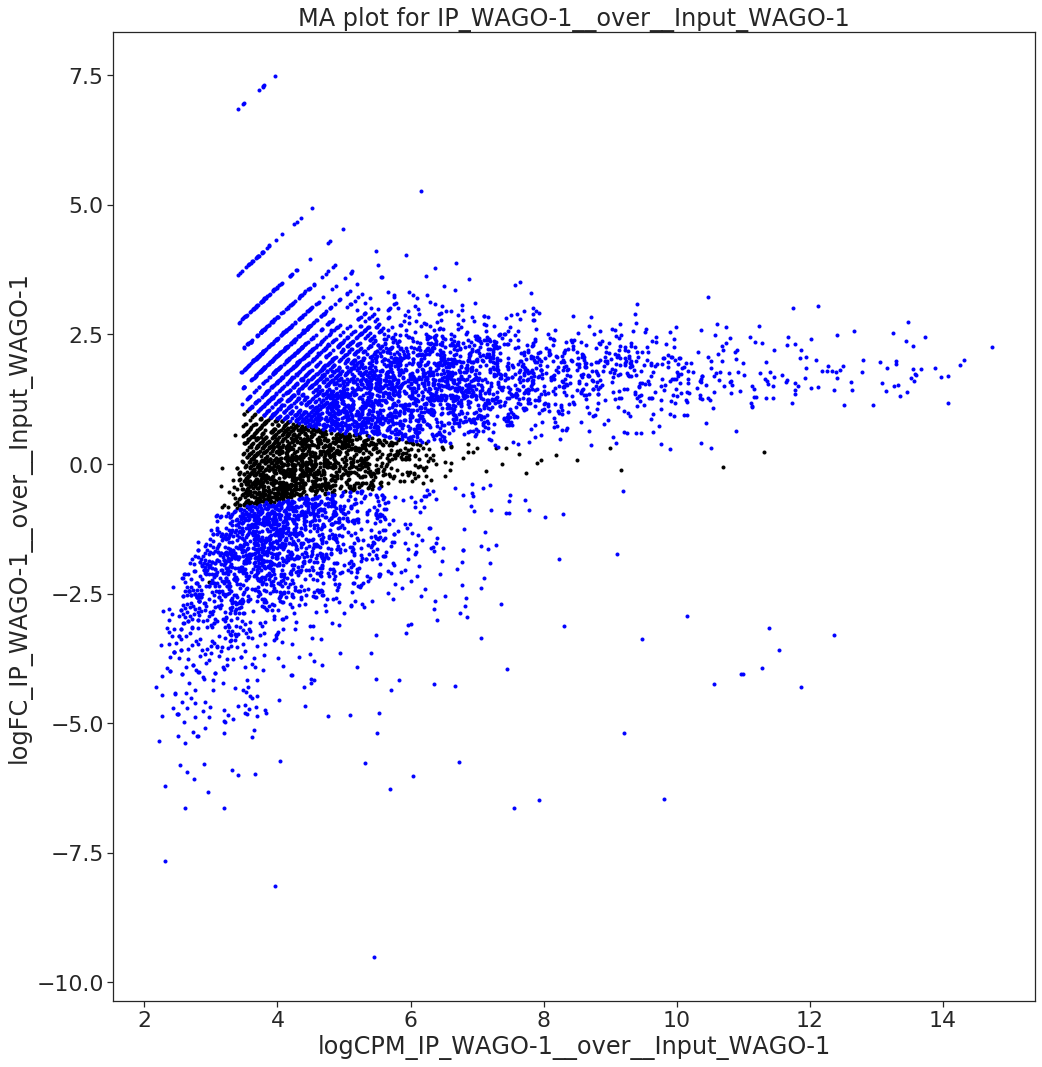

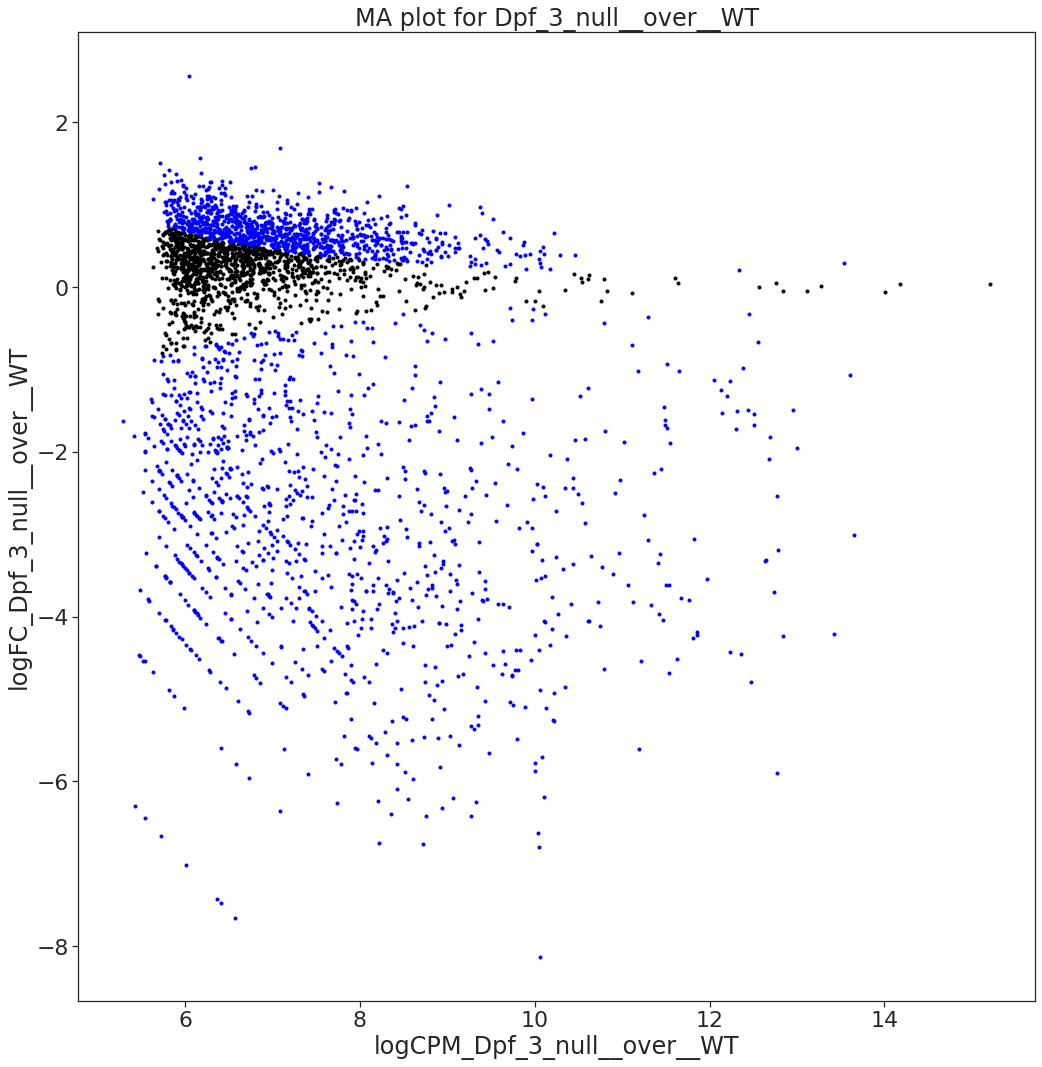

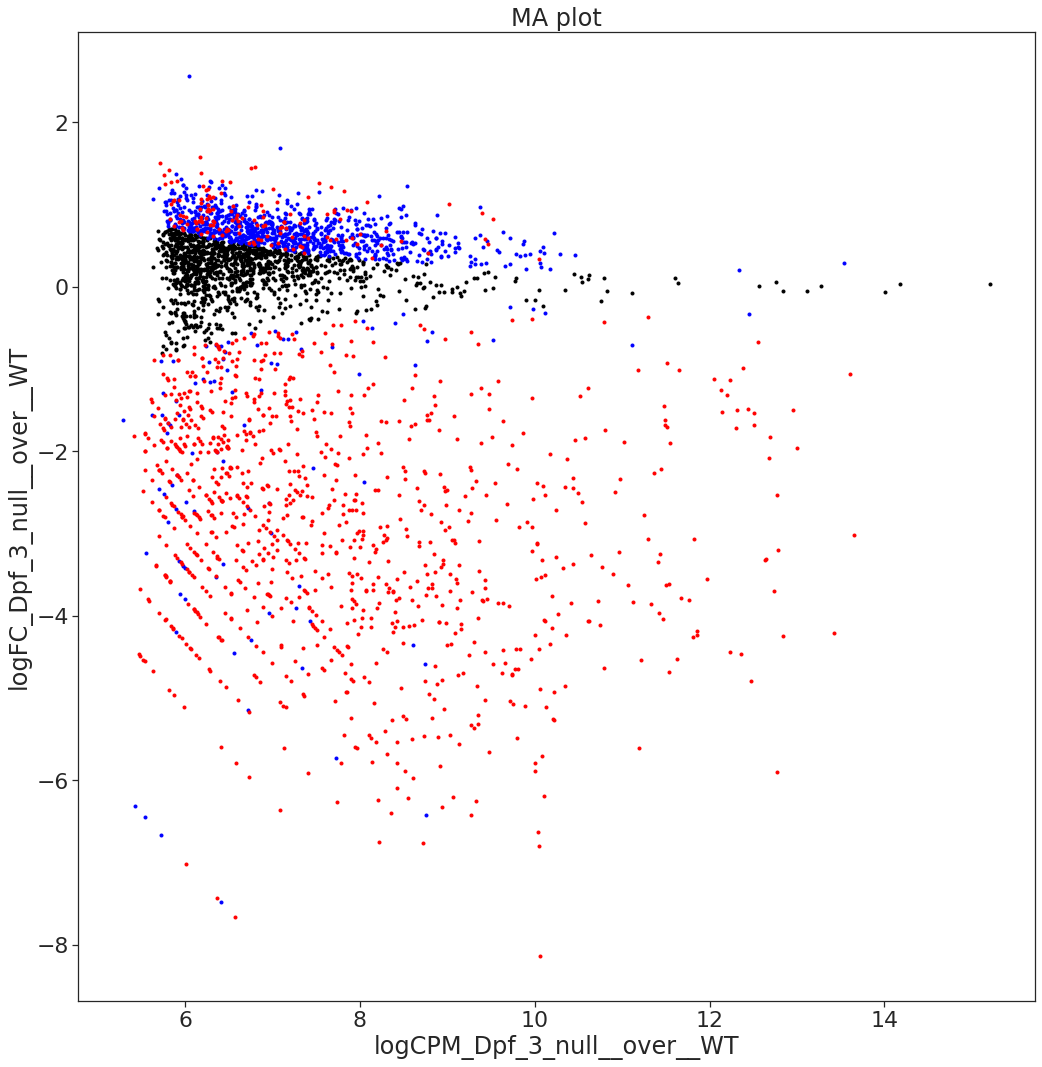

In [12]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## 2. Small RNAs dpf-3 null – WAGO-1 P3G IP over Input

                                                    Significant
No                                                         1194
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1_P3...         1147
FDR_Dpf_3_null__over__WT<0.05                               972


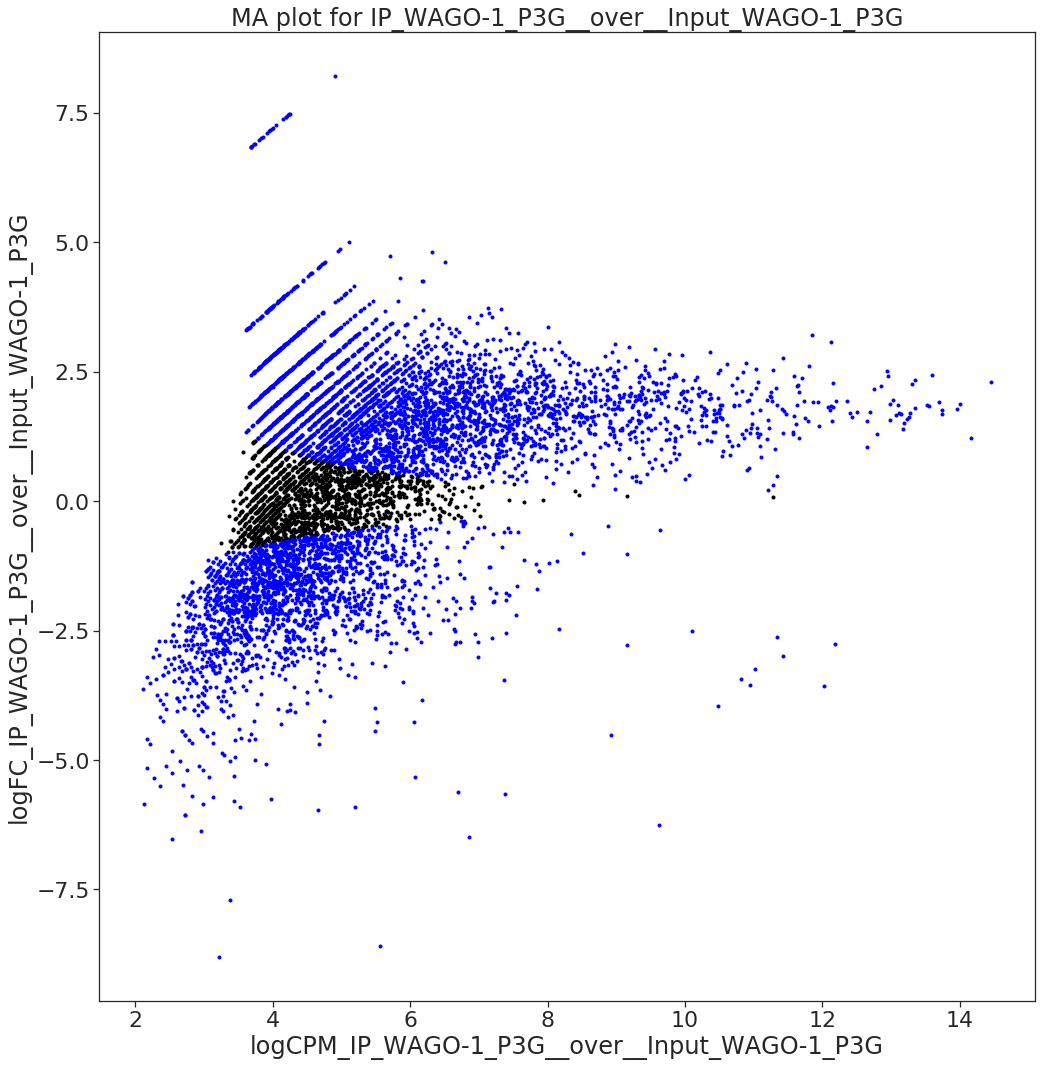

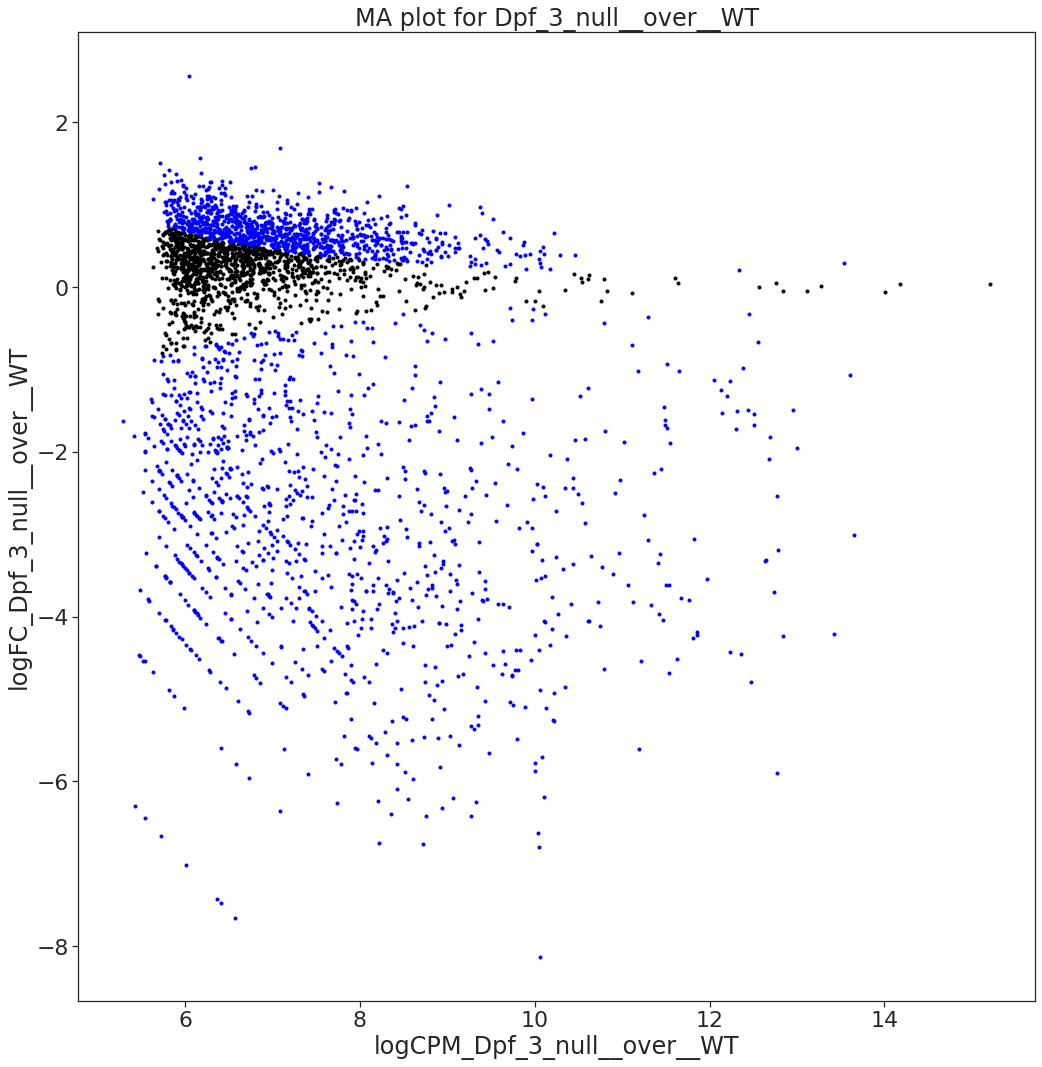

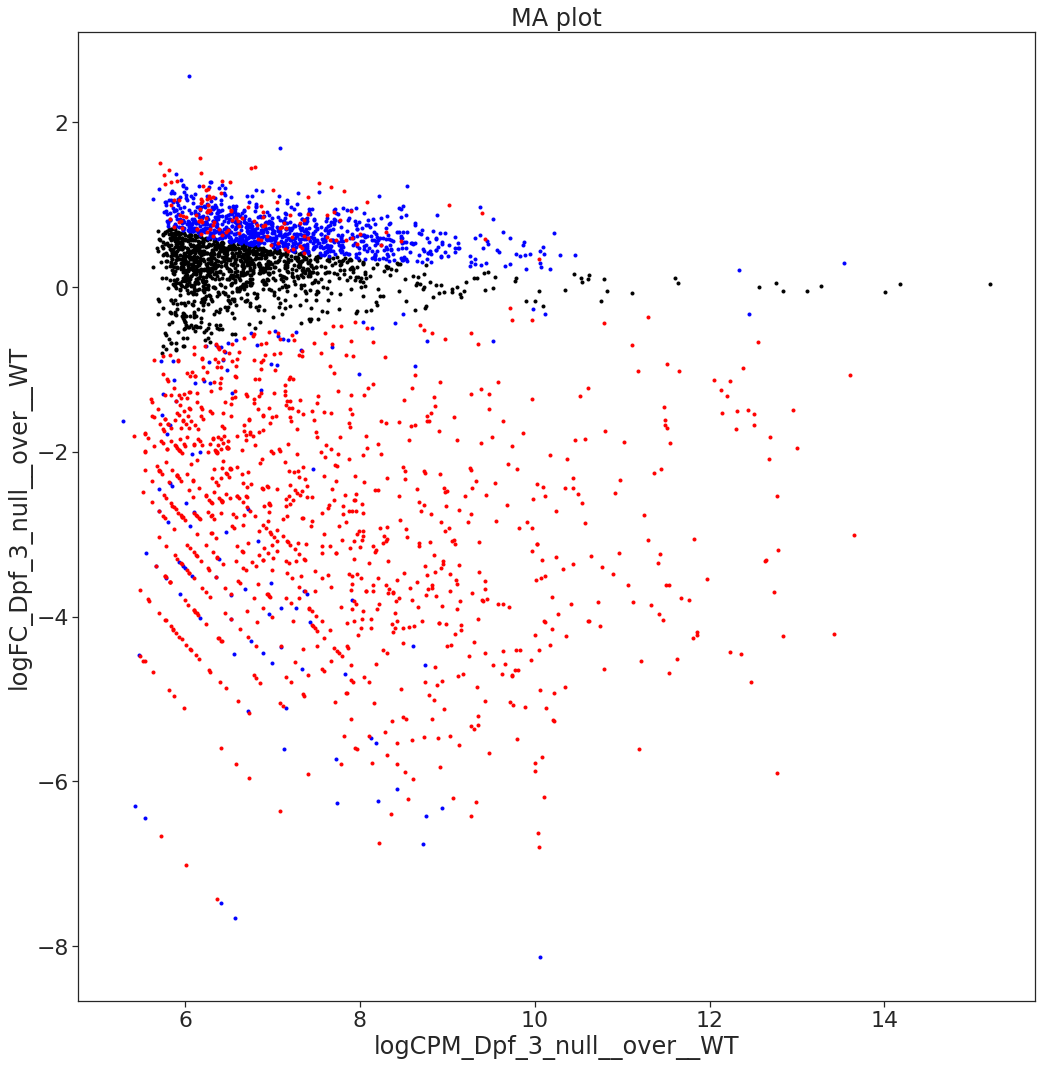

In [13]:
df_1_path = ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_path
df_1_name = ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## 3. Small RNAs in dpf-3 null – WAGO-1 in dpf-3 null IP over Input

                                                    Significant
No                                                         1194
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1_dp...         1183
FDR_Dpf_3_null__over__WT<0.05                               936


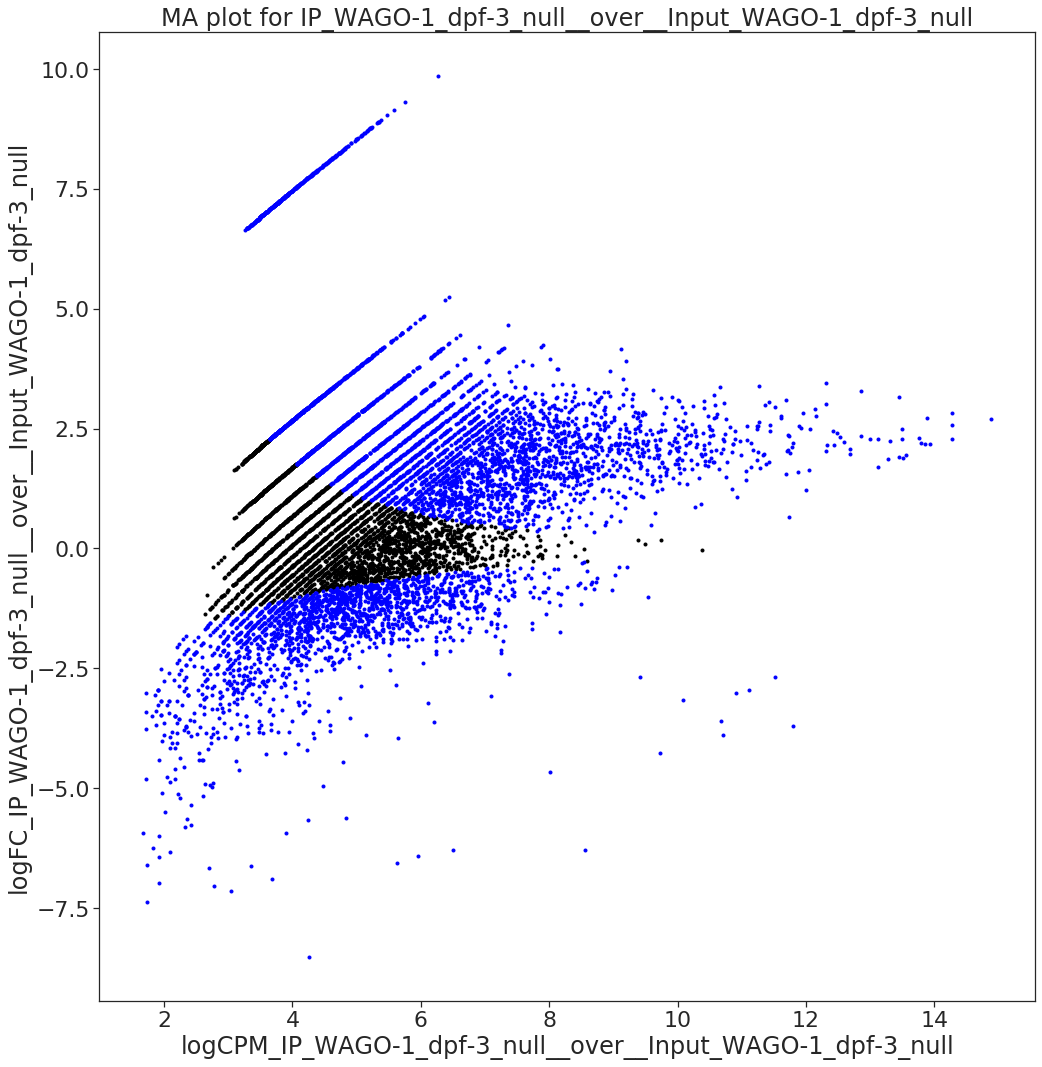

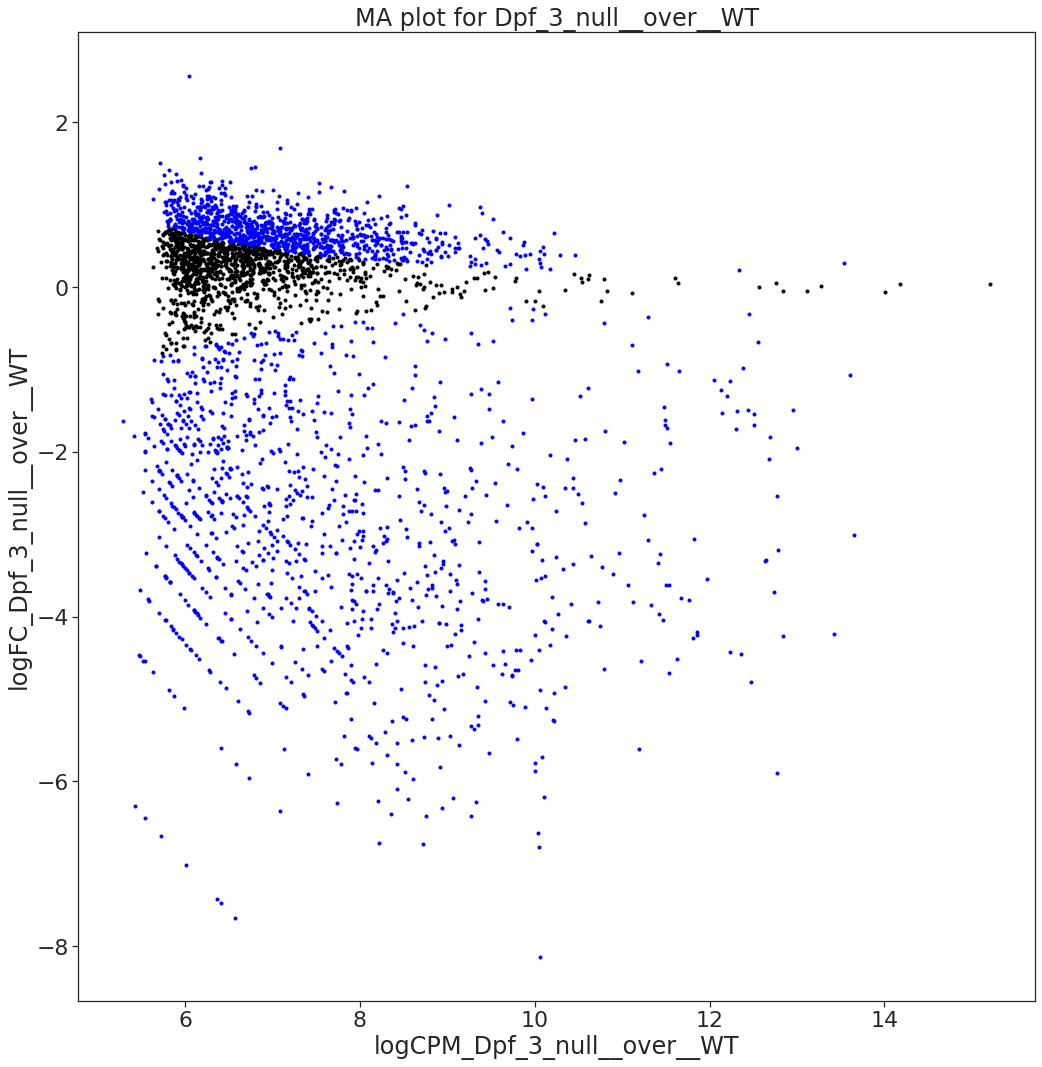

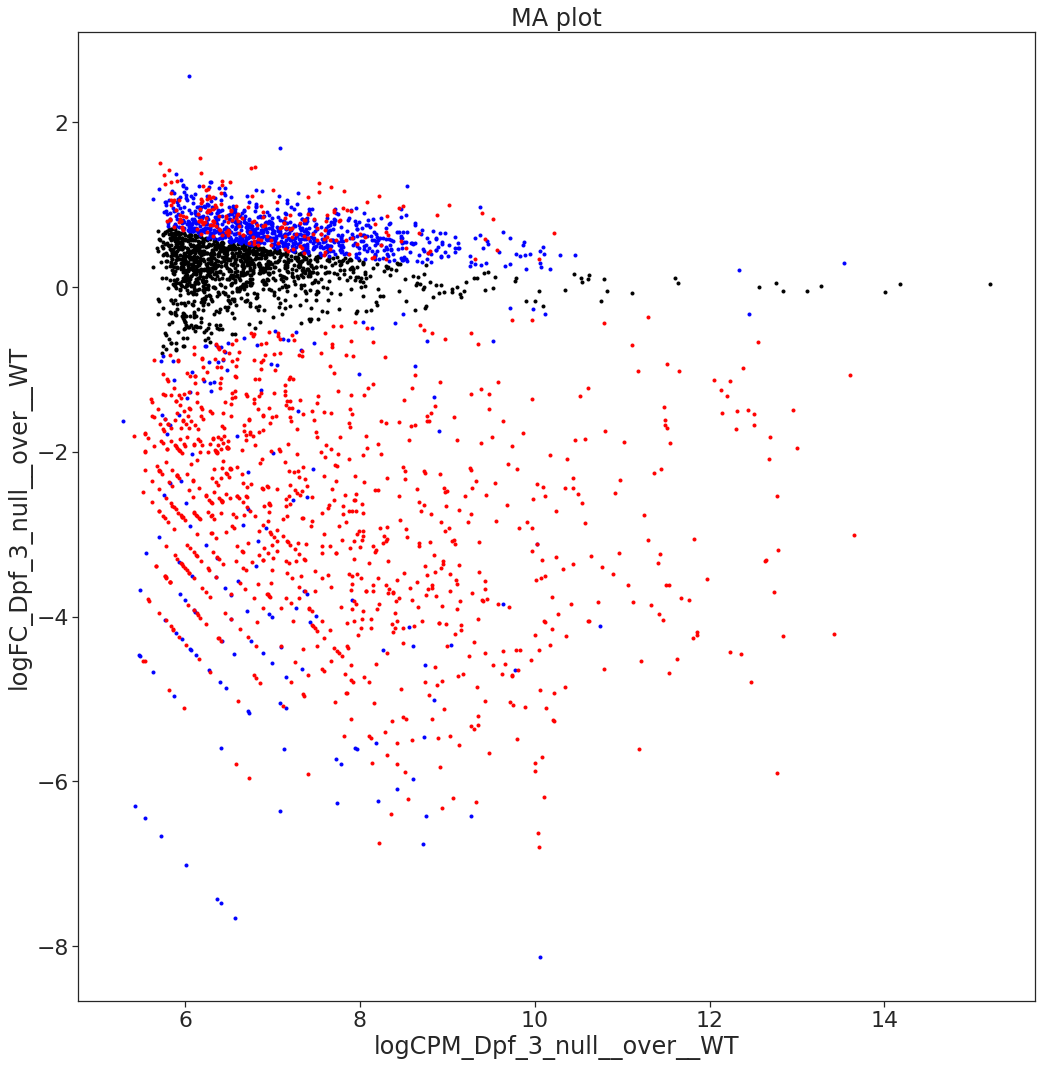

In [14]:
df_1_path = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path
df_1_name = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## 4.Small RNAs in dpf-3 null – WAGO-3 IP over Input

                                                    Significant
No                                                         1194
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-3__o...         1189
FDR_Dpf_3_null__over__WT<0.05                               930


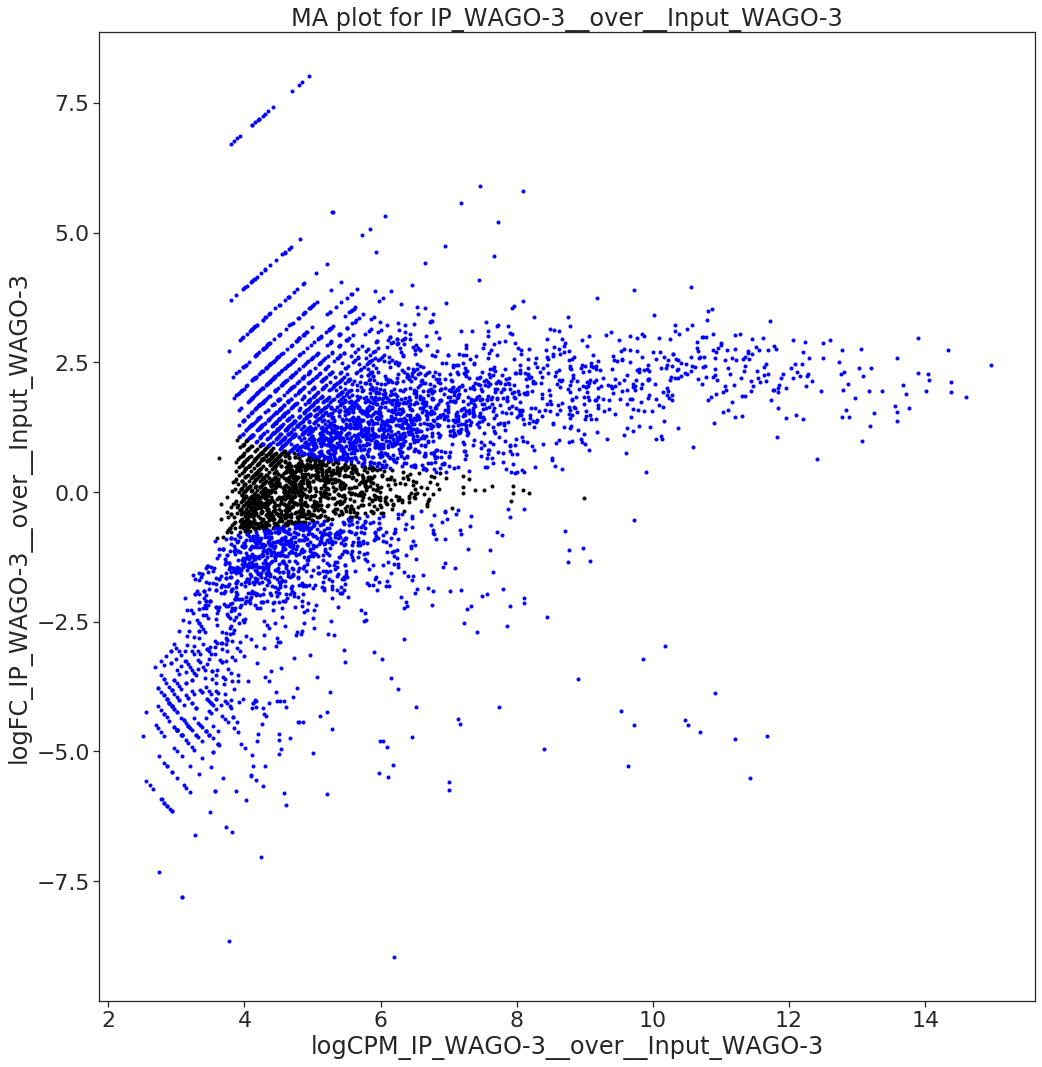

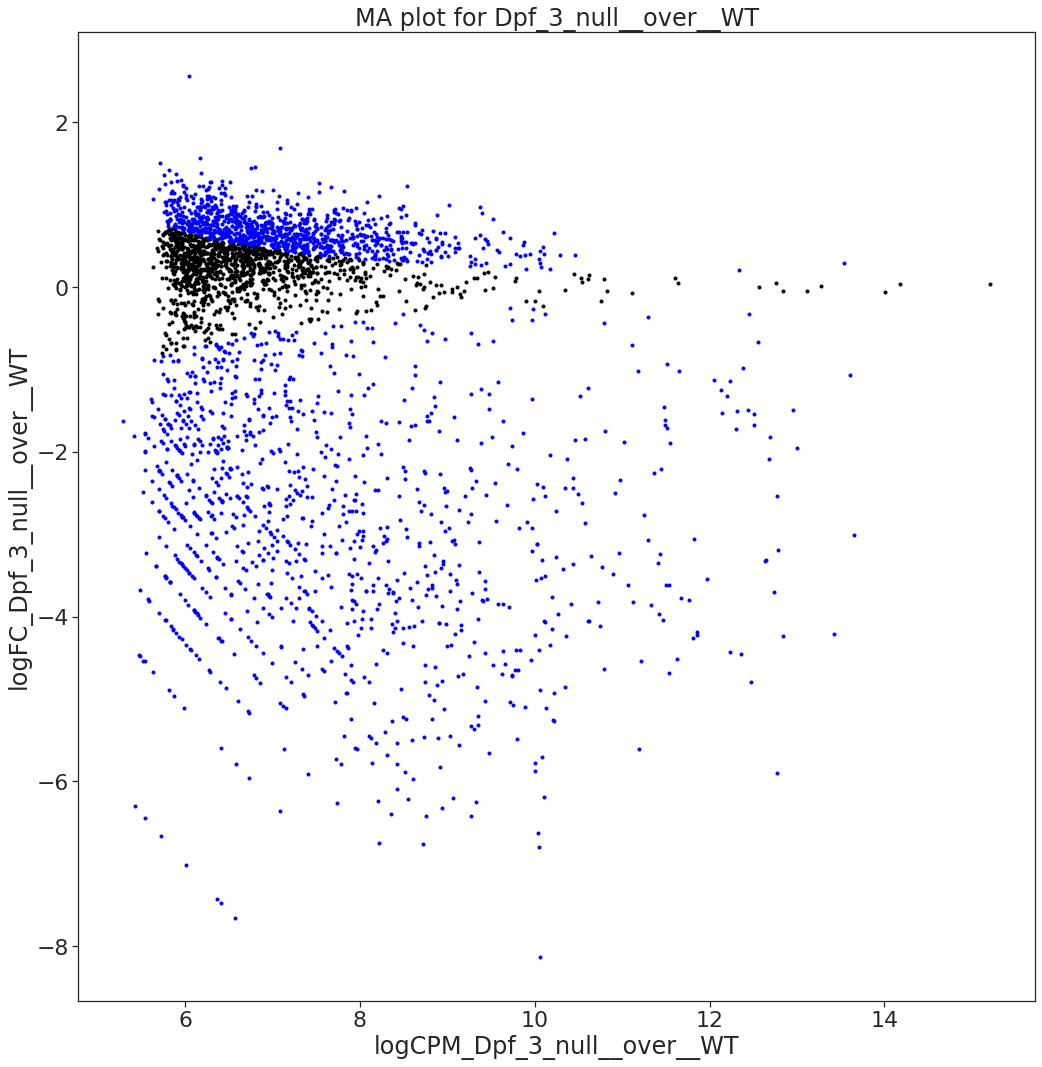

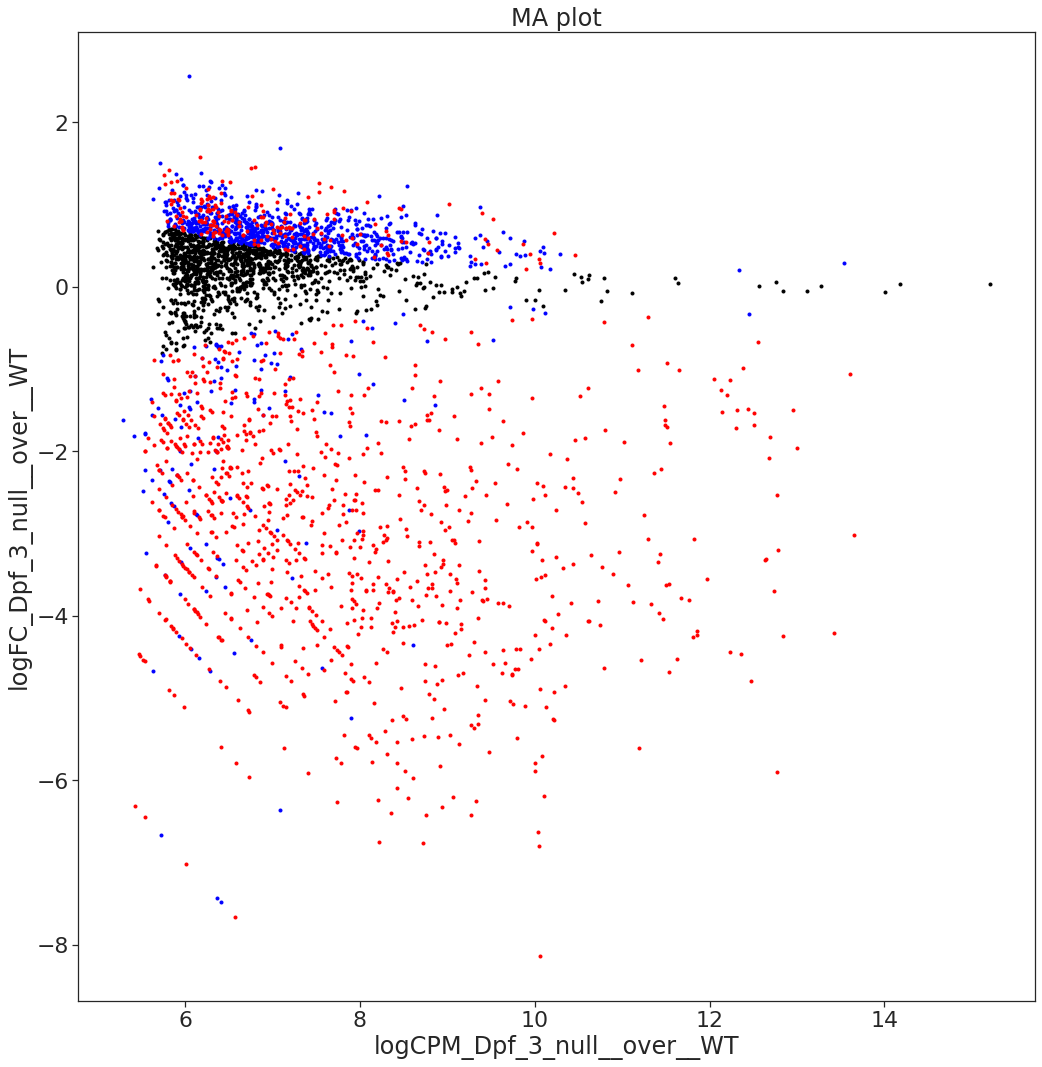

In [15]:
df_1_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_1_name = ip__Input_WAGO_3__IP_WAGO_3_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## 5. Small RNAs in dpf-3 null – WAGO-3 bound in dpf-3 null IP over Input

                                                    Significant
FDR_Dpf_3_null__over__WT<0.05                              1371
No                                                         1194
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-3_dp...          748


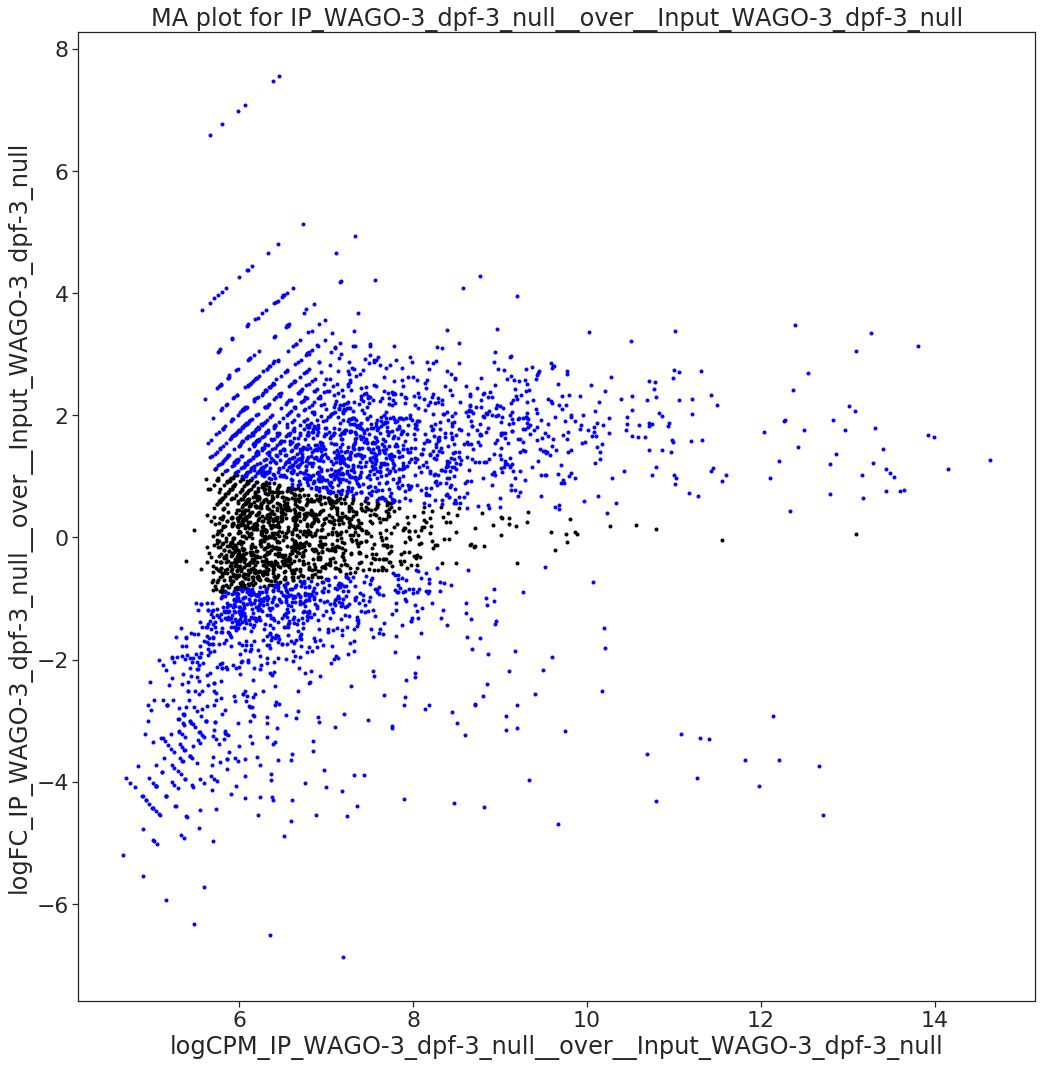

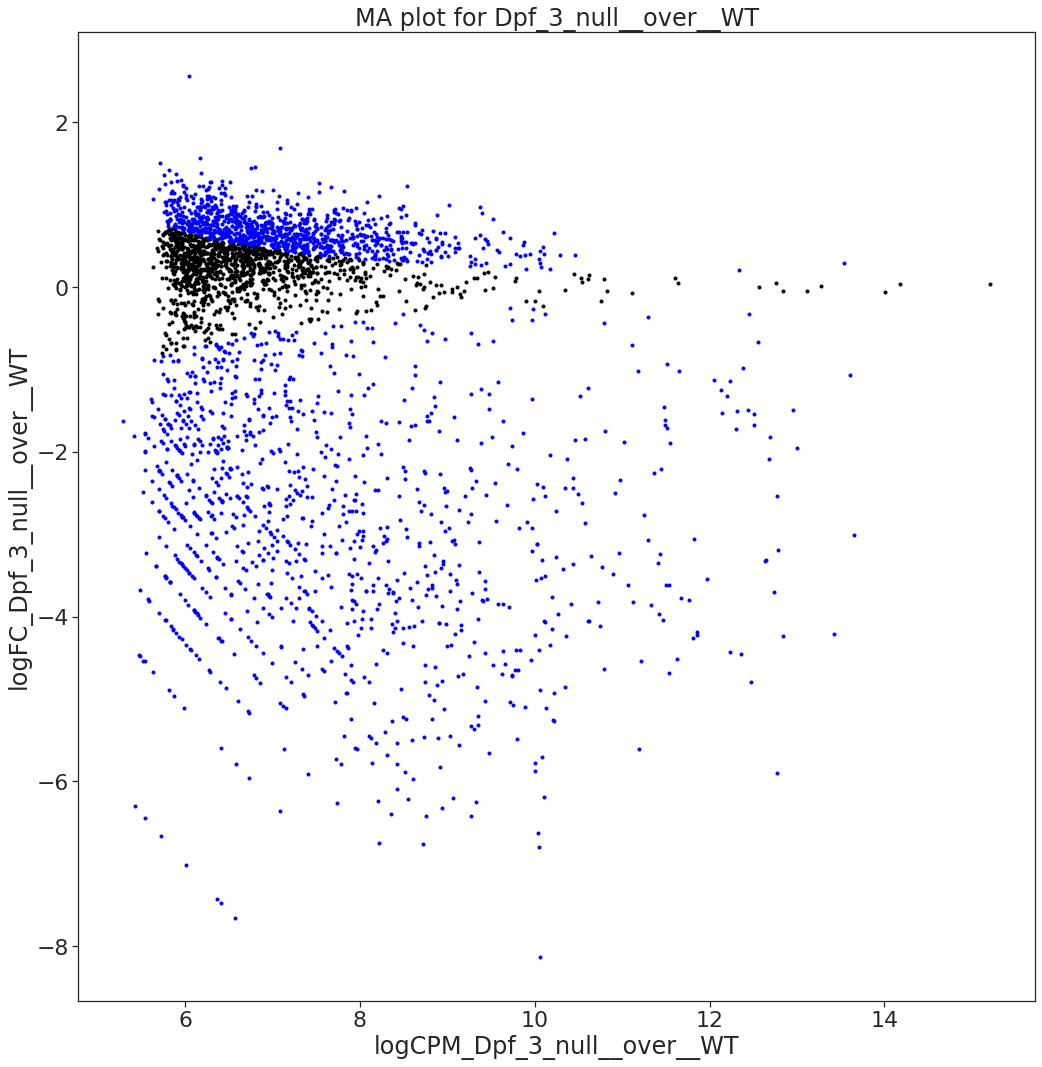

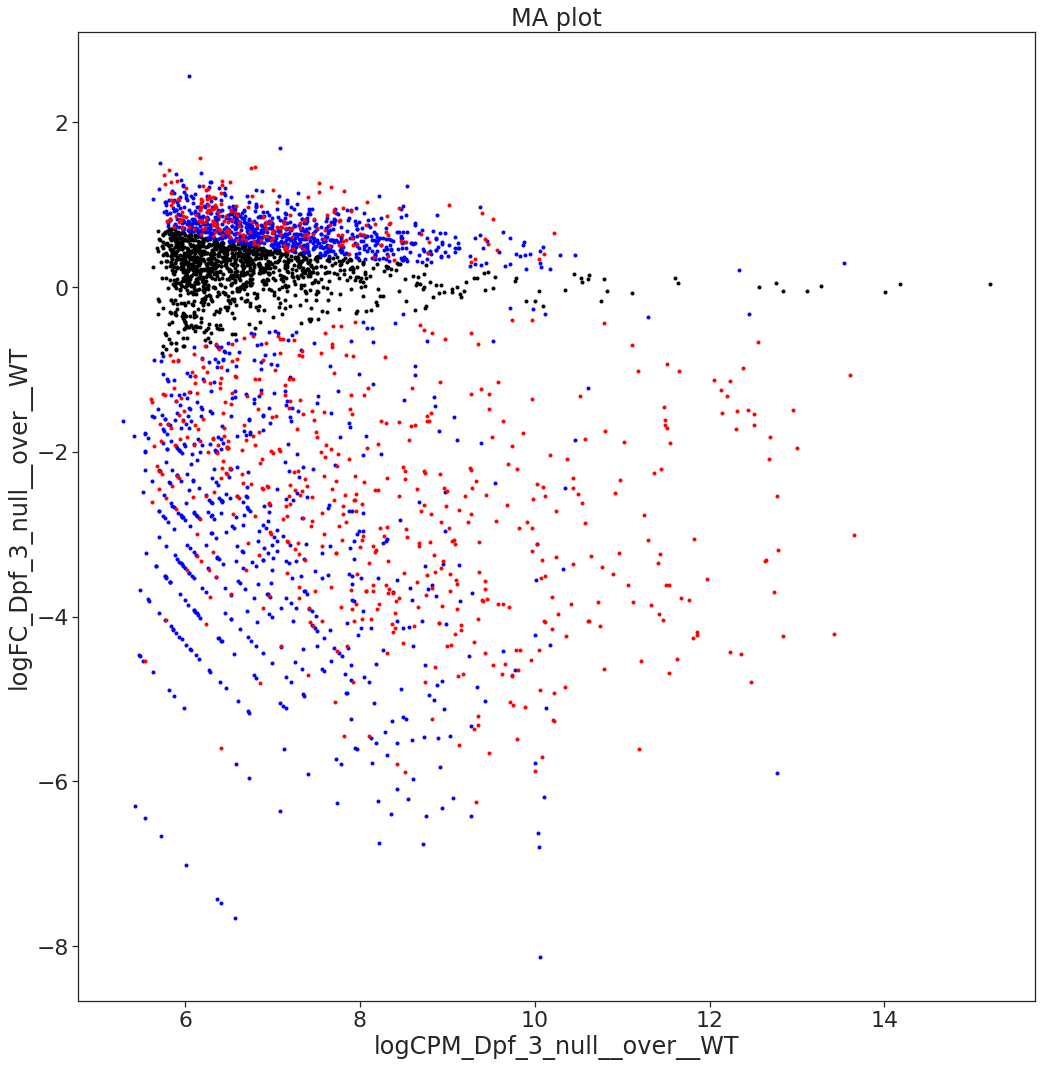

In [16]:
df_1_path = ip__Input_WAGO_3_dpf_3_null__IP_WAGO_3_dpf_3_null_path
df_1_name = ip__Input_WAGO_3_dpf_3_null__IP_WAGO_3_dpf_3_null_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Extra comparison. Small RNAs in DPF-3 null – IP WAGO-1 over IP WAGO-1 P3G

Significant
FDR_Dpf_3_null__over__WT<0.05                              1394
No                                                         1194
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1__o...          589
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1__o...          136

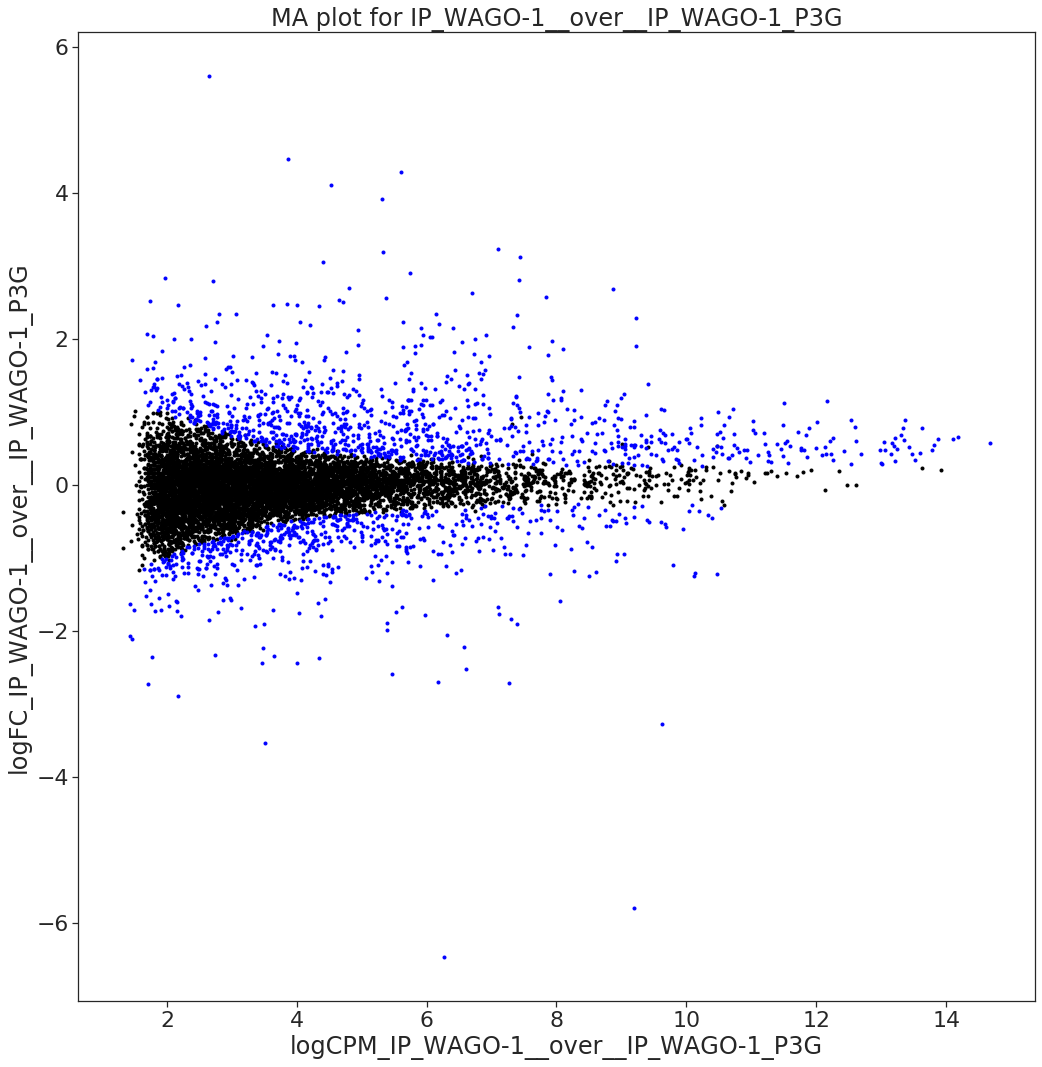

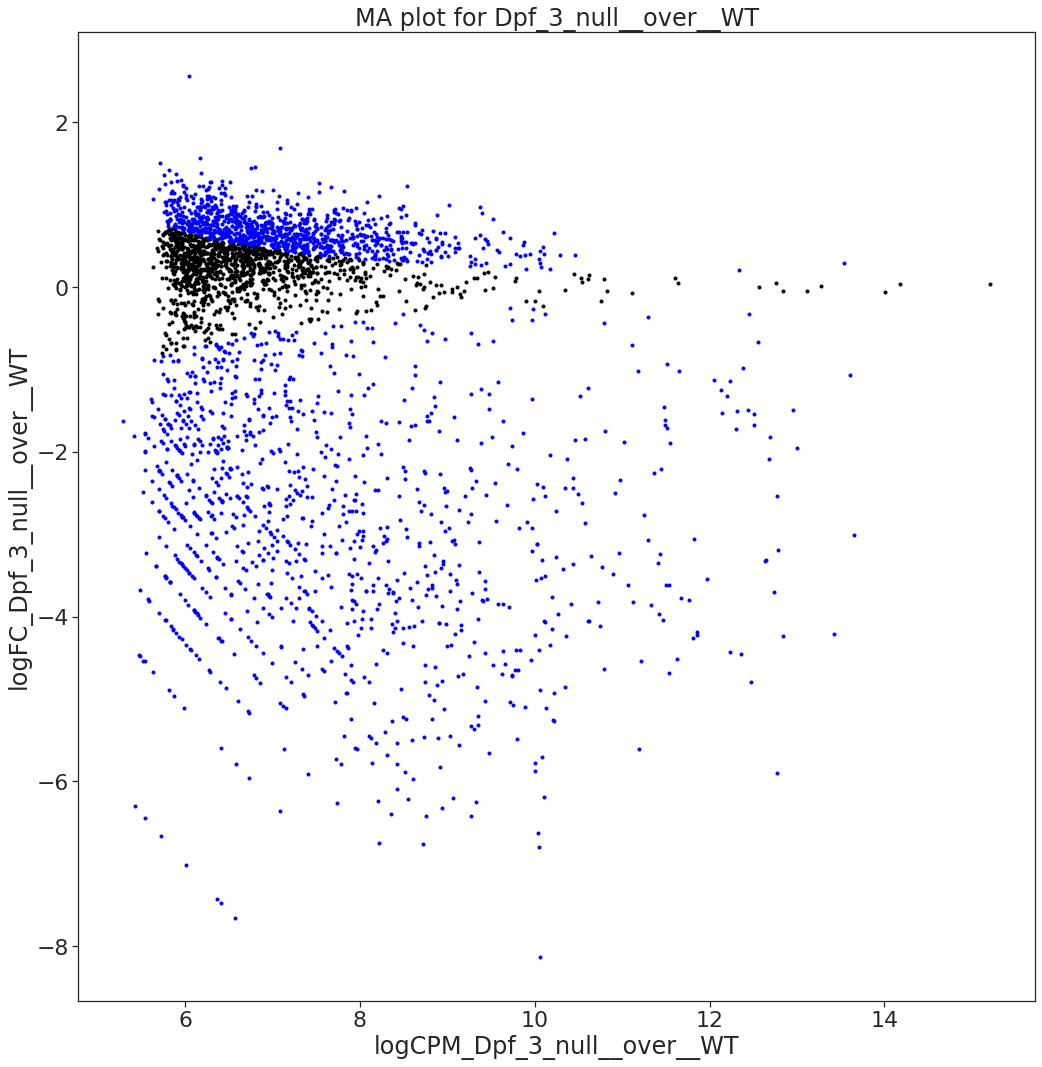

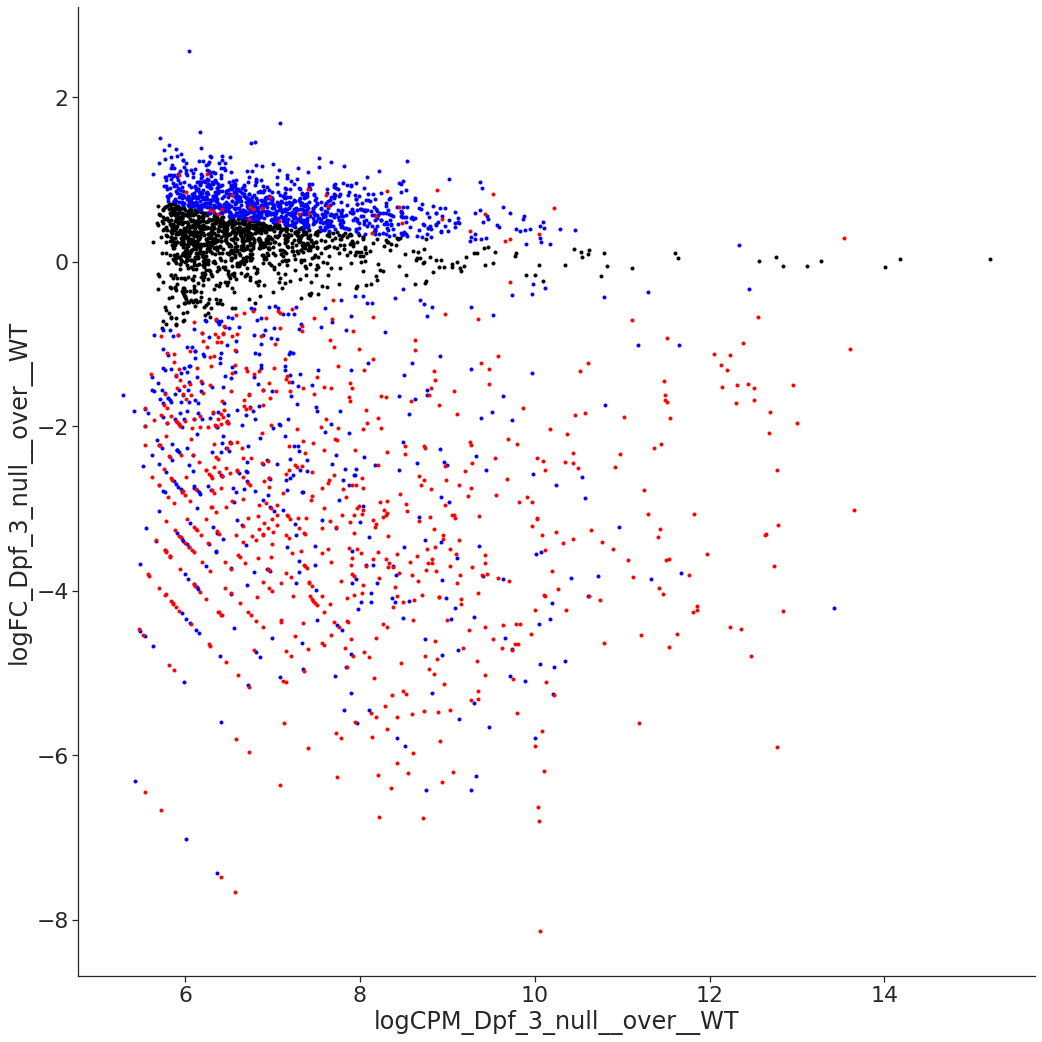

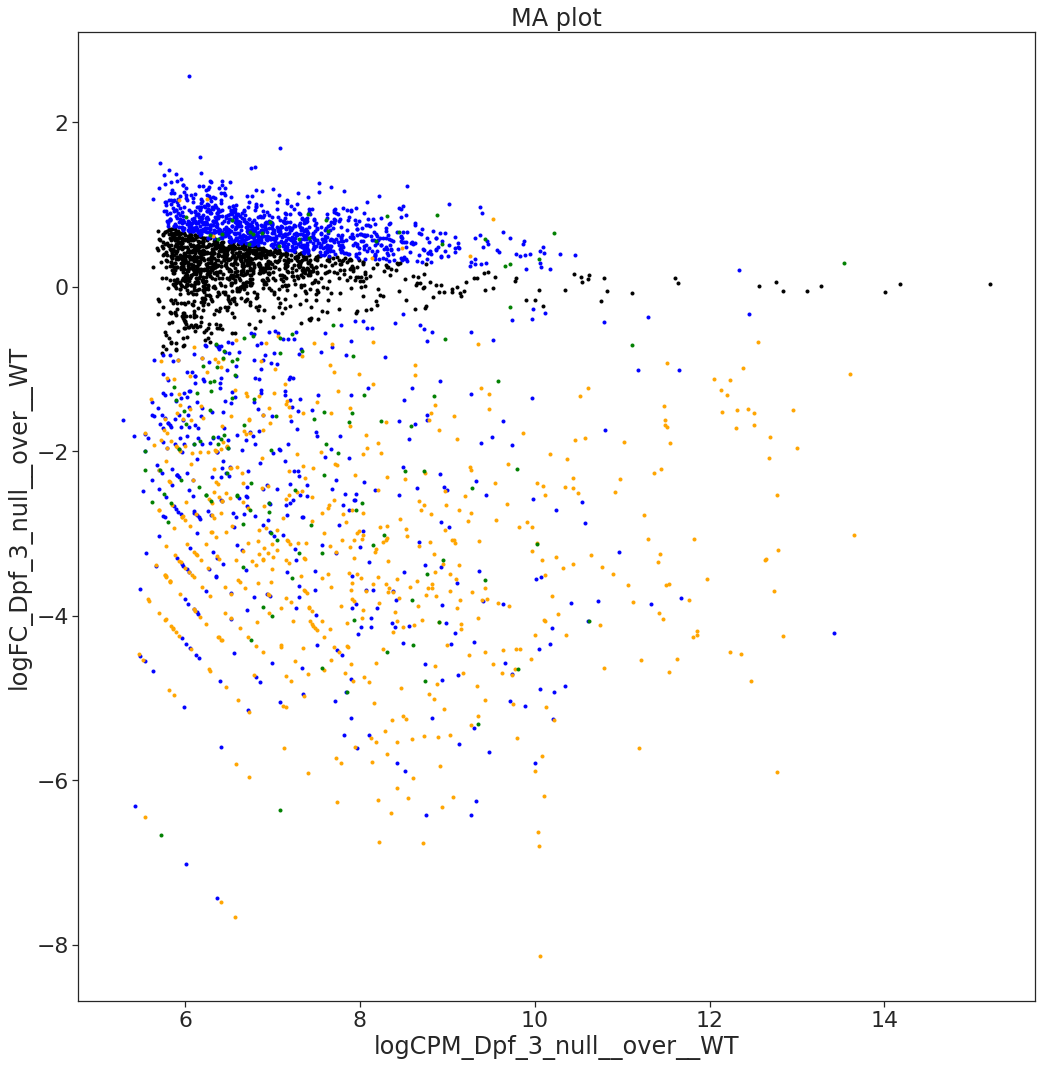

In [17]:
df_1_path = ip__IP_WAGO_1_P3G__IP_WAGO_1_path
df_1_name = ip__IP_WAGO_1_P3G__IP_WAGO_1_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"FDR_{df_1_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", 
                                 f"FDR_{df_2_name}<0.05",
                                 f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)


df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) & 
           (df_all[f"FDR_{df_1_name}"]<0.05) & 
           (df_all[f"logFC_{df_1_name}"]>0), "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) & 
           (df_all[f"FDR_{df_1_name}"]<0.05) & 
           (df_all[f"logFC_{df_1_name}"]<0), "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", 
                                 f"FDR_{df_2_name}<0.05",
                                 f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05",
                                 f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                 f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"],
                      palette=["black", "blue", "red", "orange", "green"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)


sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

pd.DataFrame(df_all["Significant"].value_counts())

## Extra comparison. Small RNAs in DPF-3 null – IP WAGO-1 over IP WAGO-1 DPF-3 null

Significant
No                                                         1194
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1__o...          994
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1__o...          936
FDR_Dpf_3_null__over__WT<0.05                               189

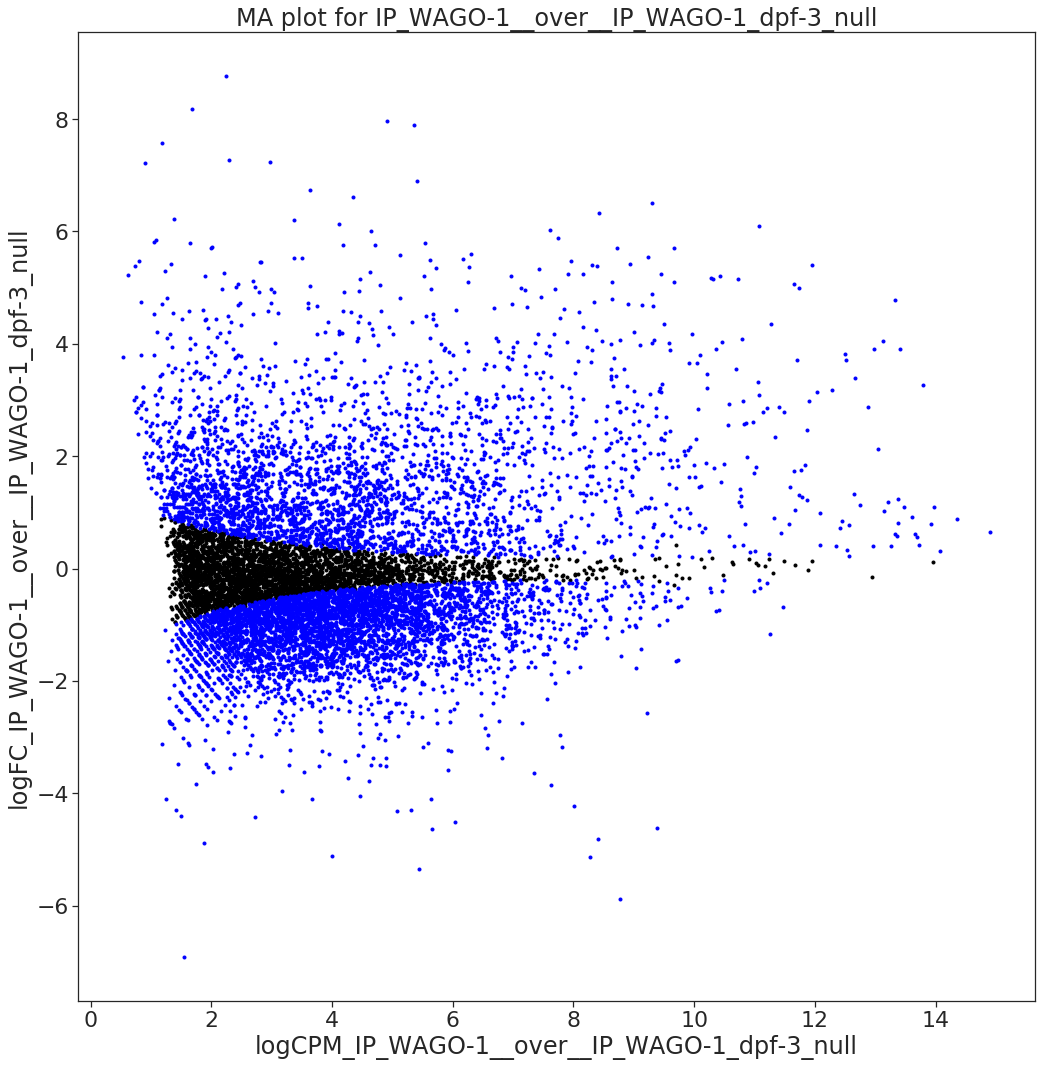

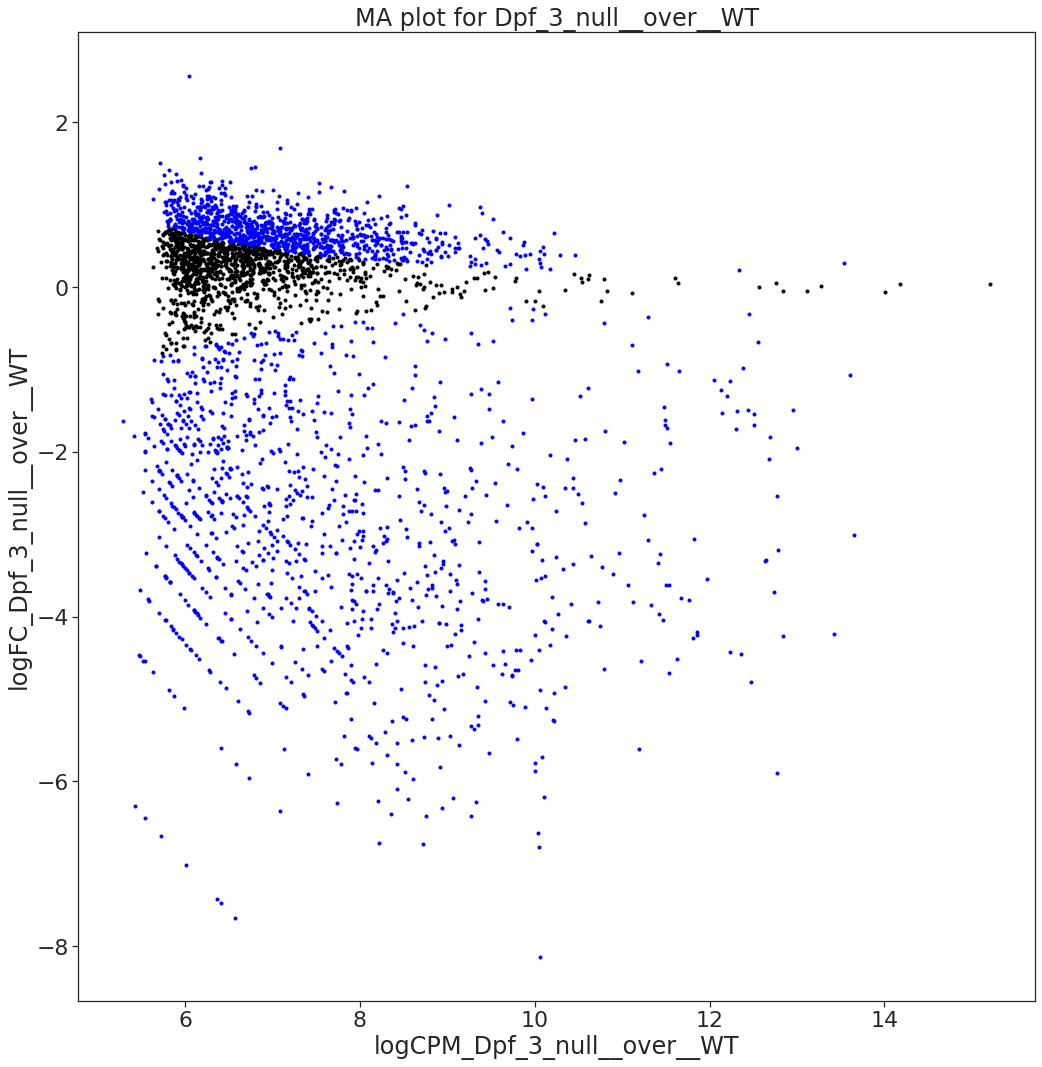

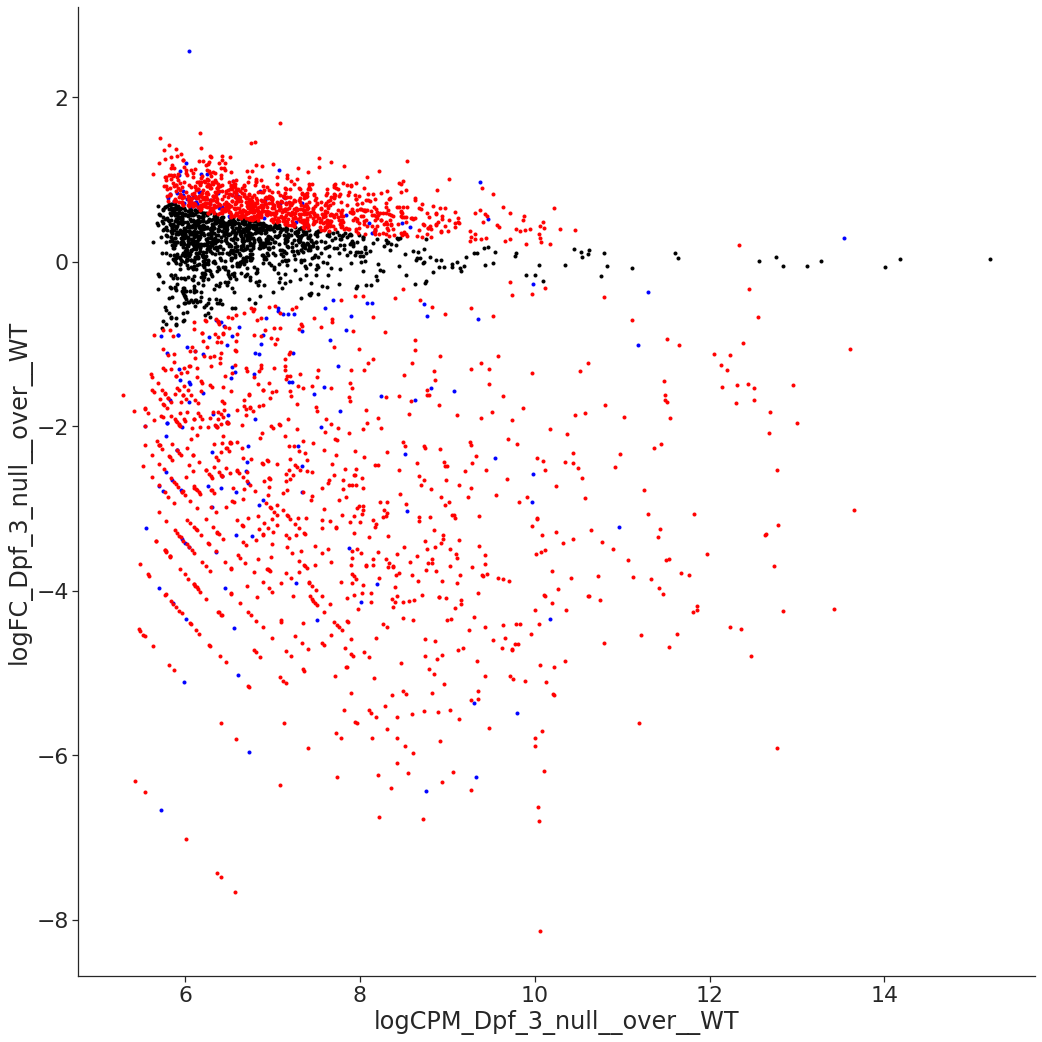

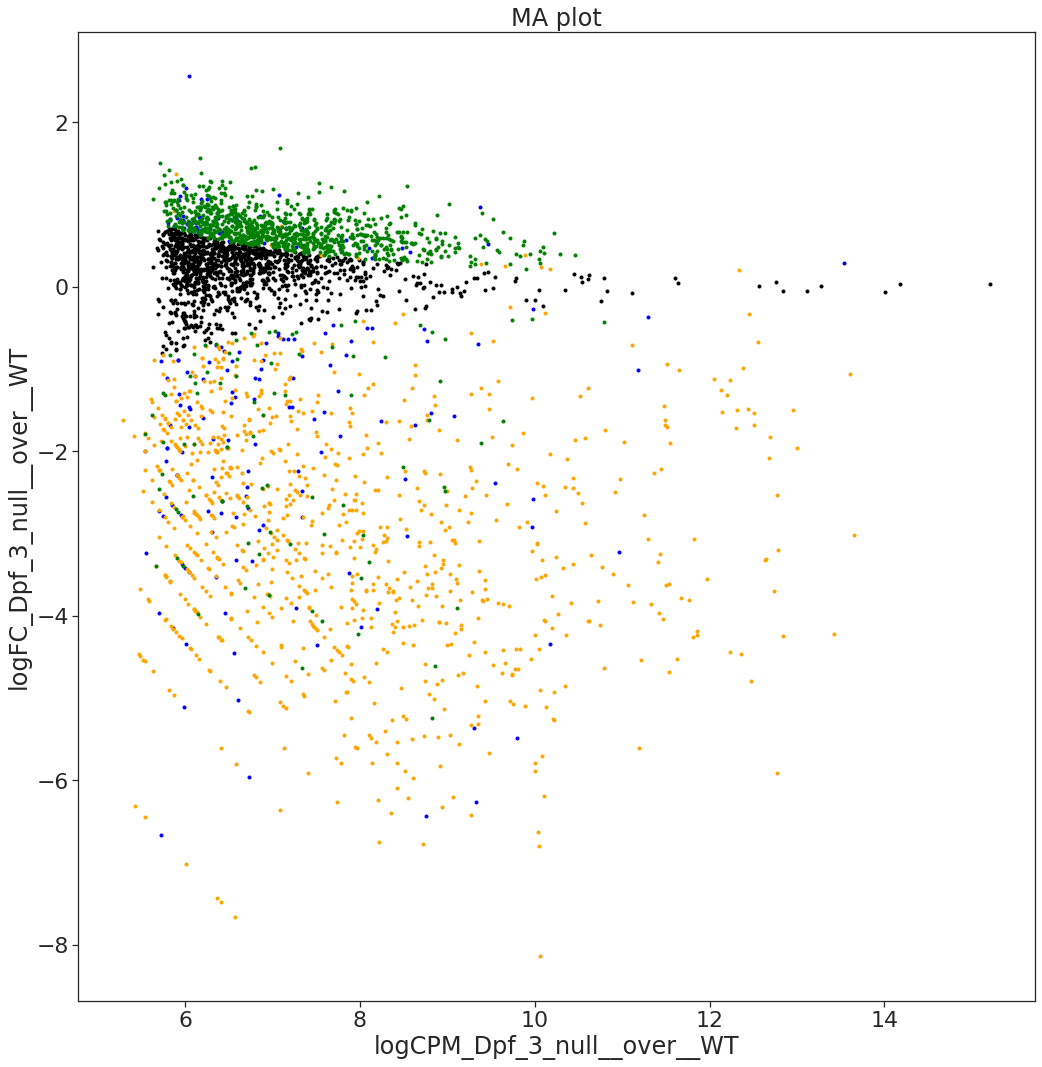

In [18]:
df_1_path = ip__IP_WAGO_1_dpf_3_null__IP_WAGO_1_path
df_1_name = ip__IP_WAGO_1_dpf_3_null__IP_WAGO_1_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"FDR_{df_1_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", 
                                 f"FDR_{df_2_name}<0.05",
                                 f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)


df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) & 
           (df_all[f"FDR_{df_1_name}"]<0.05) & 
           (df_all[f"logFC_{df_1_name}"]>0), "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) & 
           (df_all[f"FDR_{df_1_name}"]<0.05) & 
           (df_all[f"logFC_{df_1_name}"]<0), "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", 
                                 f"FDR_{df_2_name}<0.05",
                                 f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05",
                                 f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                 f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"],
                      palette=["black", "blue", "red", "orange", "green"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)


sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

pd.DataFrame(df_all["Significant"].value_counts())

## Extra comparison. Small RNAs in DPF-3 null – IP WAGO-3 over IP WAGO-3 DPF-3 null

Significant
No                                                         1194
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-3__o...         1005
FDR_Dpf_3_null__over__WT<0.05                               619
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-3__o...          495

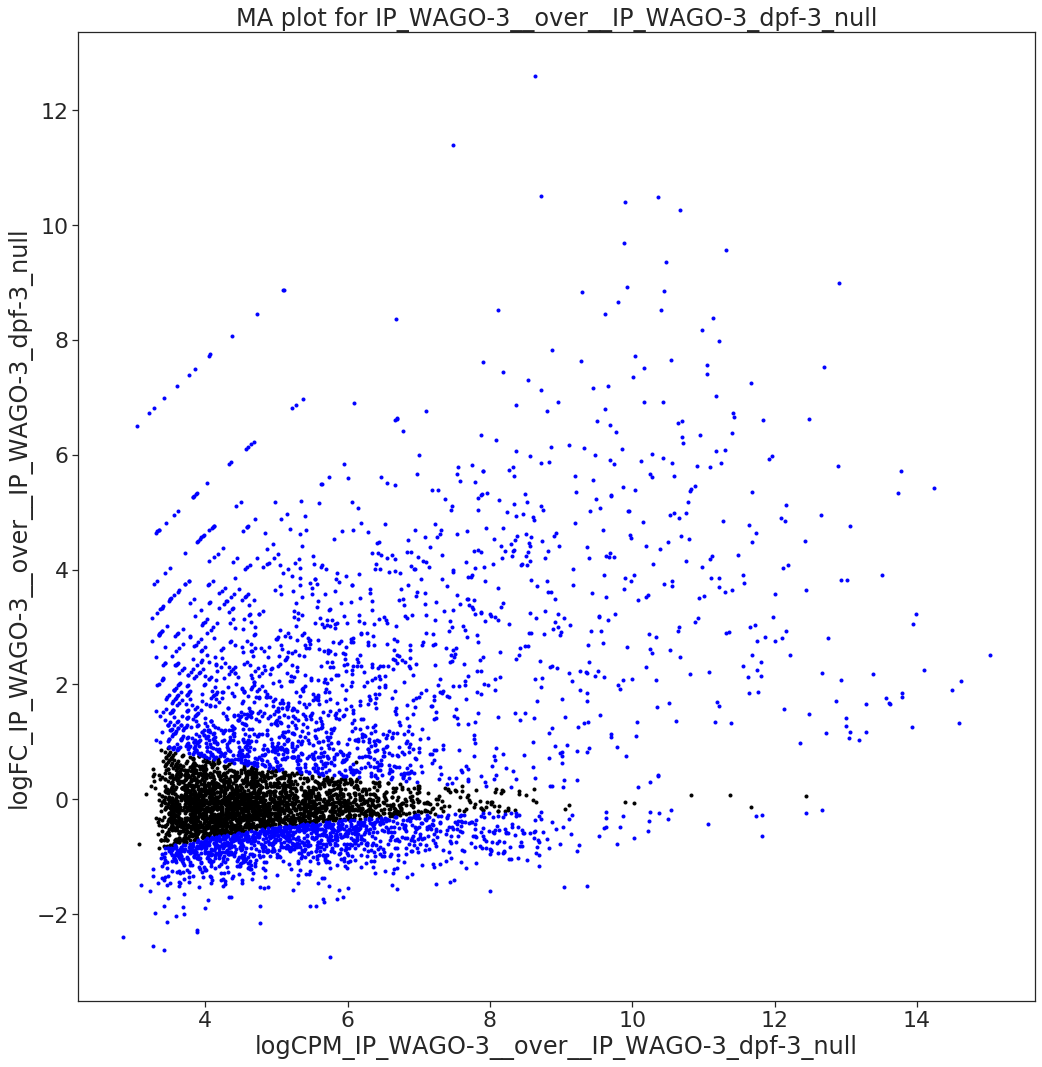

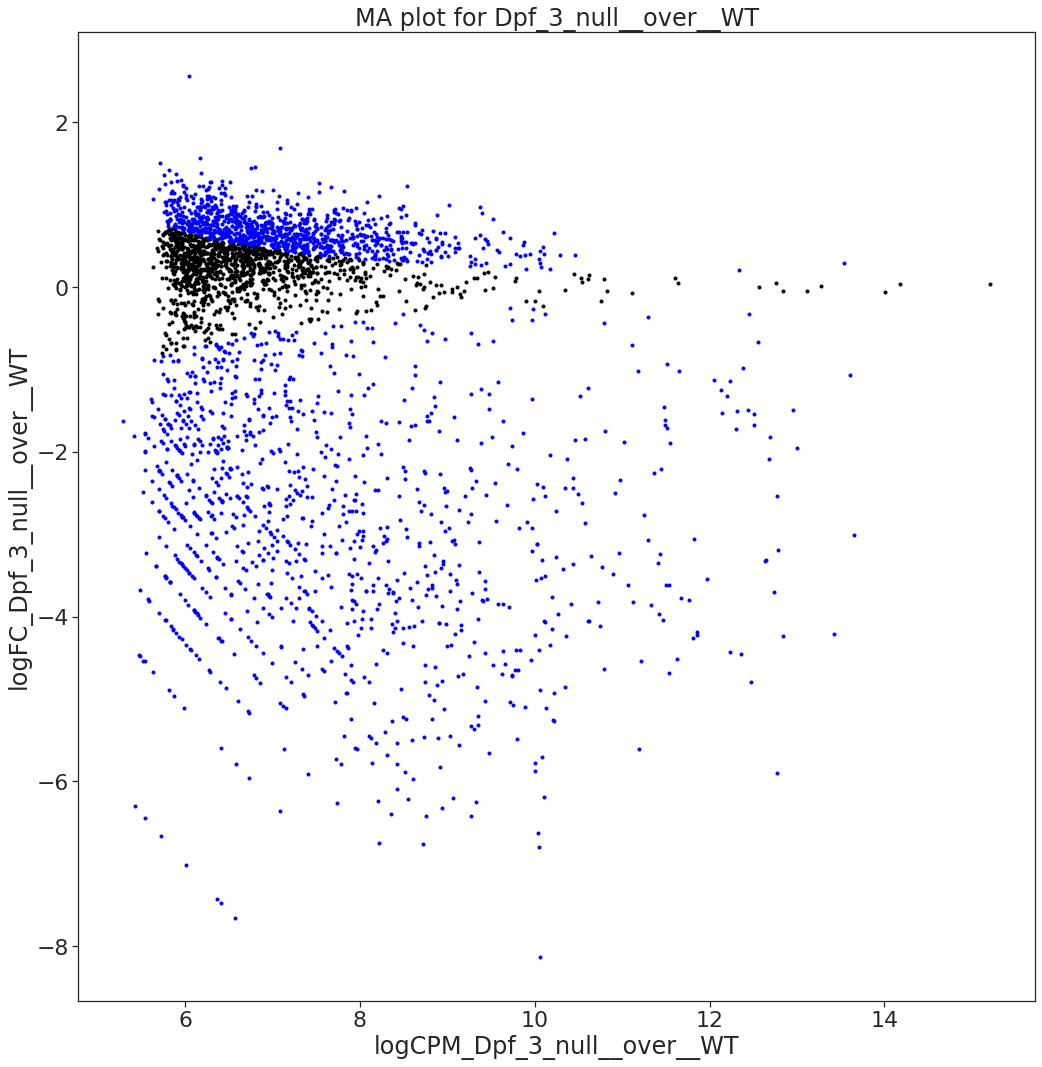

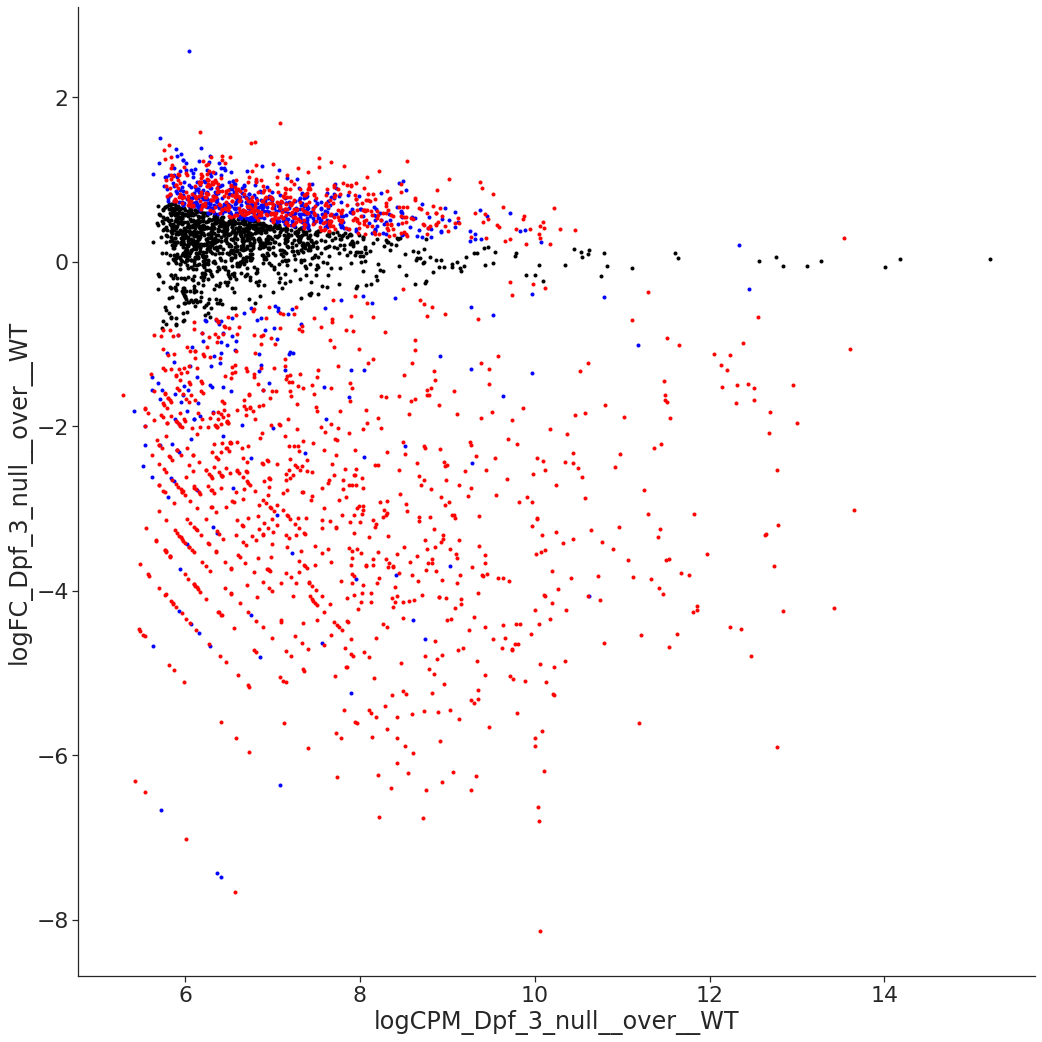

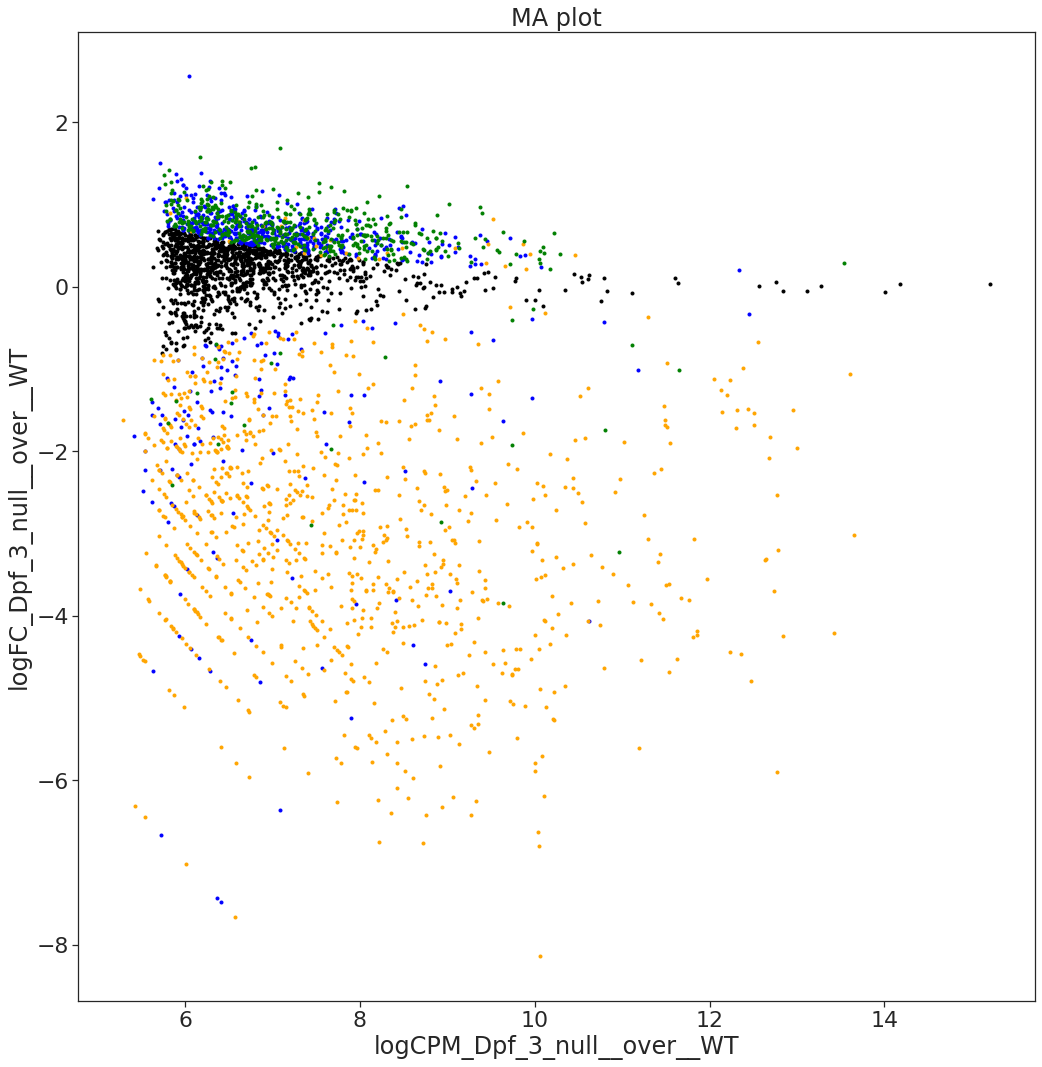

In [19]:
df_1_path = ip__IP_WAGO_3_dpf_3_null__IP_WAGO_3_path
df_1_name = ip__IP_WAGO_3_dpf_3_null__IP_WAGO_3_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"FDR_{df_1_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", 
                                 f"FDR_{df_2_name}<0.05",
                                 f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)


df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) & 
           (df_all[f"FDR_{df_1_name}"]<0.05) & 
           (df_all[f"logFC_{df_1_name}"]>0), "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) & 
           (df_all[f"FDR_{df_1_name}"]<0.05) & 
           (df_all[f"logFC_{df_1_name}"]<0), "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", 
                                 f"FDR_{df_2_name}<0.05",
                                 f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05",
                                 f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                 f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}<0"],
                      palette=["black", "blue", "red", "orange", "green"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)


sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

pd.DataFrame(df_all["Significant"].value_counts())

## Extra plot Small RNAs dpf-3 null – csr-1 over Input

                                                    Significant
FDR_Dpf_3_null__over__WT<0.05                              1252
No                                                         1194
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_csr-1__ov...          867


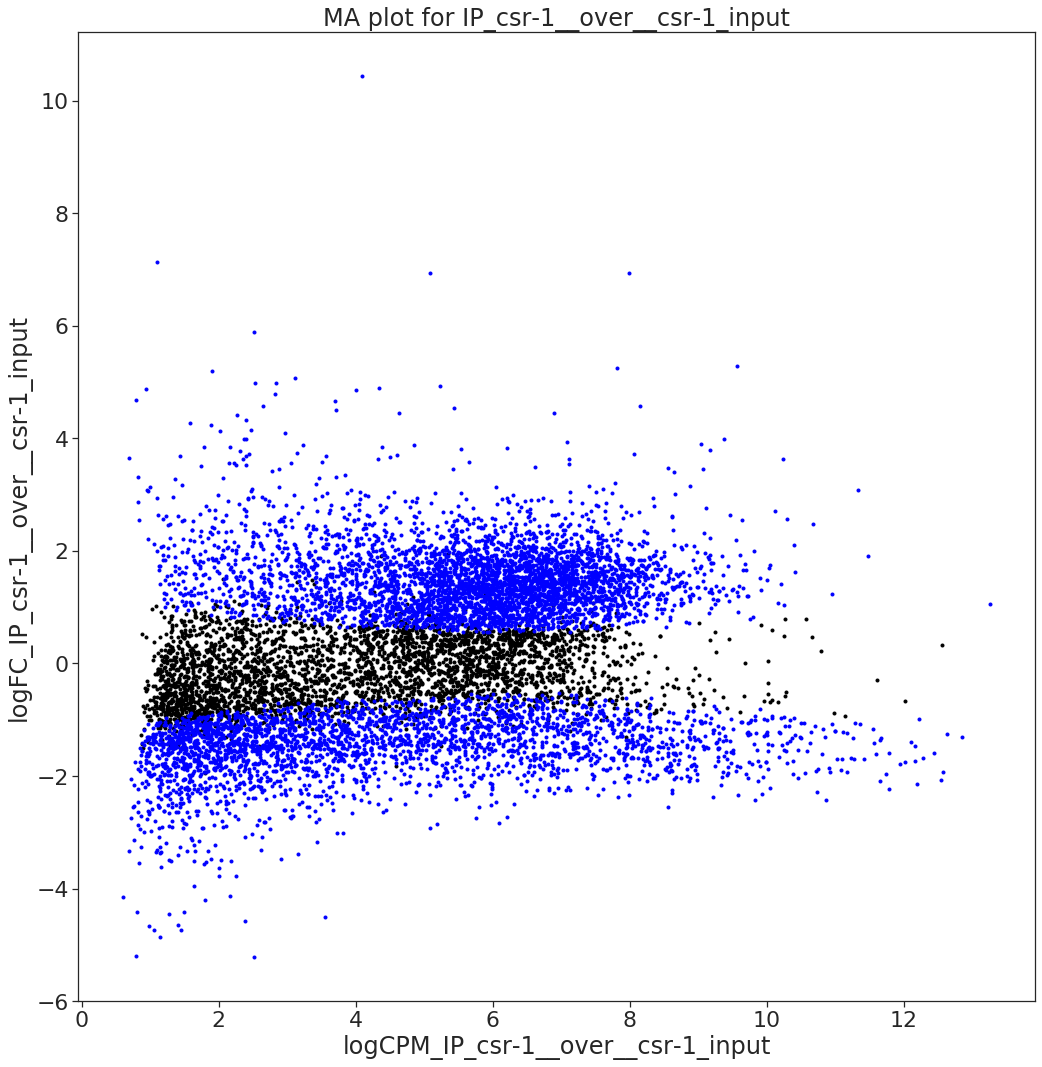

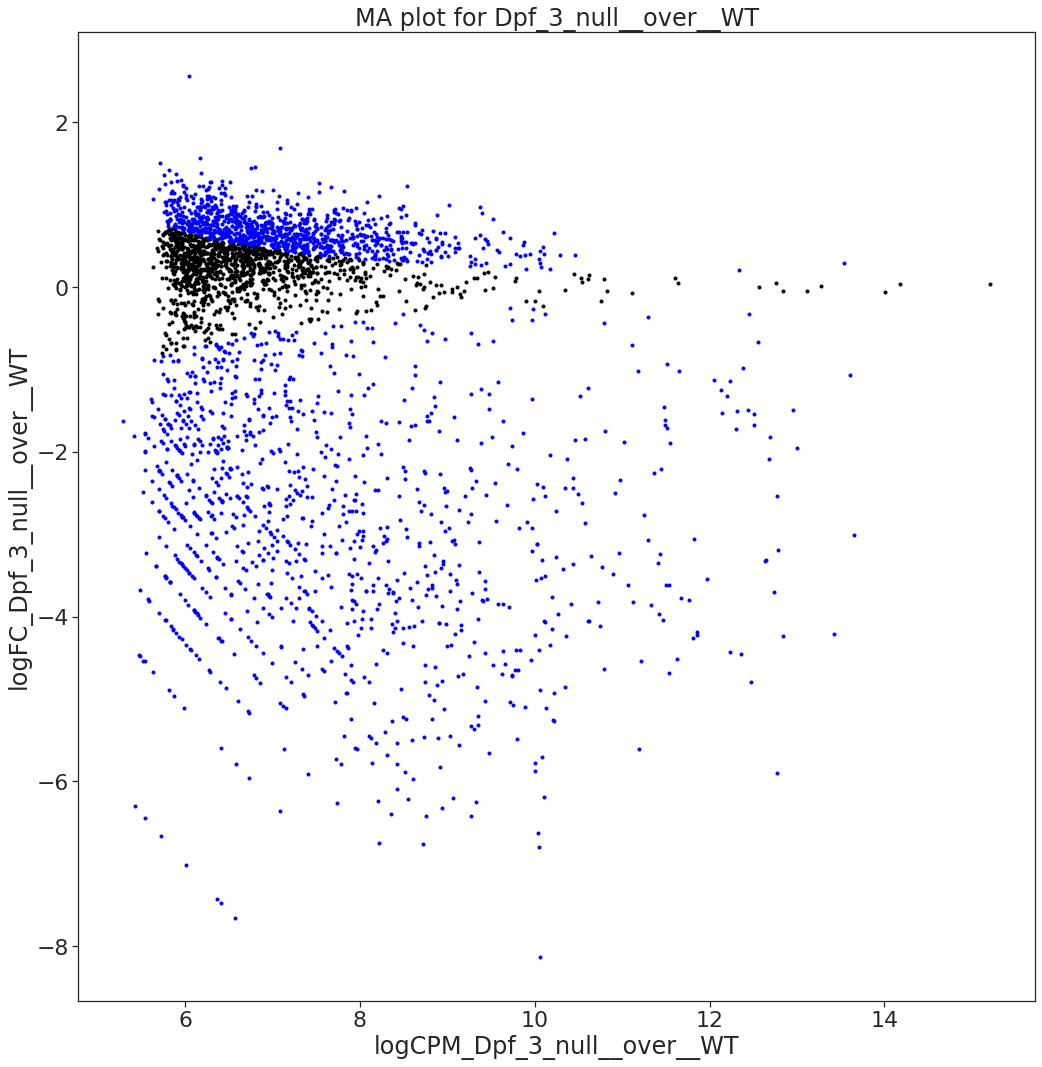

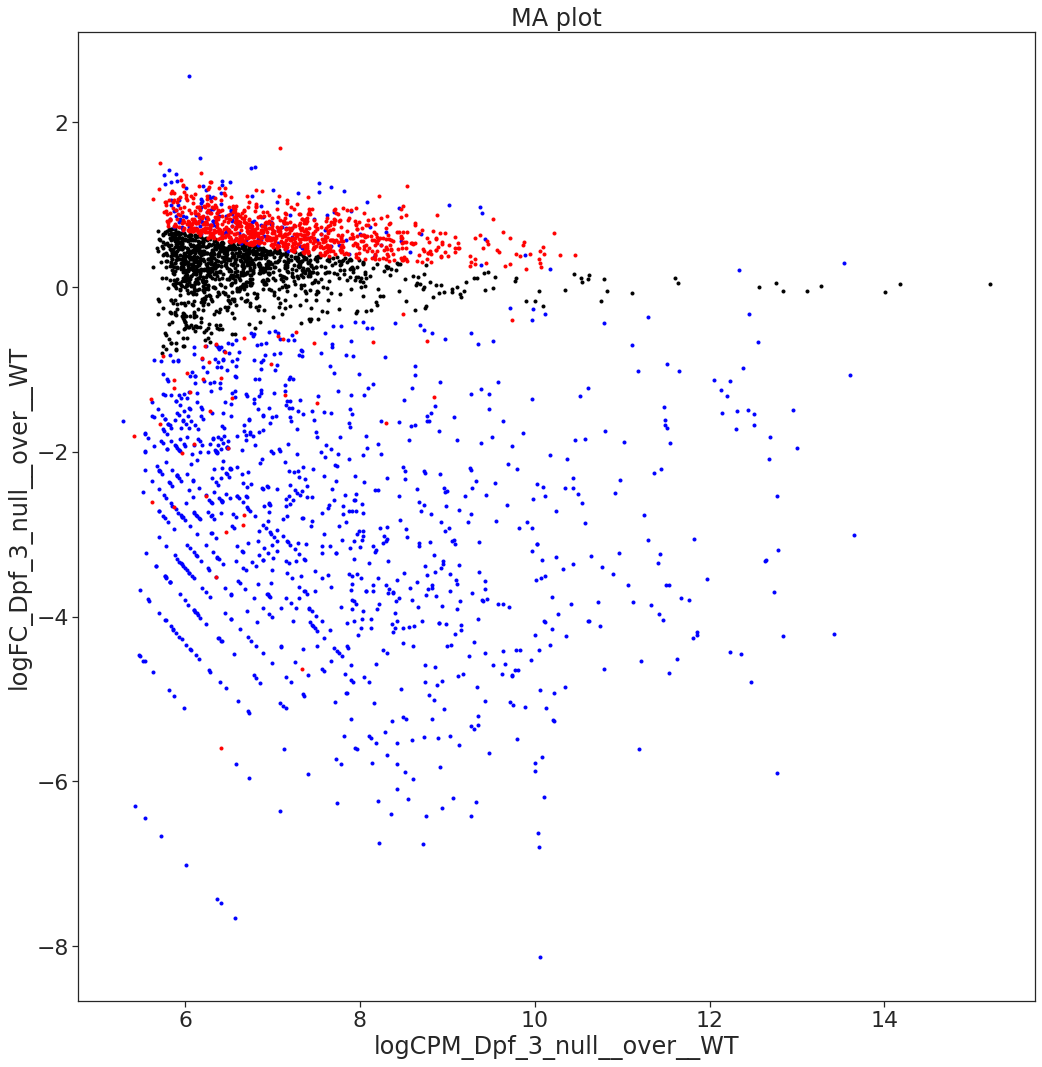

In [20]:
df_1_path = ip__csr_1_input__csr_1_IP_path
df_1_name = ip__csr_1_input__csr_1_IP_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

# Small RNAs in DPF-3 S784A

## 6. Small RNAs in DPF-3 S784A – WAGO-1 IP over Input

                                                    Significant
No                                                         1377
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-1__...          923
FDR_Dpf_3_S784A__over__WT<0.05                              350


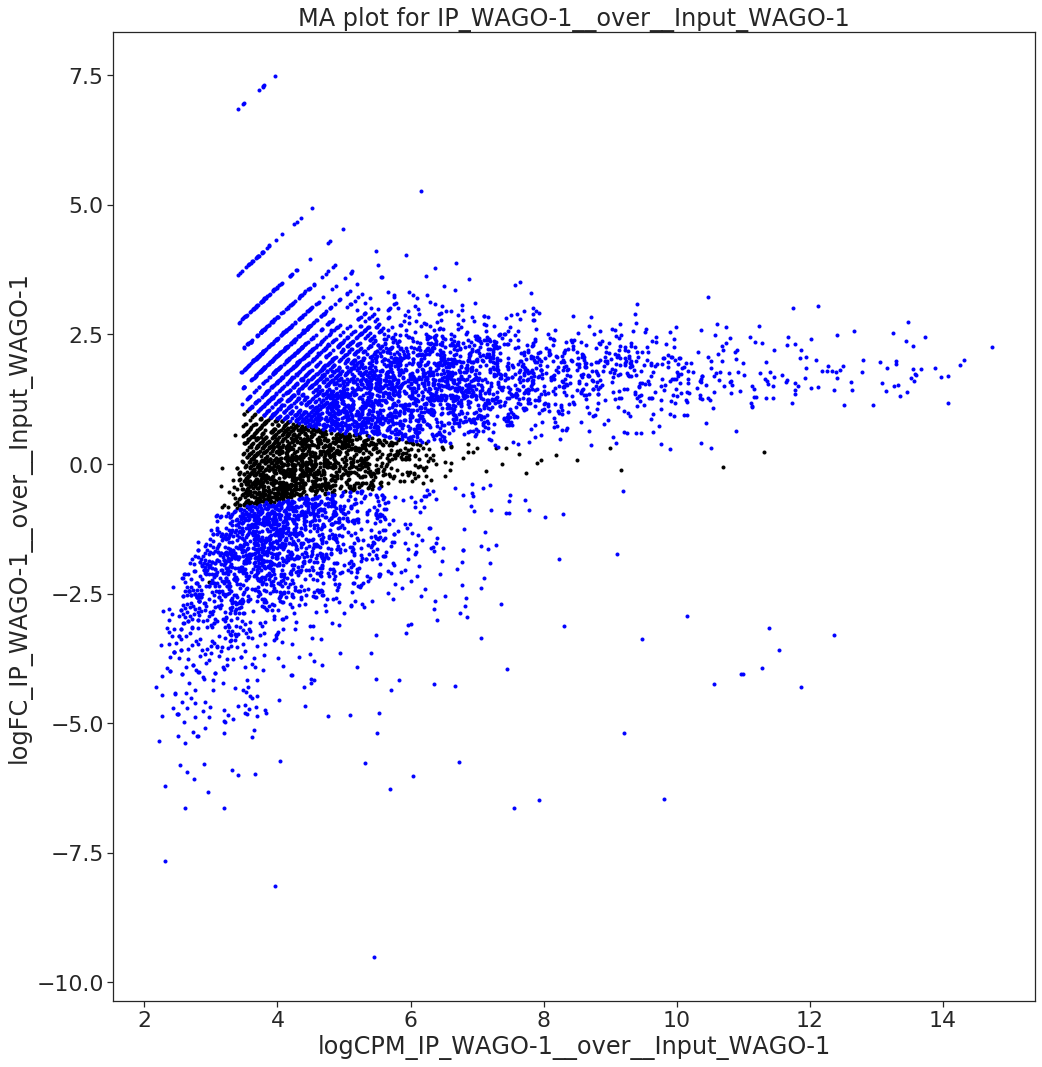

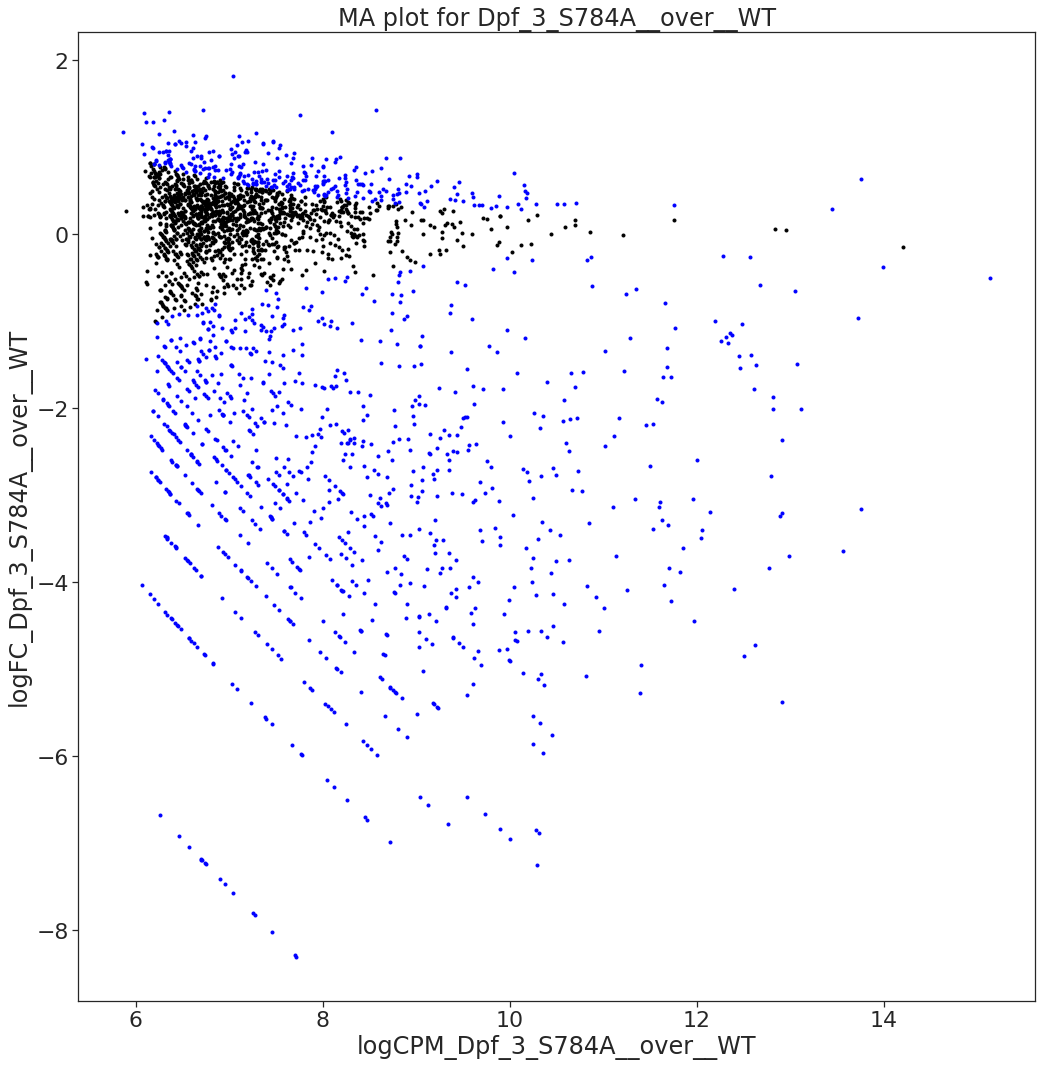

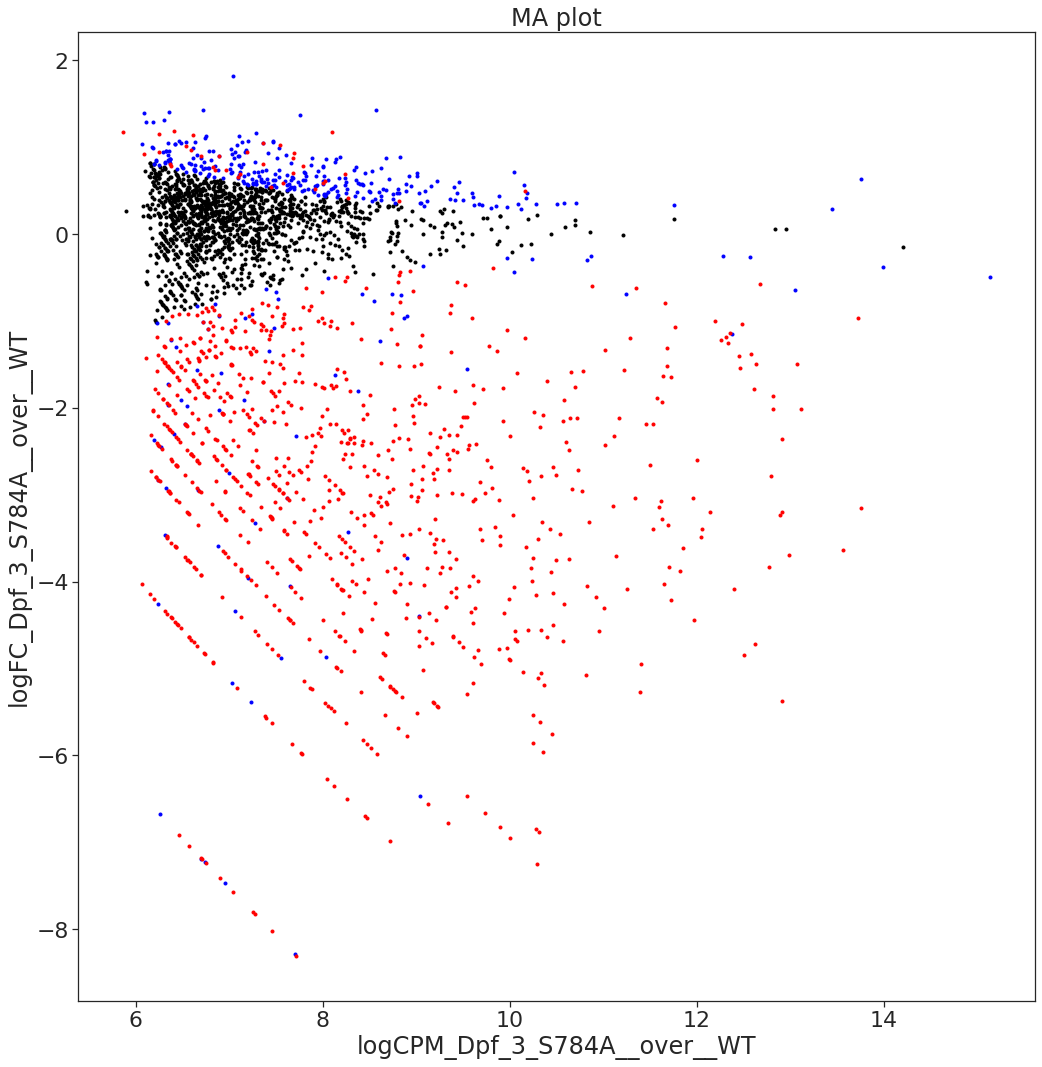

In [21]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = small_rna__WT__Dpf_3_S784A_path
df_2_name = small_rna__WT__Dpf_3_S784A_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## 7. Small RNAs in DPF-3 S784A – WAGO-1 P3G bound IP over Input

                                                    Significant
No                                                         1377
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-1_P...          896
FDR_Dpf_3_S784A__over__WT<0.05                              377


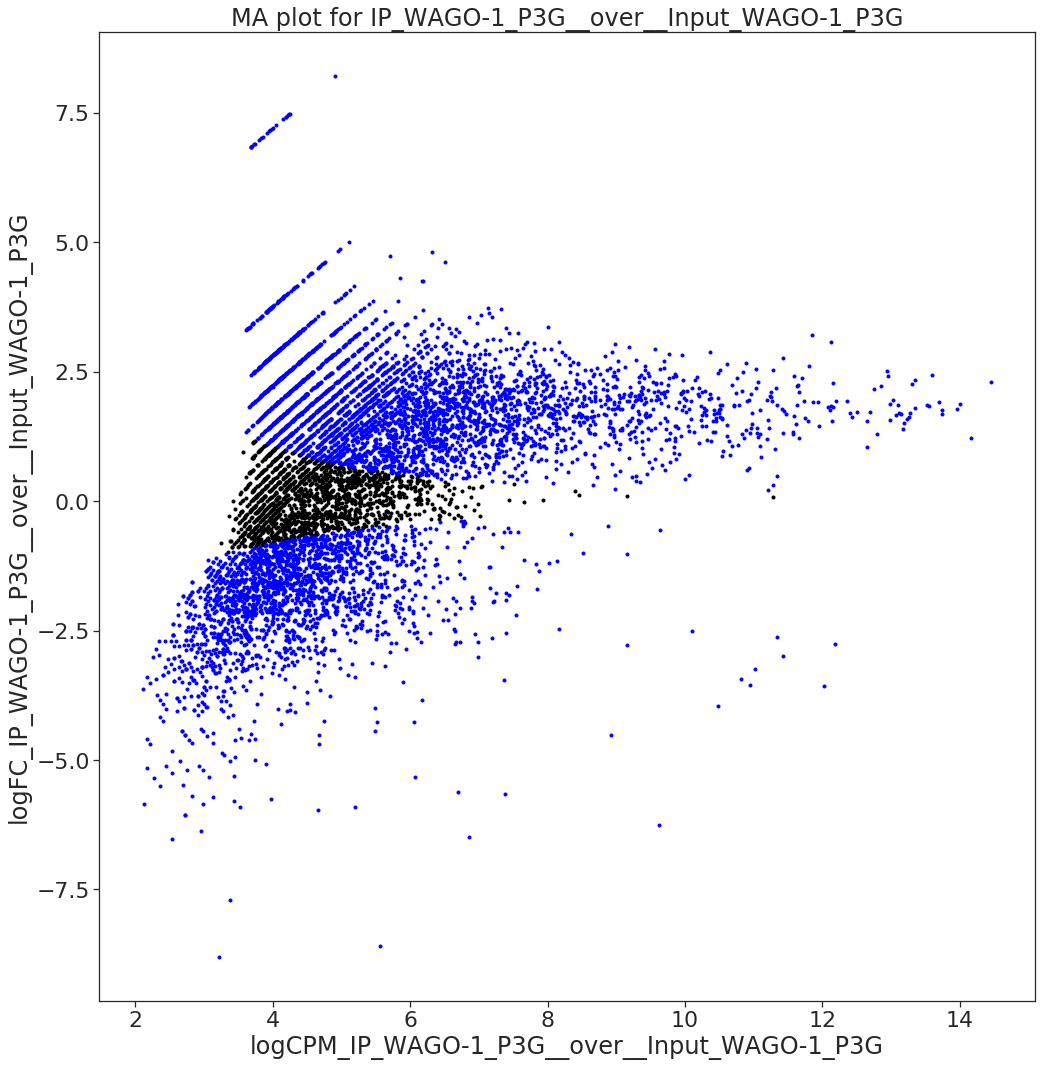

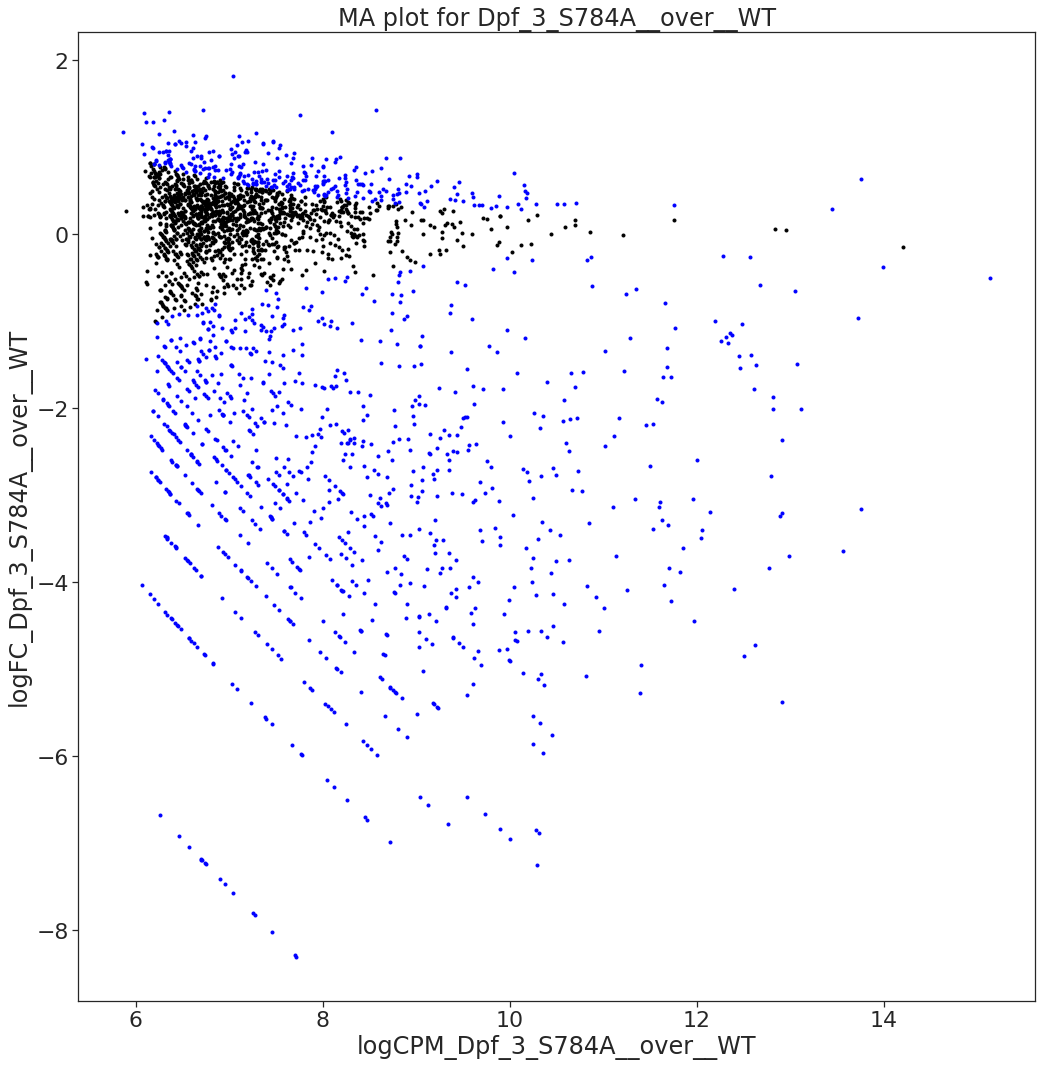

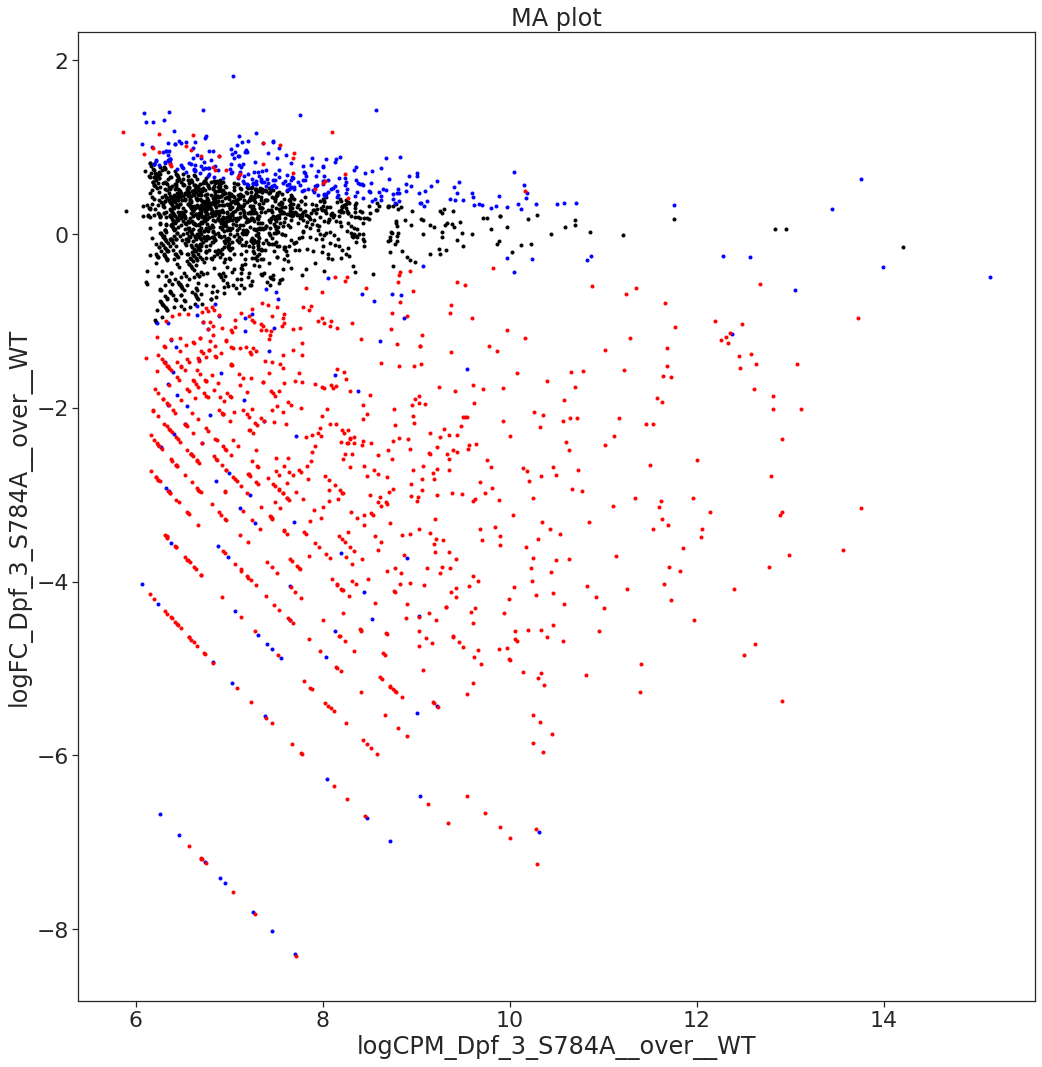

In [22]:
df_1_path = ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_path
df_1_name = ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_name

df_2_path = small_rna__WT__Dpf_3_S784A_path
df_2_name = small_rna__WT__Dpf_3_S784A_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## 8. Small RNAs in DPF-3 S784A – WAGO-1 bound in dpf-3 null IP over Input

                                                    Significant
No                                                         1377
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-1_d...          881
FDR_Dpf_3_S784A__over__WT<0.05                              392


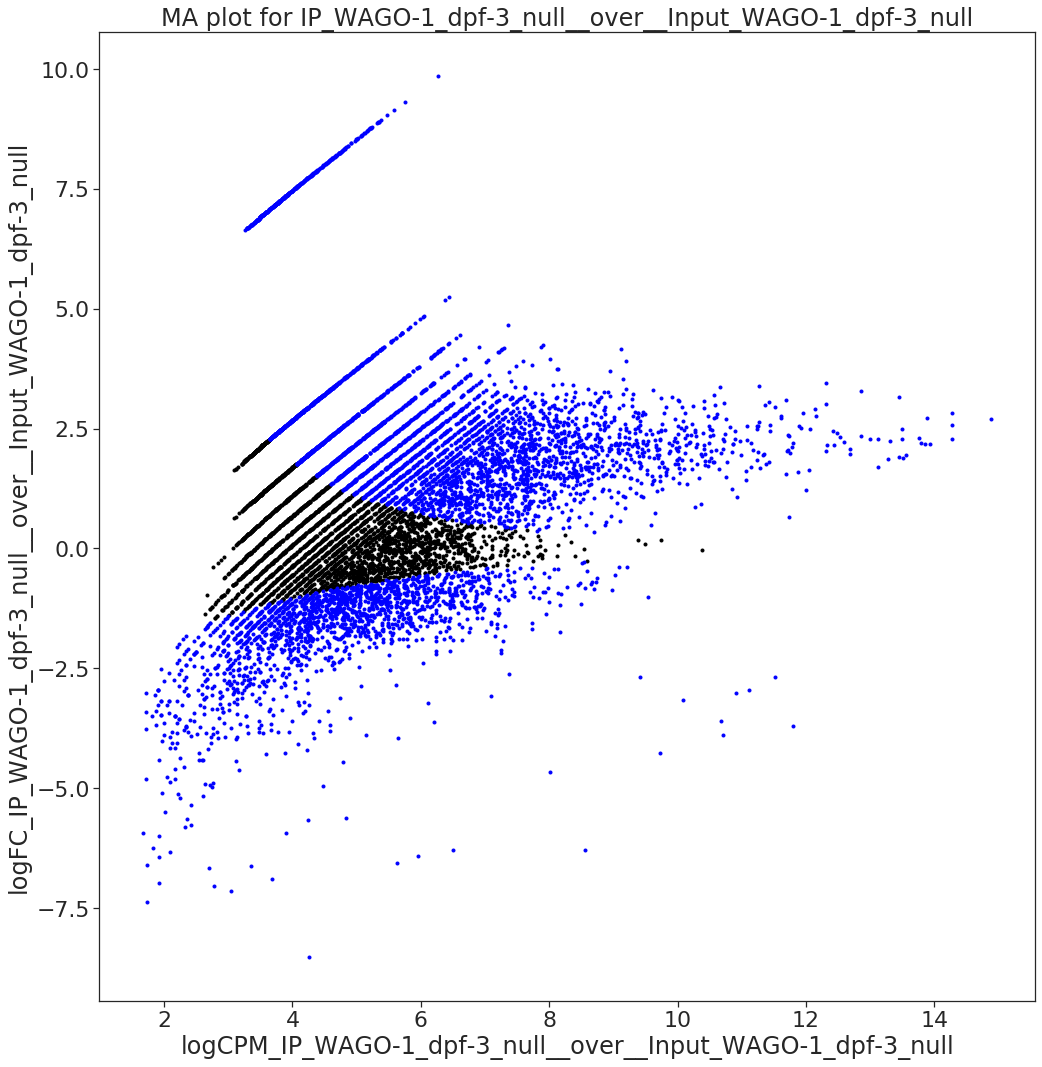

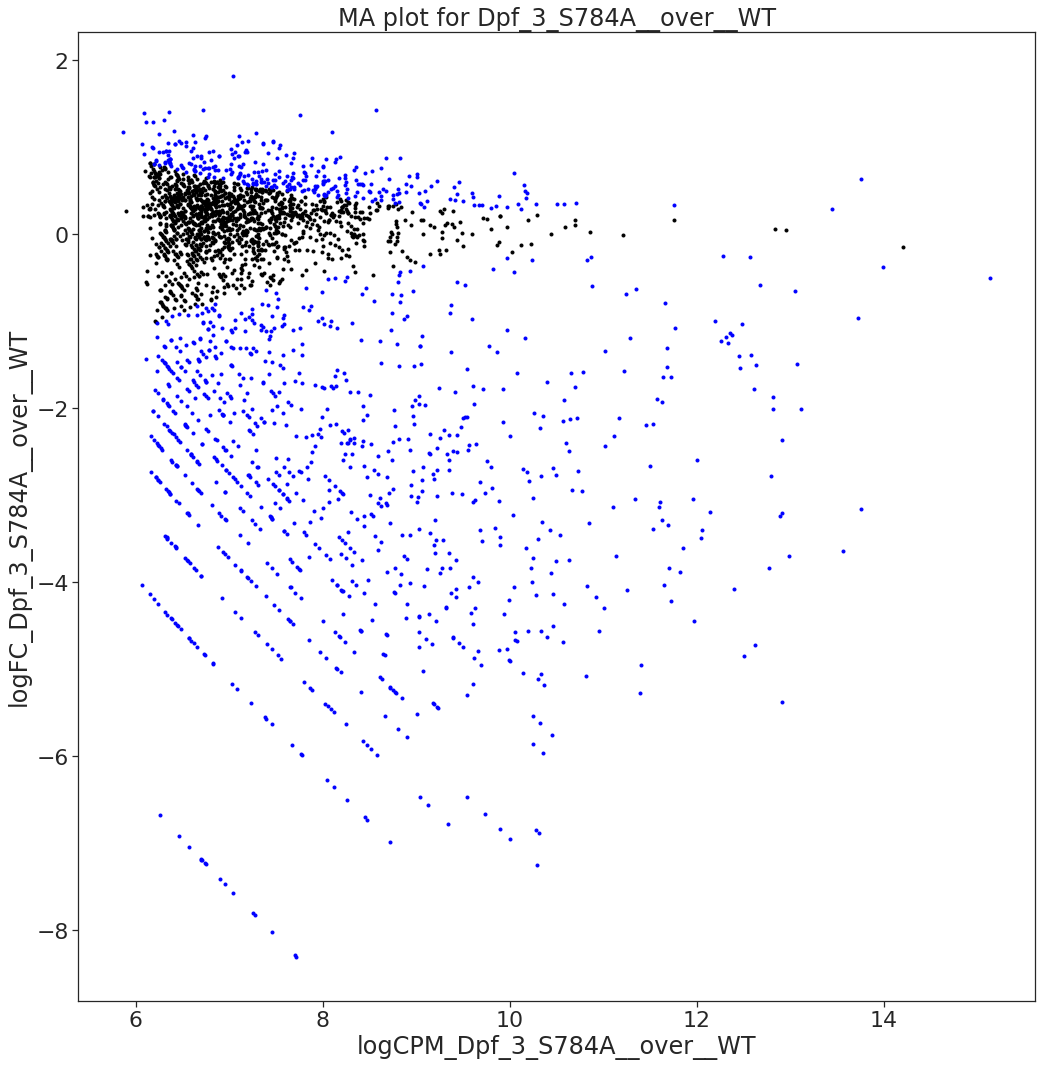

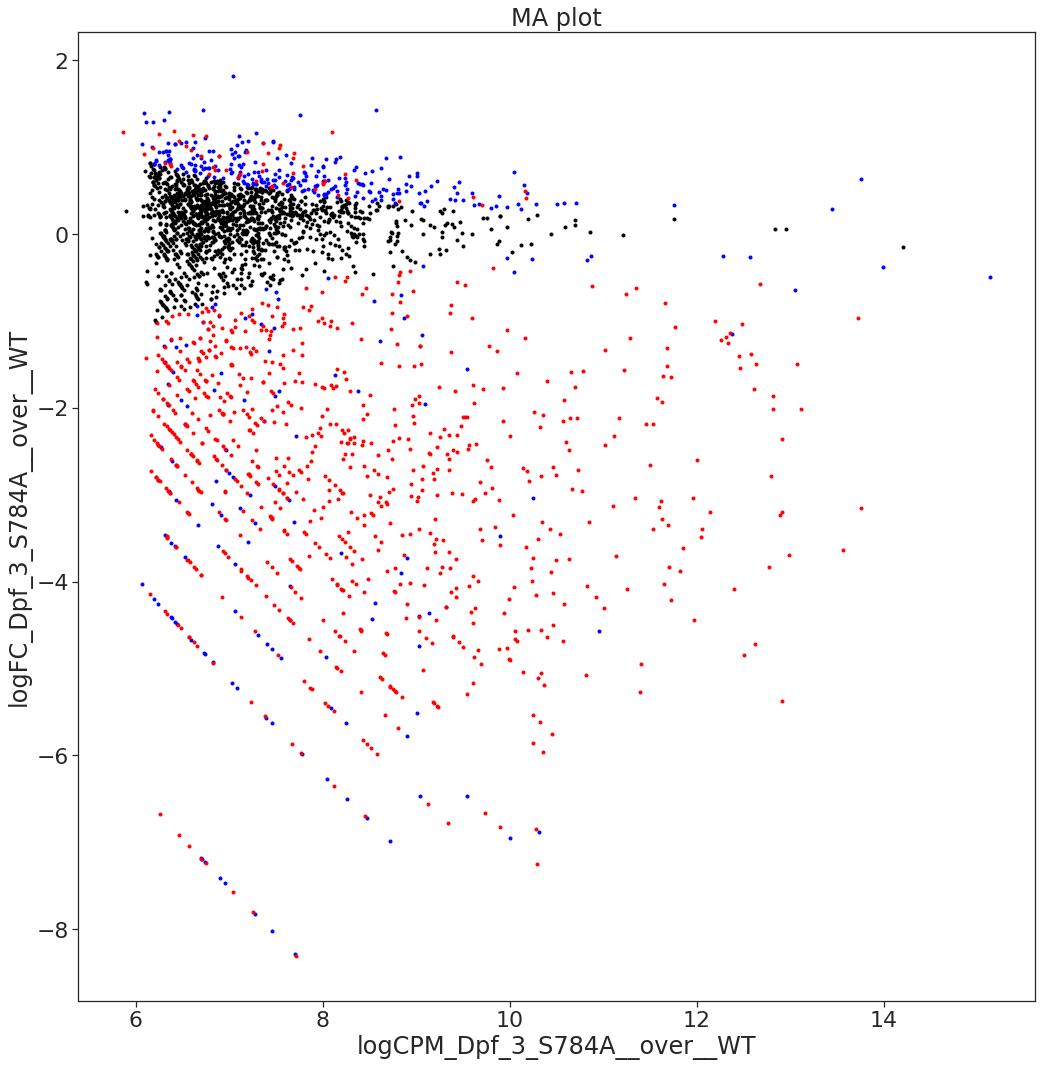

In [23]:
df_1_path = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path
df_1_name = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name

df_2_path = small_rna__WT__Dpf_3_S784A_path
df_2_name = small_rna__WT__Dpf_3_S784A_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## 9. Small RNAs in DPF-3 S784A – WAGO-3 bound IP over Input

                                                    Significant
No                                                         1377
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-3__...          924
FDR_Dpf_3_S784A__over__WT<0.05                              349


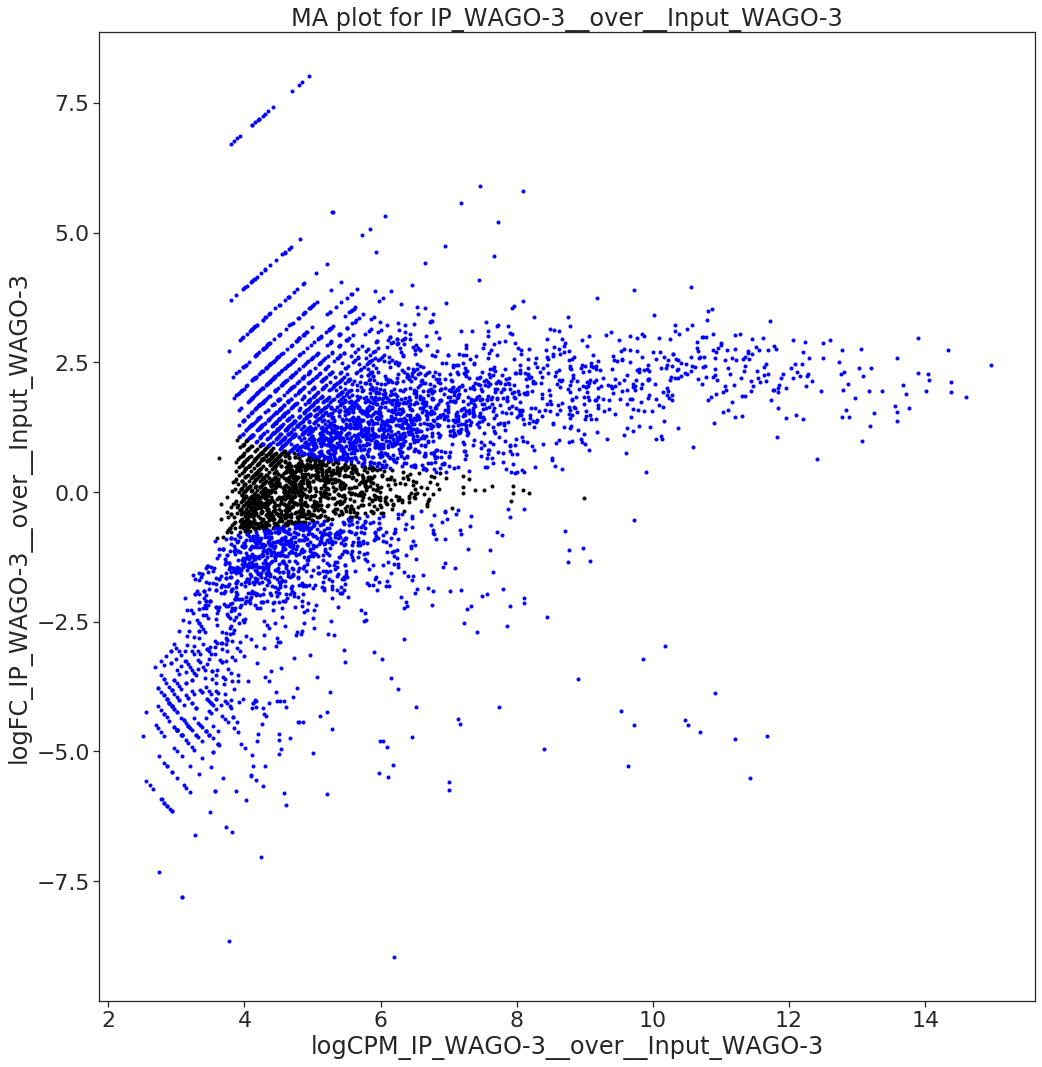

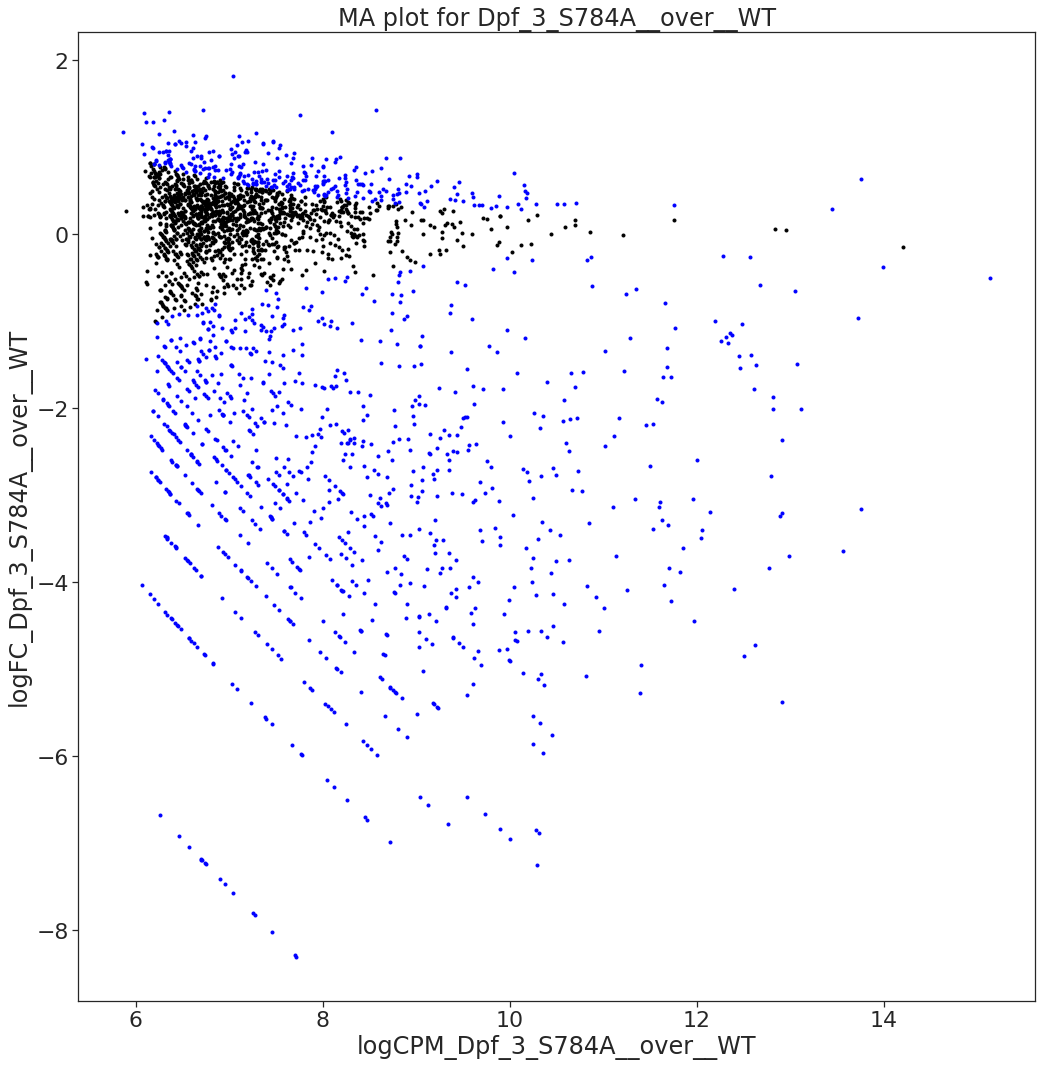

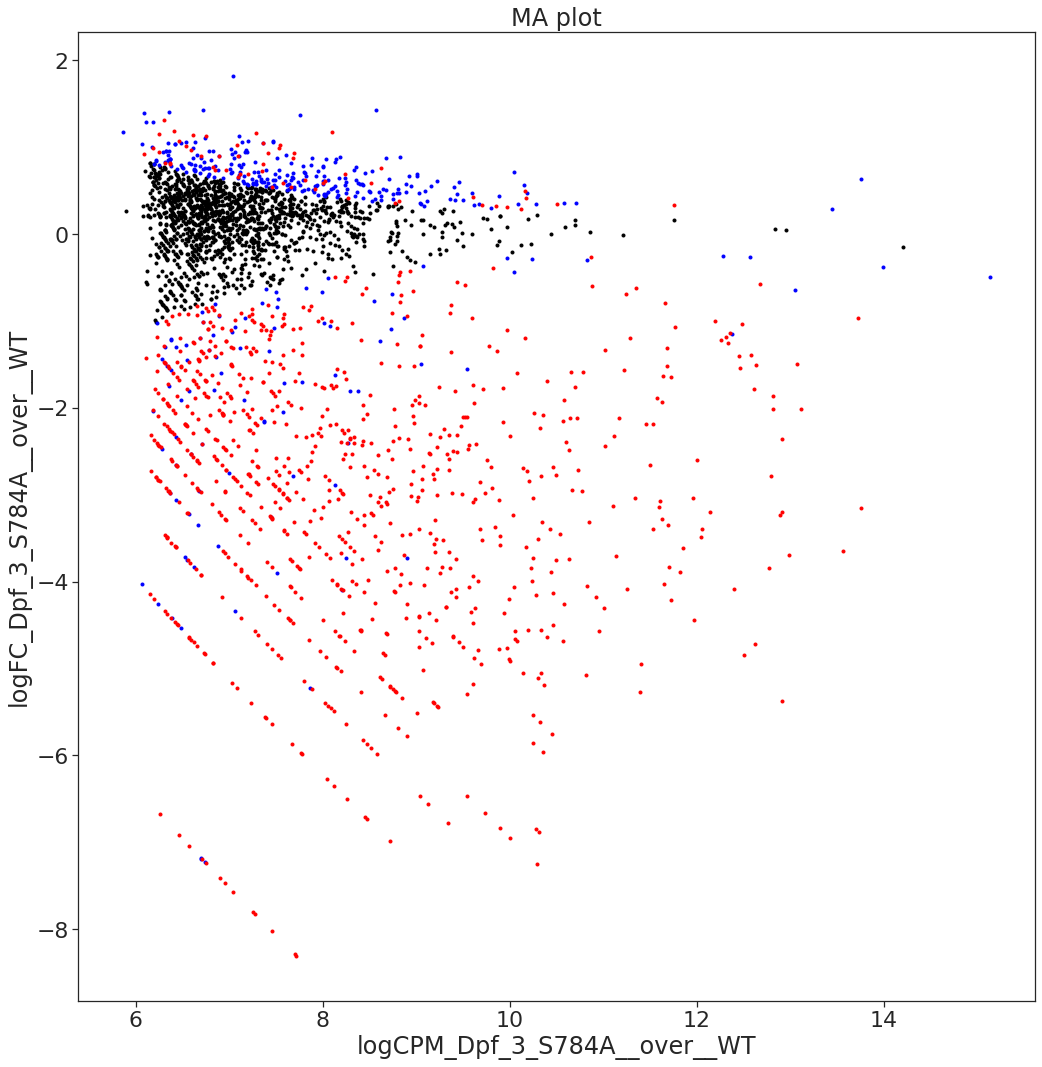

In [24]:
df_1_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_1_name = ip__Input_WAGO_3__IP_WAGO_3_name

df_2_path = small_rna__WT__Dpf_3_S784A_path
df_2_name = small_rna__WT__Dpf_3_S784A_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## 10. Small RNAs in DPF-3 S784A – WAGO-3 bound in dpf-3 null IP over Input

                                                    Significant
No                                                         1377
FDR_Dpf_3_S784A__over__WT<0.05                              727
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-3_d...          546


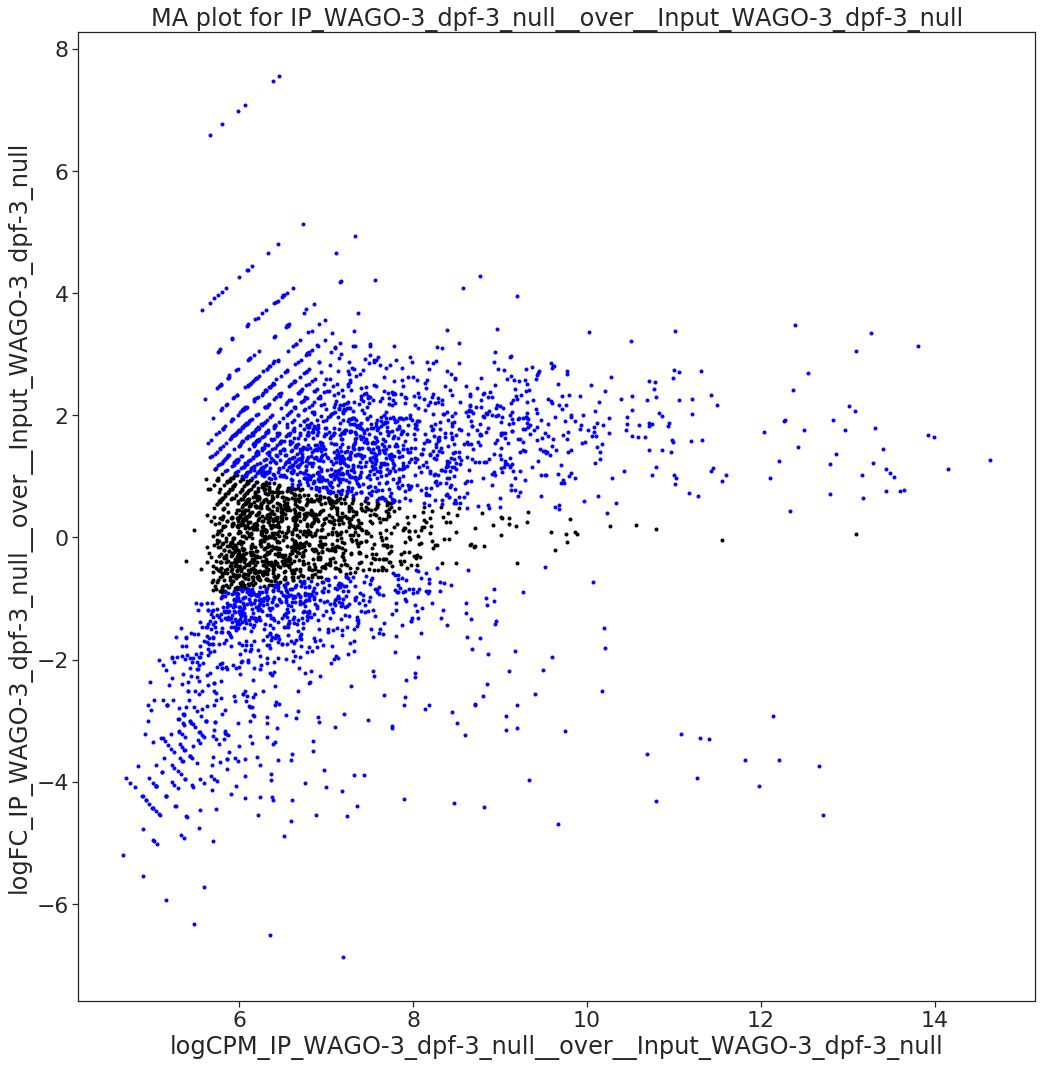

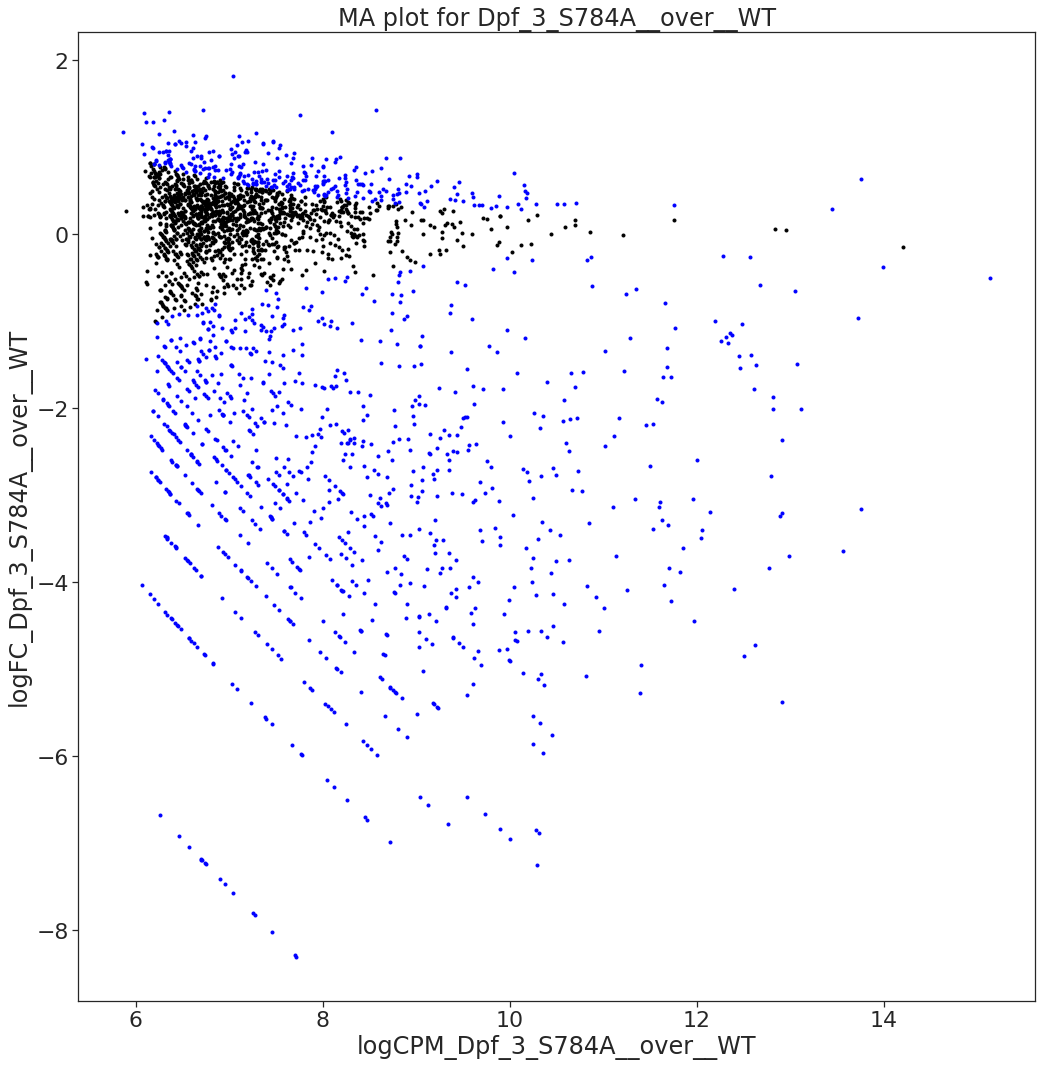

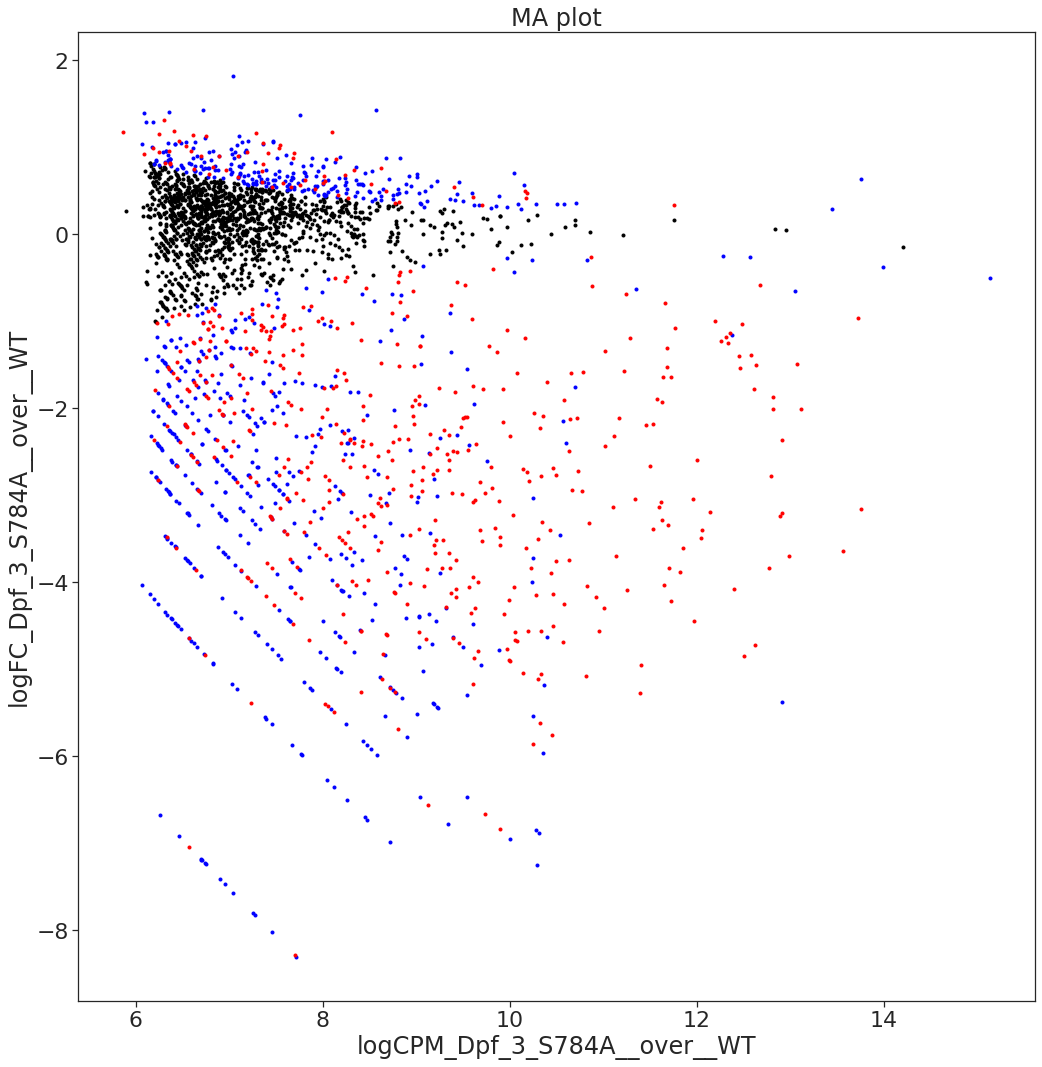

In [25]:
df_1_path = ip__Input_WAGO_3_dpf_3_null__IP_WAGO_3_dpf_3_null_path
df_1_name = ip__Input_WAGO_3_dpf_3_null__IP_WAGO_3_dpf_3_null_name

df_2_path = small_rna__WT__Dpf_3_S784A_path
df_2_name = small_rna__WT__Dpf_3_S784A_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Extra plot Small RNAs dpf-3 S784A – csr-1 over Input

                                                    Significant
No                                                         1377
FDR_Dpf_3_S784A__over__WT<0.05                              981
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_csr-1__o...          292


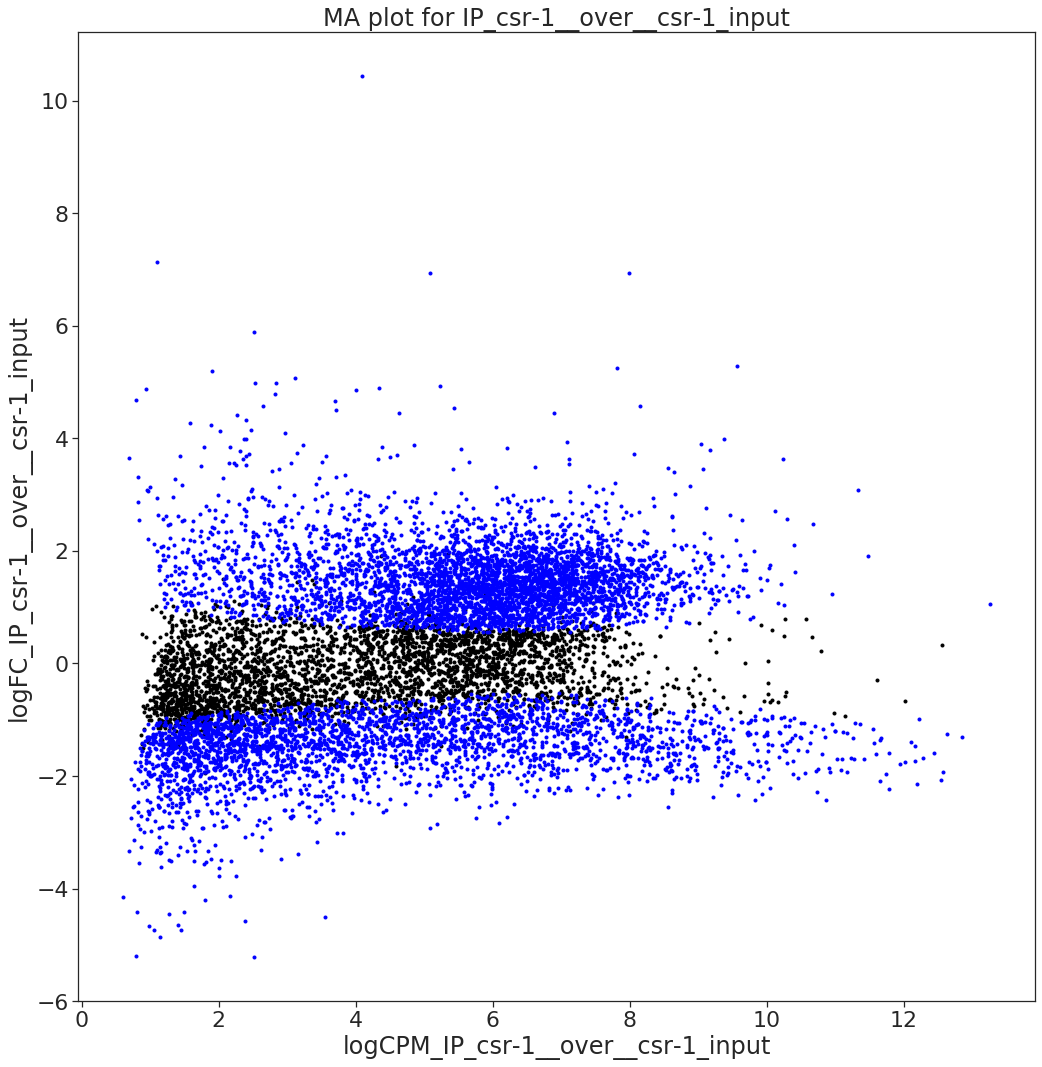

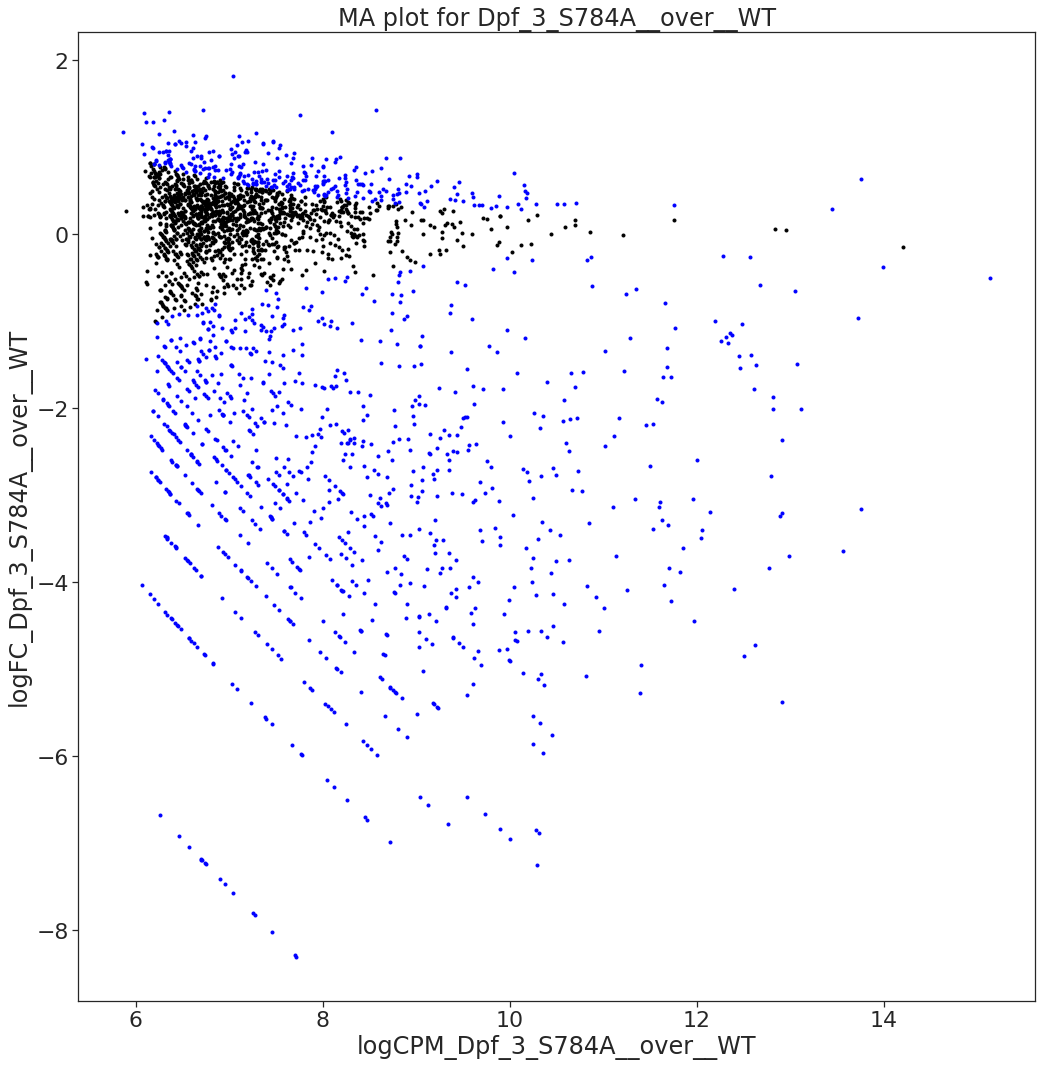

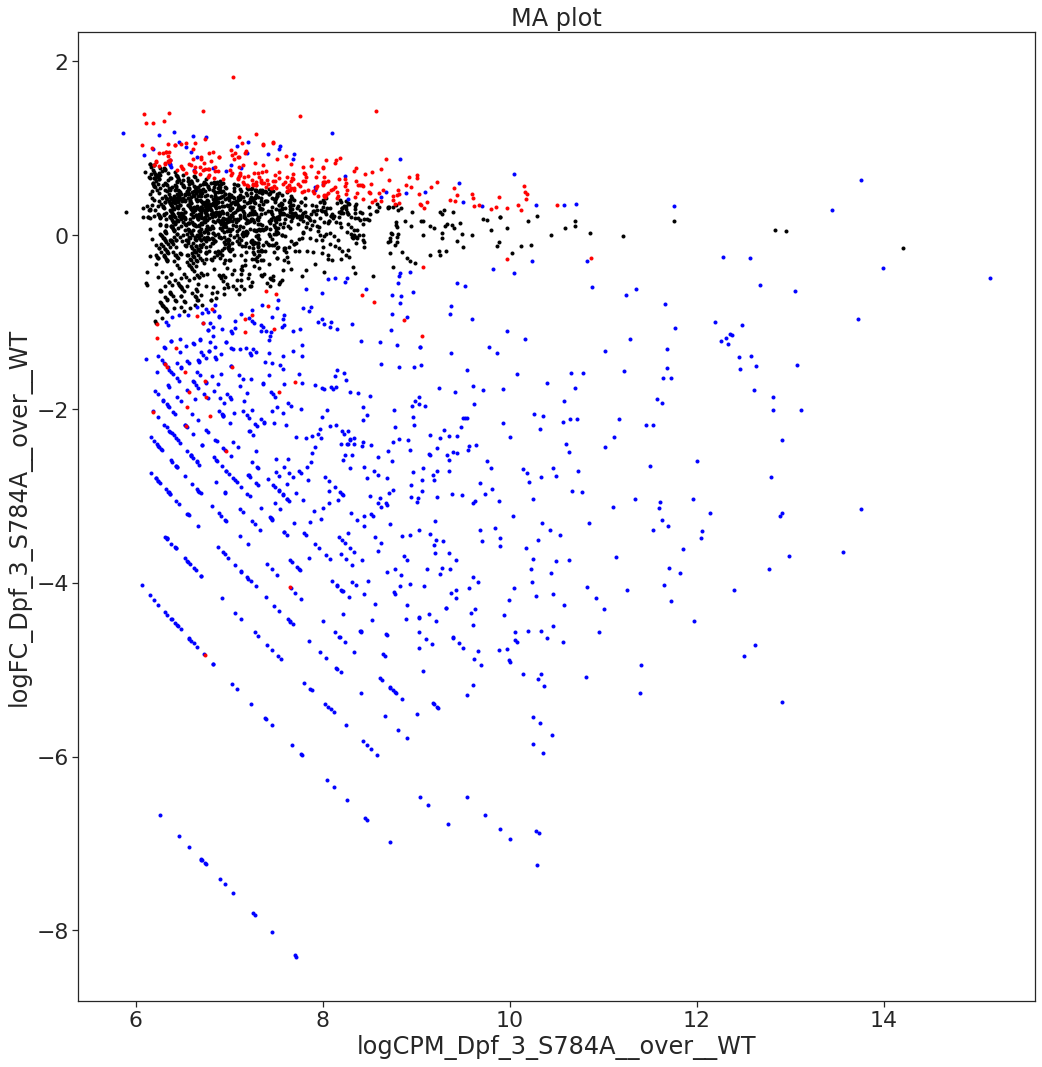

In [26]:
df_1_path = ip__csr_1_input__csr_1_IP_path
df_1_name = ip__csr_1_input__csr_1_IP_name

df_2_path = small_rna__WT__Dpf_3_S784A_path
df_2_name = small_rna__WT__Dpf_3_S784A_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

# Small RNAs in mut-2

## 11. Small RNAs mut-2 – WAGO-1 over Input

                                                    Significant
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-1__over__...         1046
No                                                          927
FDR_mut_2__over__WT<0.05                                    694


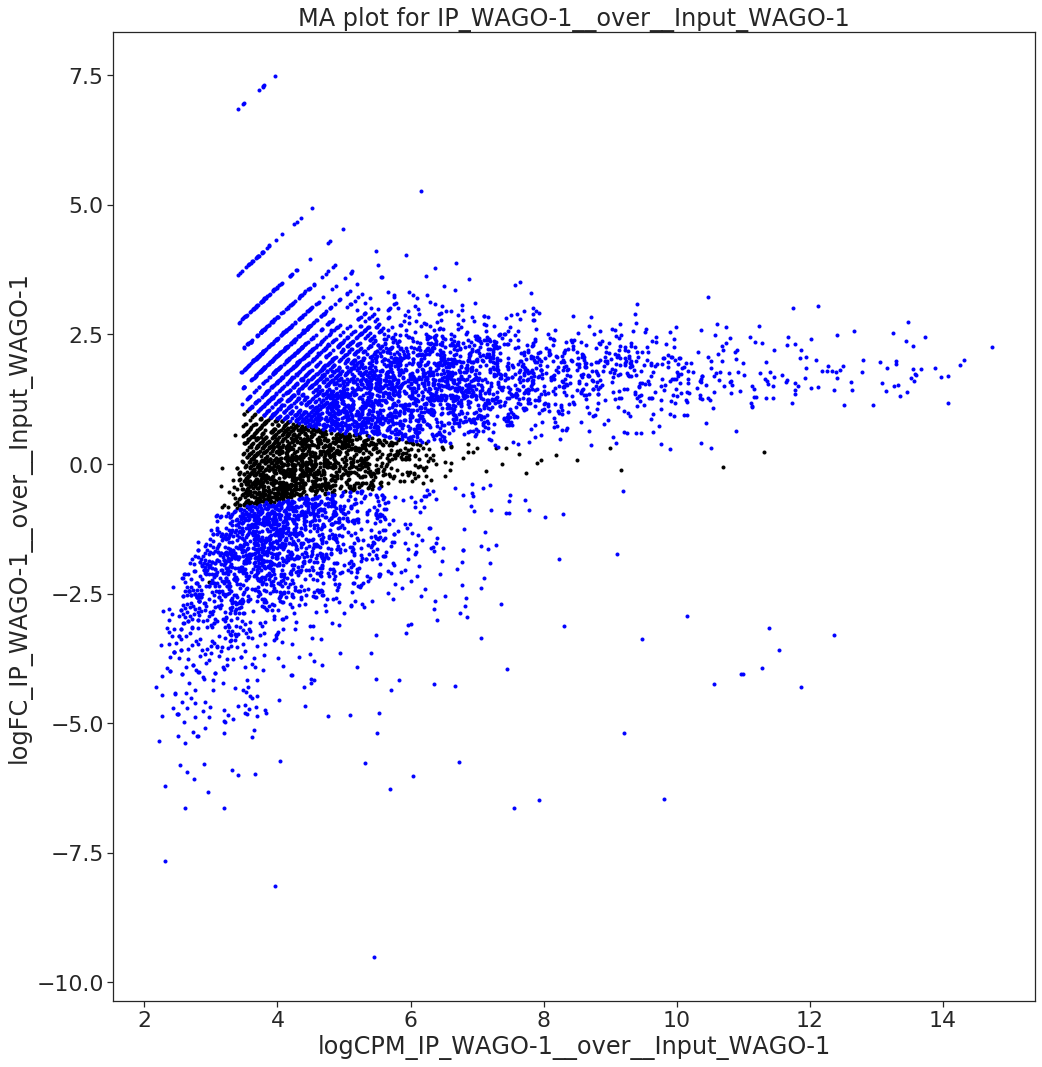

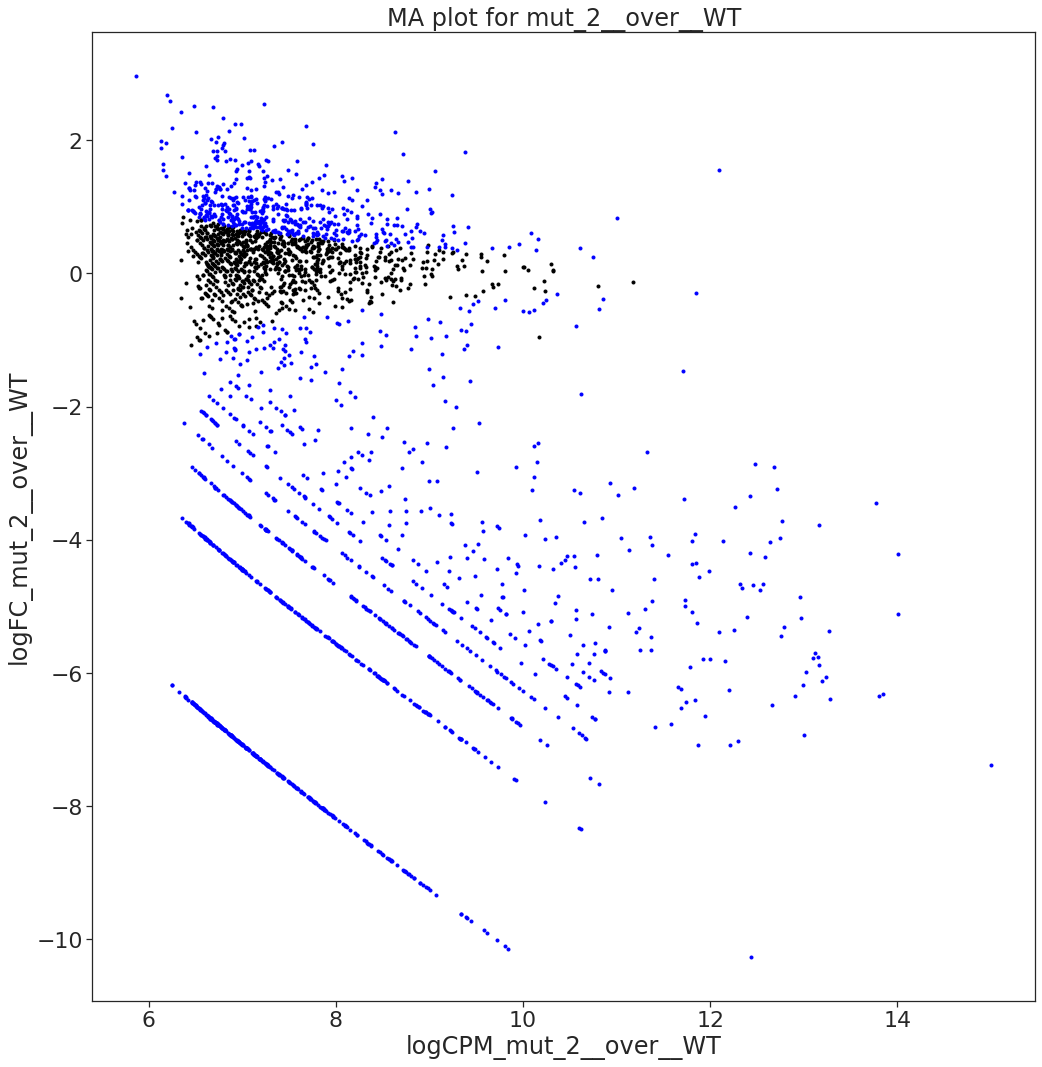

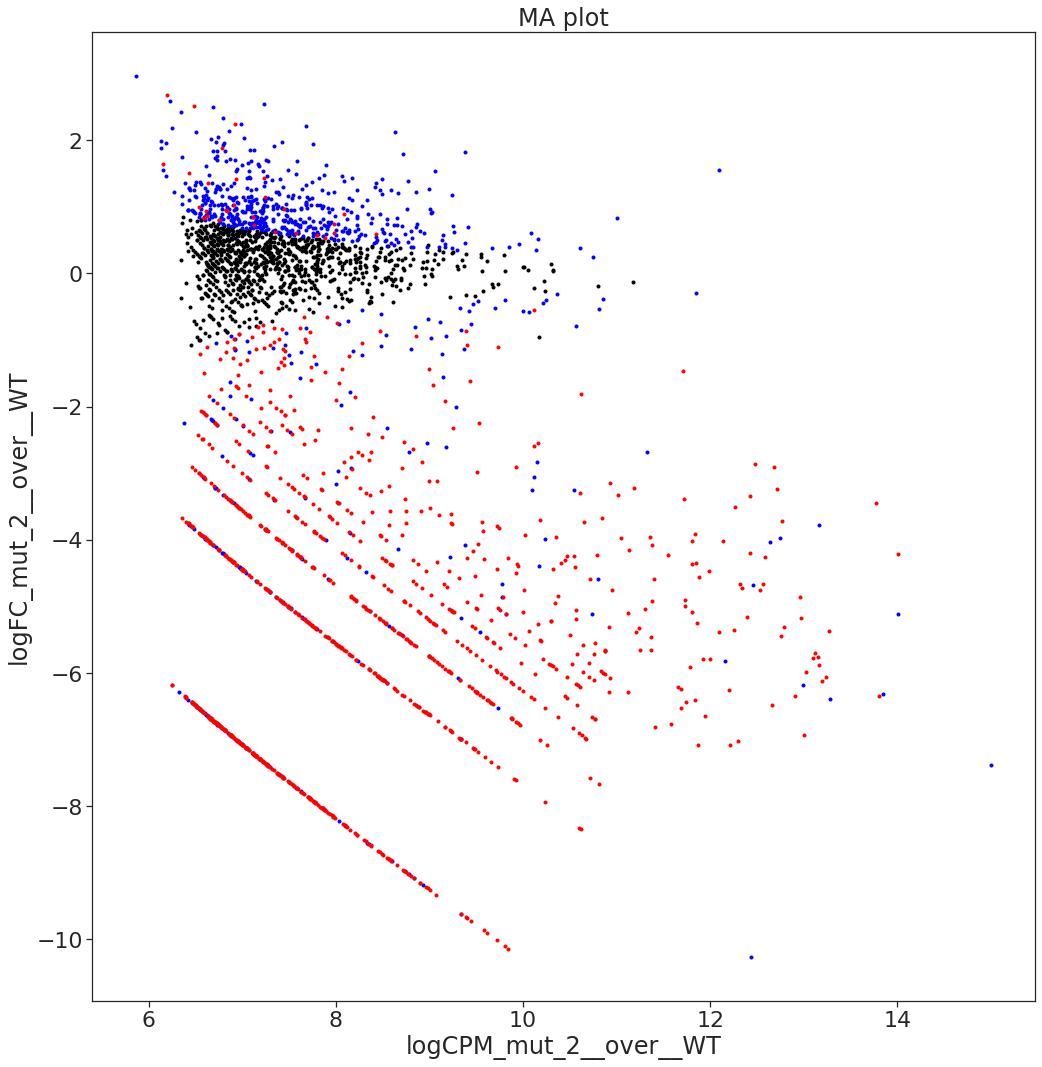

In [27]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = small_rna__WT__mut_2_path
df_2_name = small_rna__WT__mut_2_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## 2. Small RNAs mut-2 – WAGO-1 P3G IP over Input

                                                    Significant
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-1_P3G__ov...         1027
No                                                          927
FDR_mut_2__over__WT<0.05                                    713


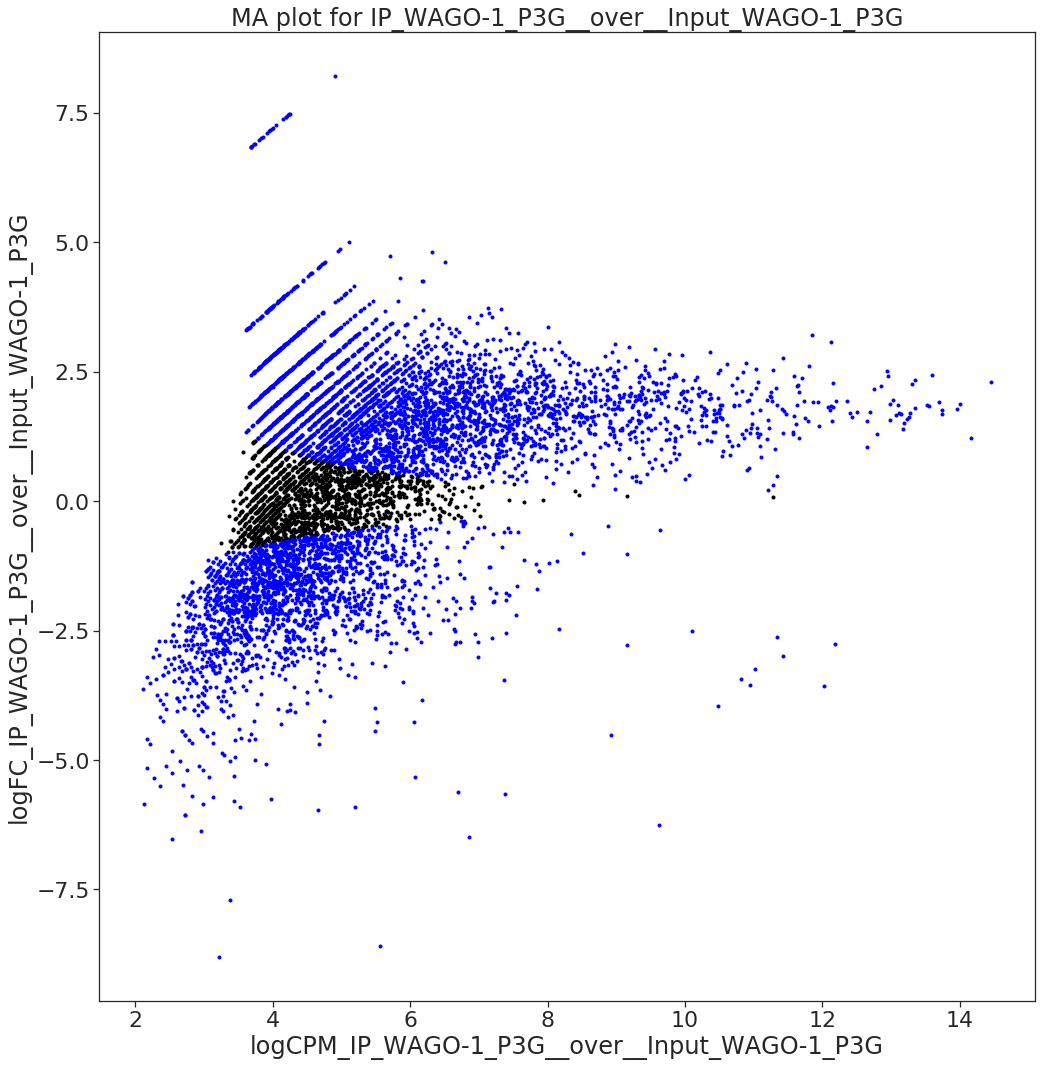

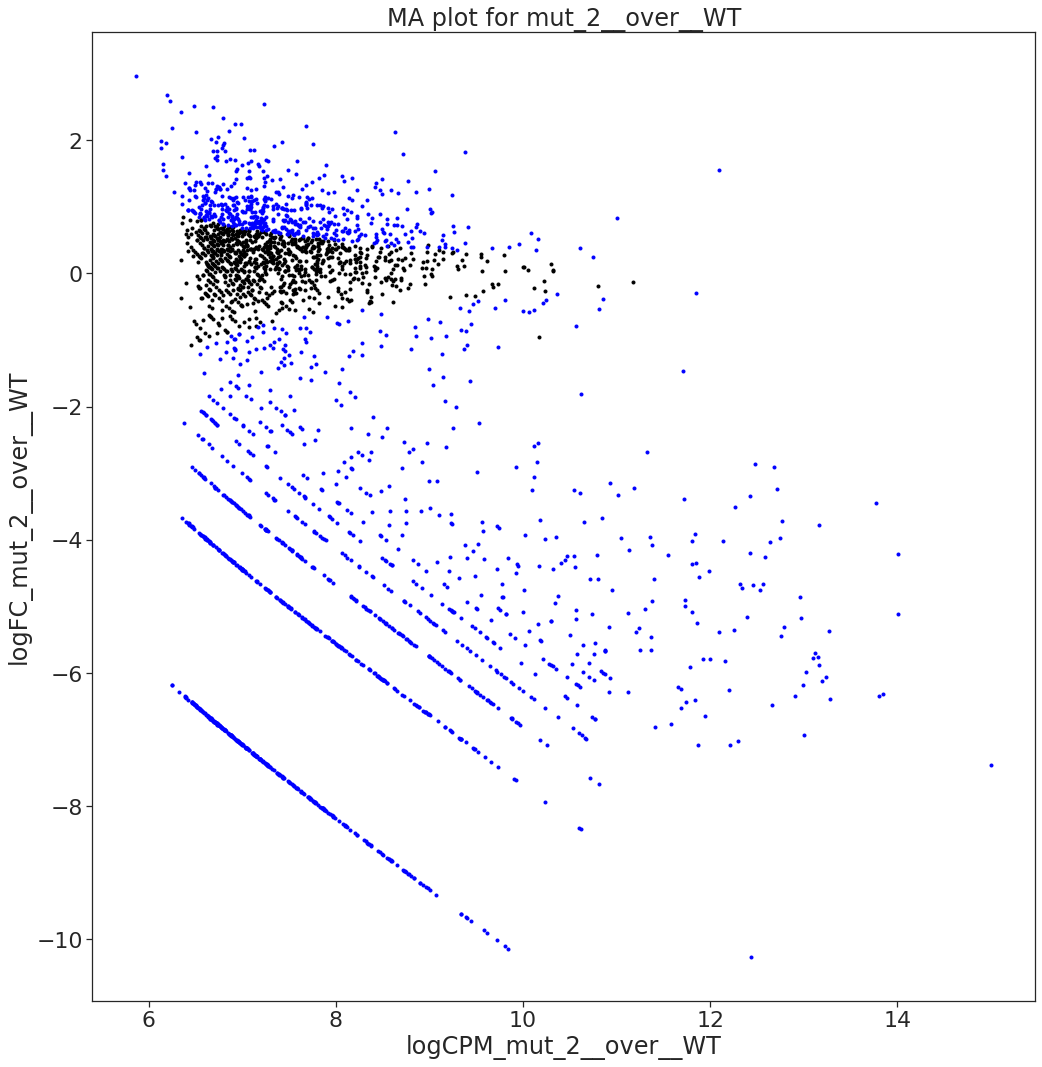

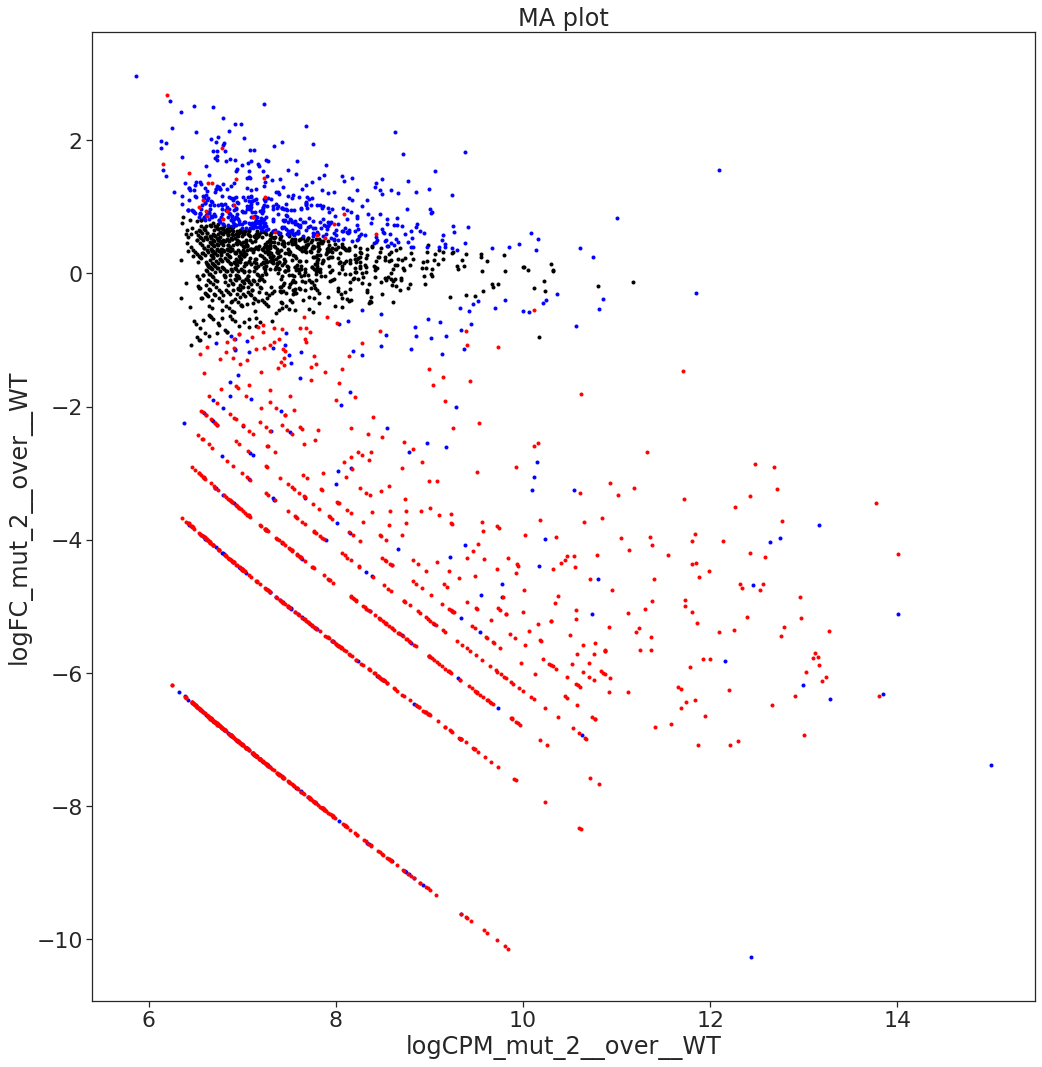

In [28]:
df_1_path = ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_path
df_1_name = ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_name

df_2_path = small_rna__WT__mut_2_path
df_2_name = small_rna__WT__mut_2_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## 3. Small RNAs in mut-2 – WAGO-1 in dpf-3 null IP over Input

                                                    Significant
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-1_dpf-3_n...         1016
No                                                          927
FDR_mut_2__over__WT<0.05                                    724


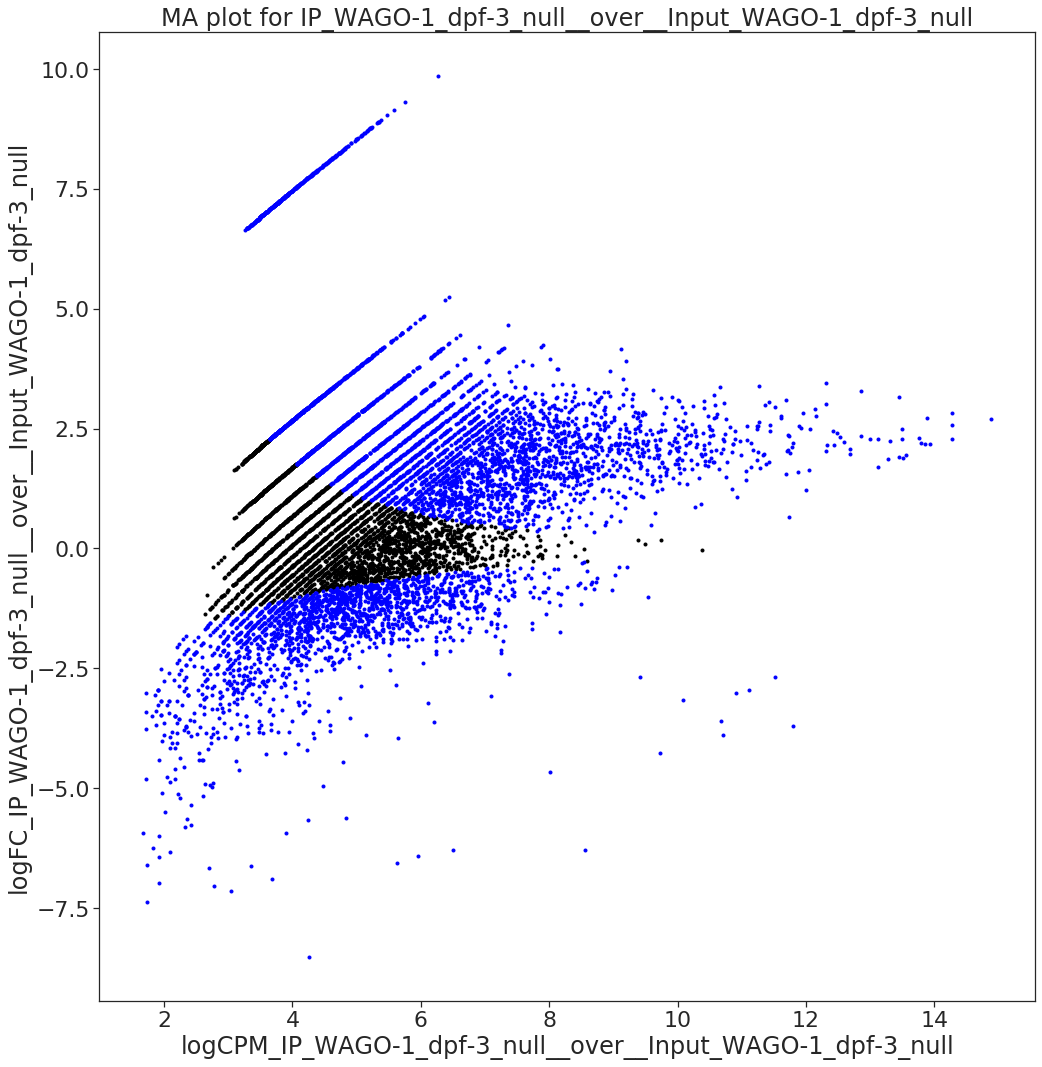

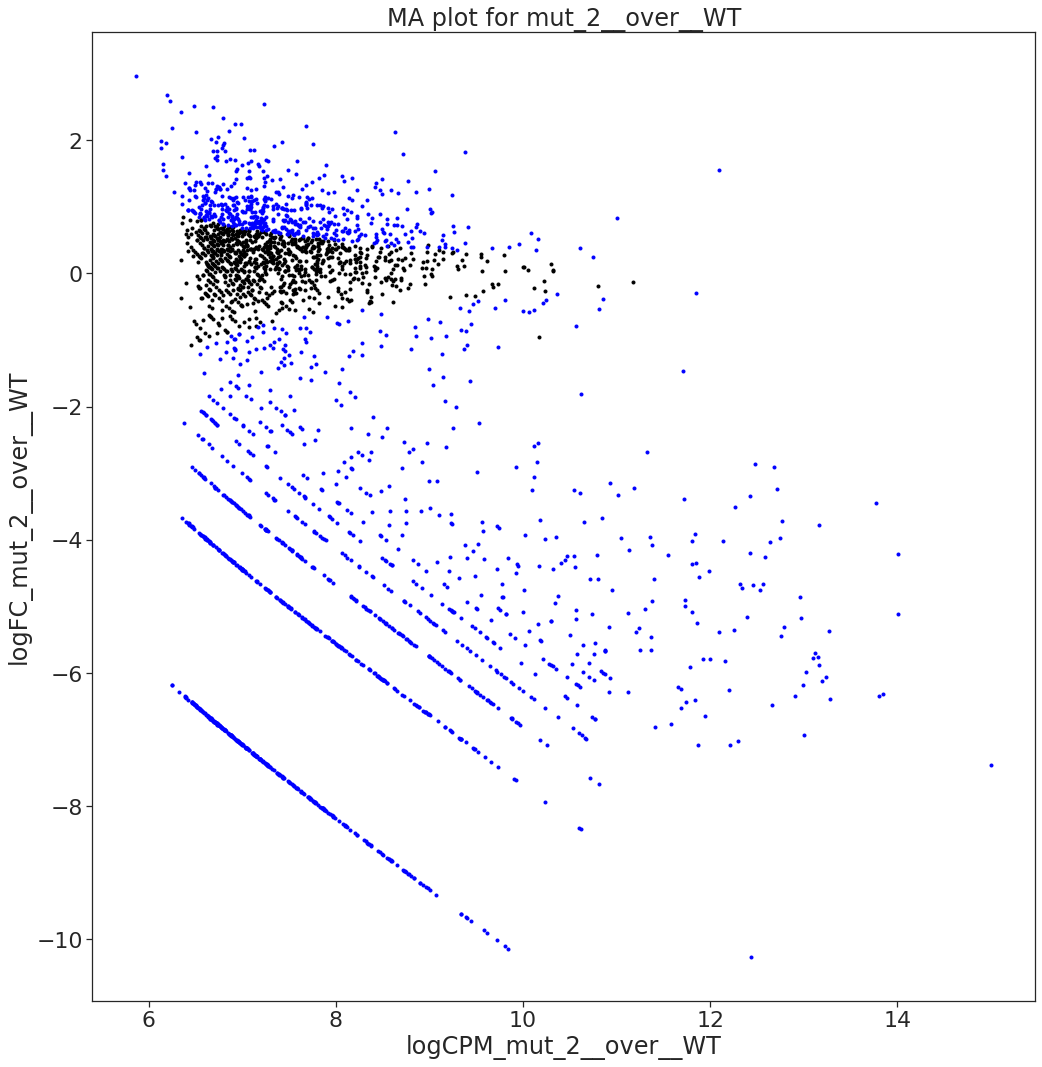

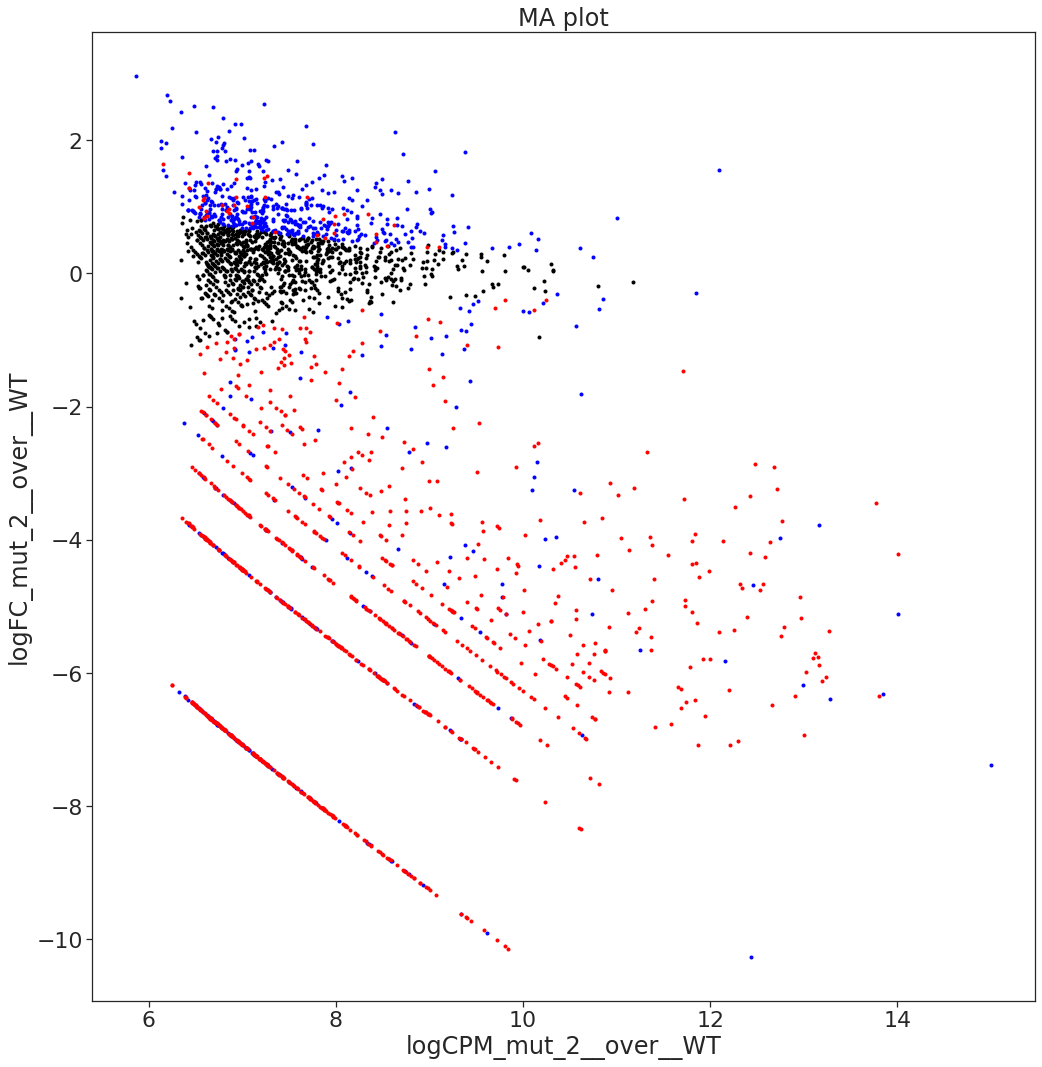

In [29]:
df_1_path = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path
df_1_name = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name

df_2_path = small_rna__WT__mut_2_path
df_2_name = small_rna__WT__mut_2_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## 14.Small RNAs in mut-2 – WAGO-3 IP over Input

                                                    Significant
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-3__over__...         1035
No                                                          927
FDR_mut_2__over__WT<0.05                                    705


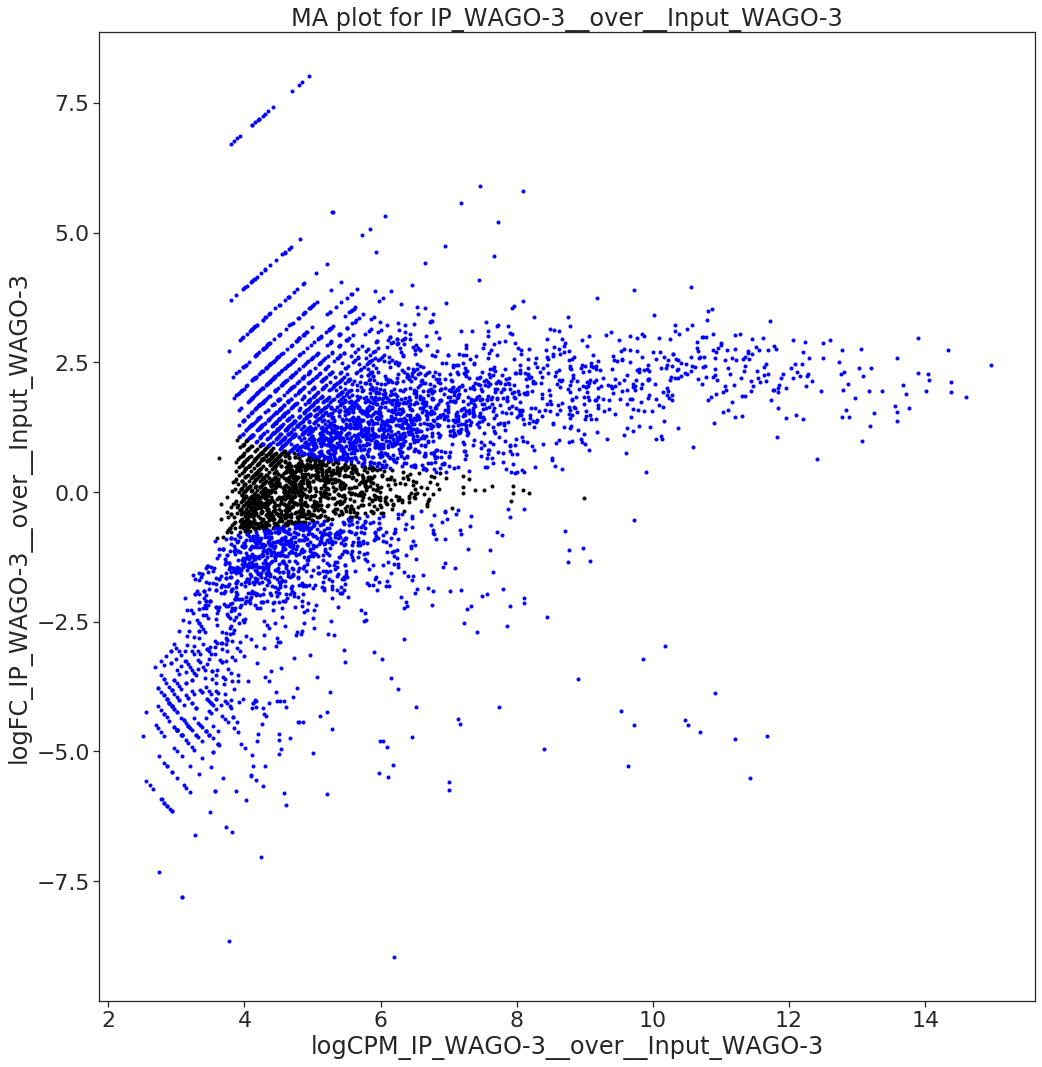

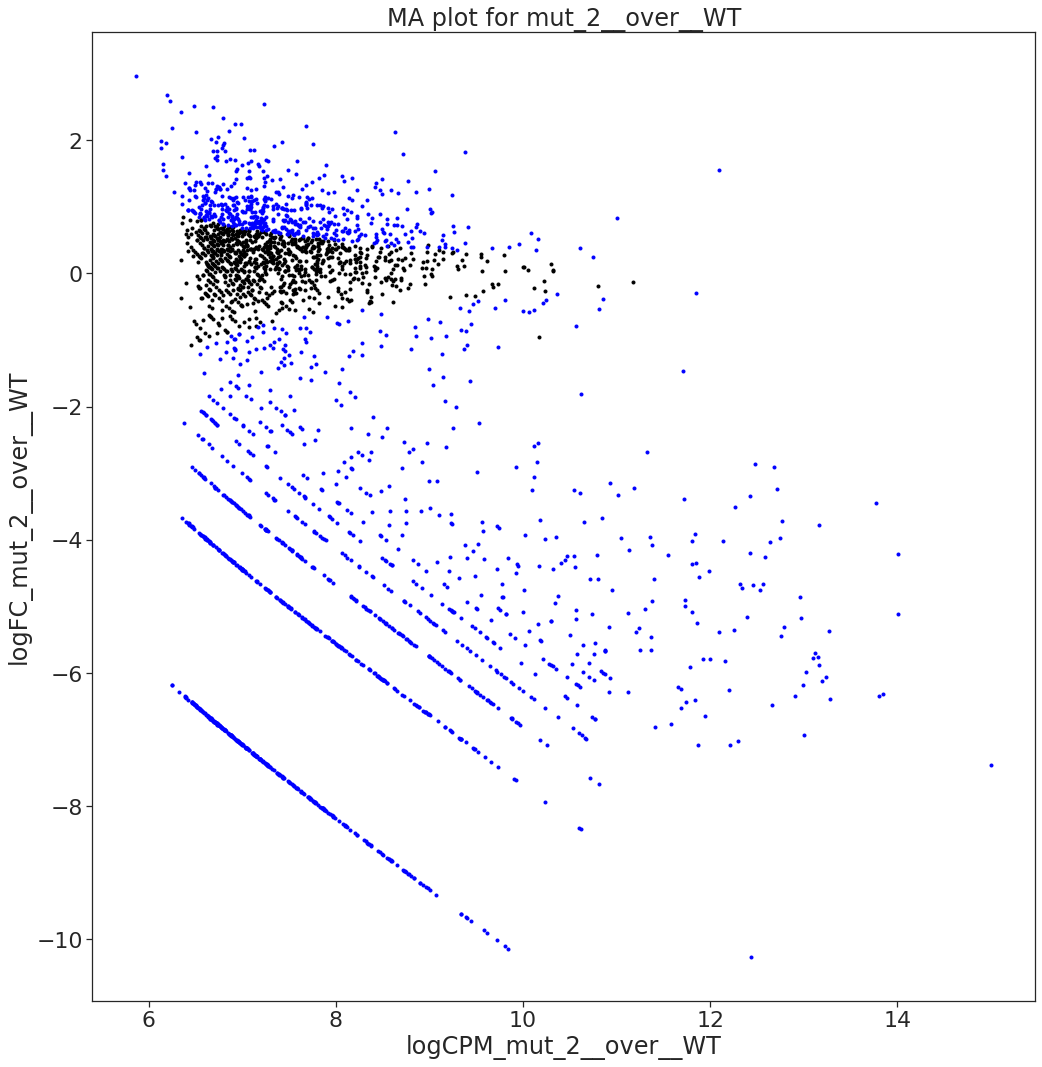

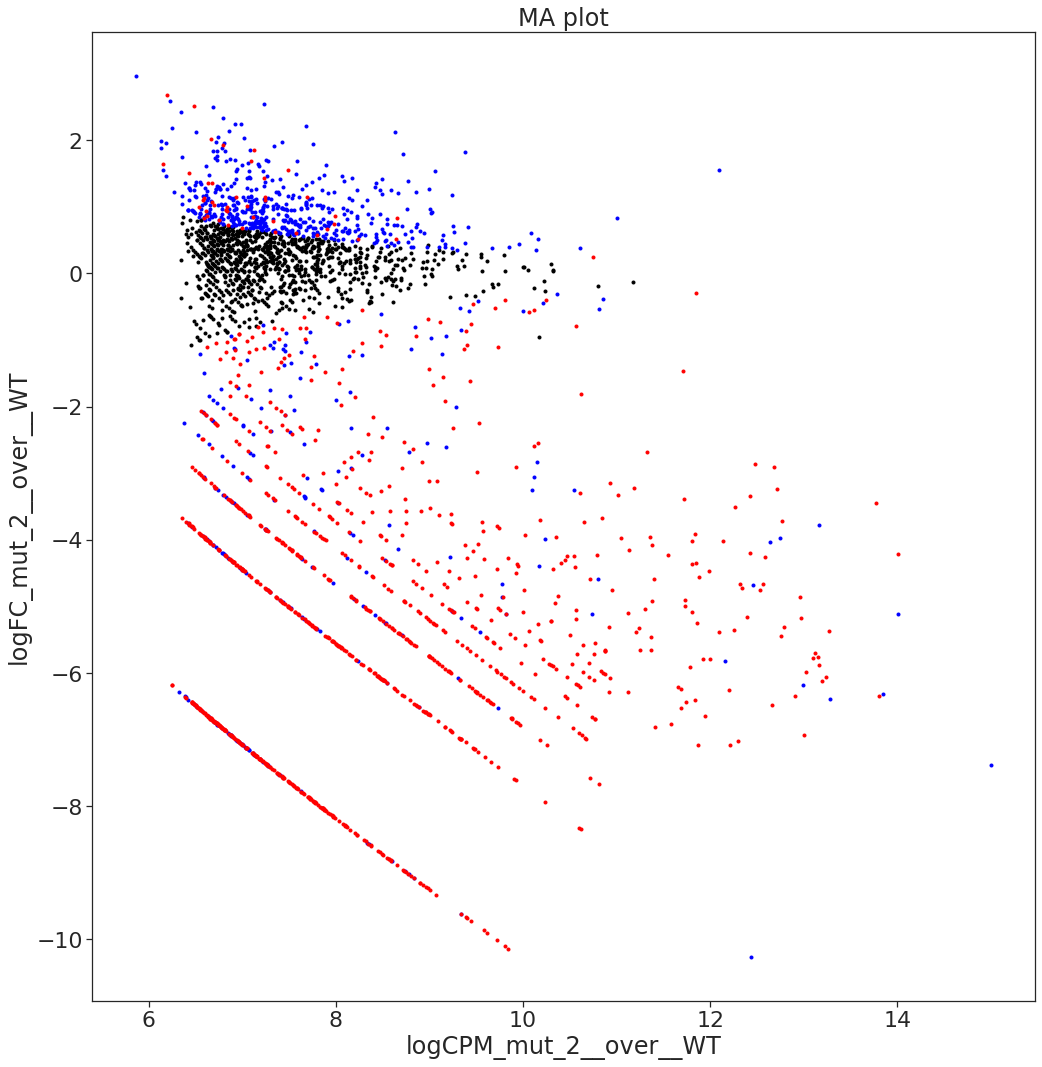

In [30]:
df_1_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_1_name = ip__Input_WAGO_3__IP_WAGO_3_name

df_2_path = small_rna__WT__mut_2_path
df_2_name = small_rna__WT__mut_2_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## 15. Small RNAs in mut-2 – WAGO-3 bound in dpf-3 null IP over Input

                                                    Significant
FDR_mut_2__over__WT<0.05                                   1118
No                                                          927
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-3_dpf-3_n...          622


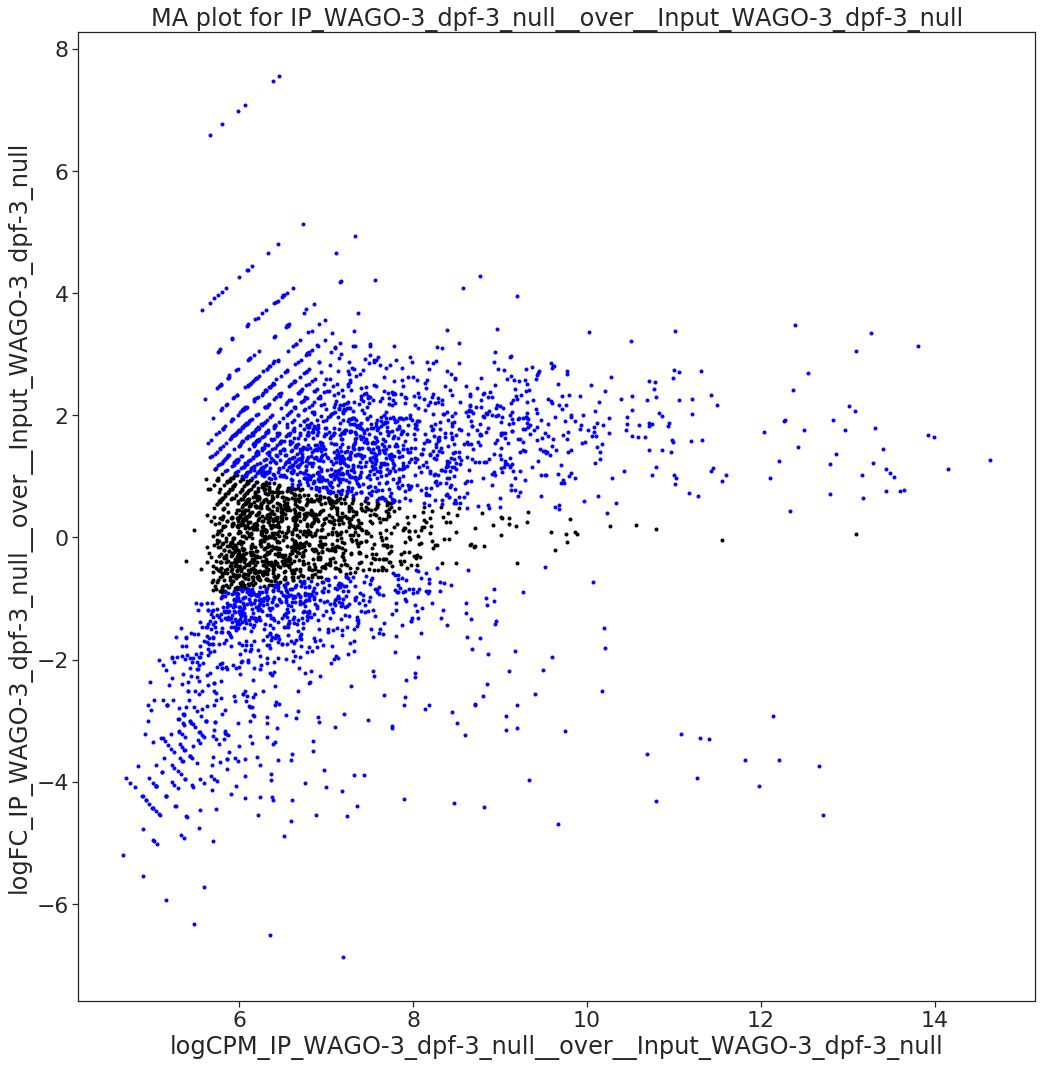

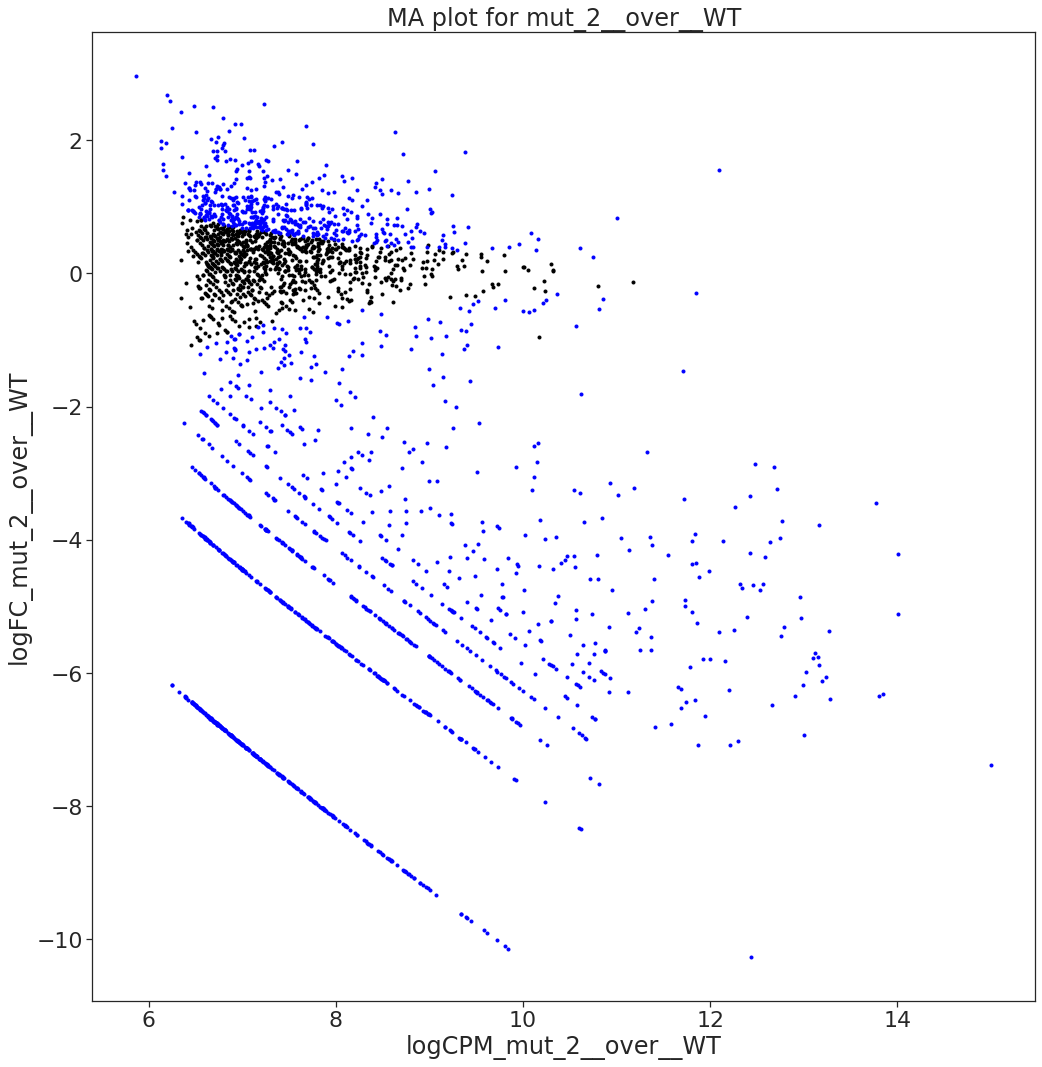

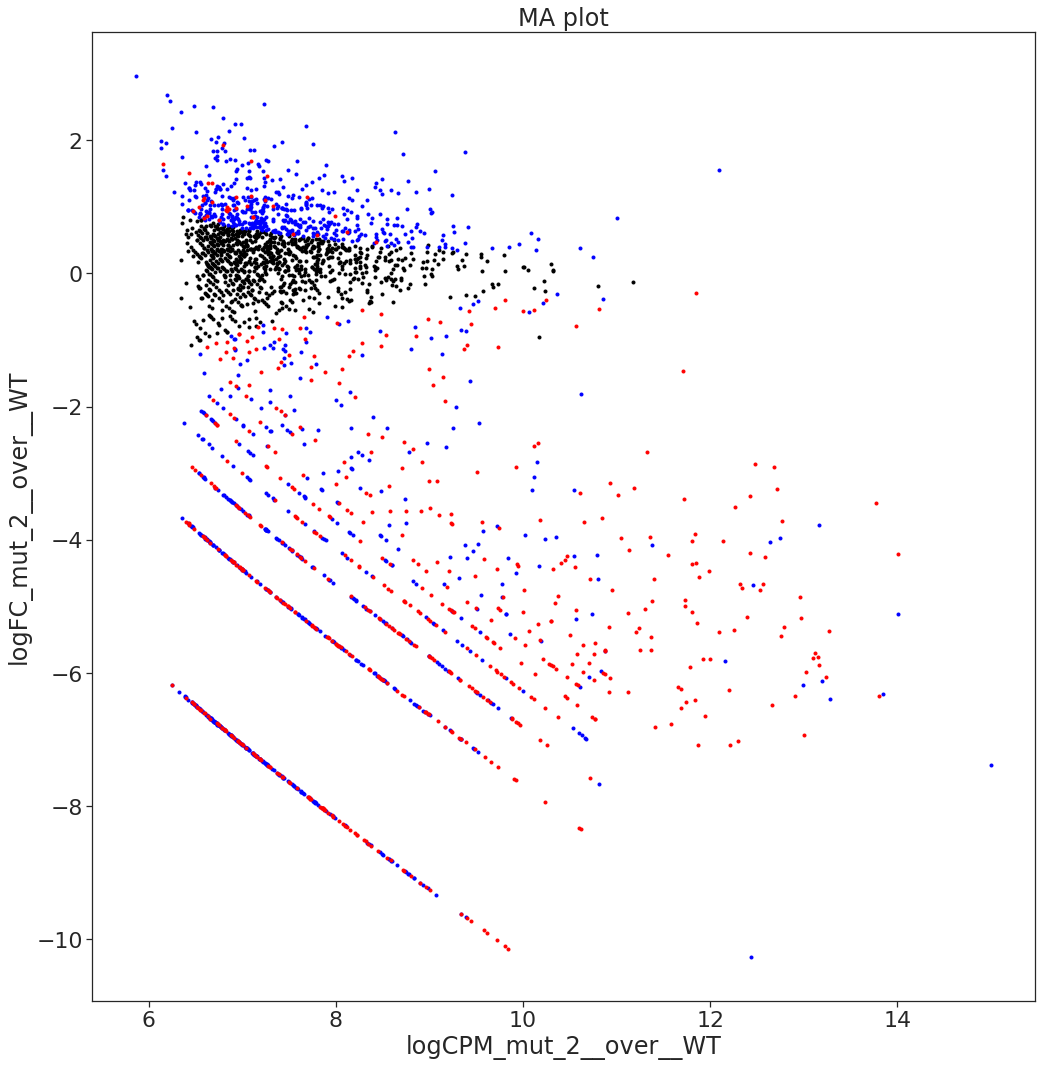

In [31]:
df_1_path = ip__Input_WAGO_3_dpf_3_null__IP_WAGO_3_dpf_3_null_path
df_1_name = ip__Input_WAGO_3_dpf_3_null__IP_WAGO_3_dpf_3_null_name

df_2_path = small_rna__WT__mut_2_path
df_2_name = small_rna__WT__mut_2_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Extra plot Small RNAs mut-2 – csr-1 over Input

                                                    Significant
FDR_mut_2__over__WT<0.05                                   1178
No                                                          927
FDR_mut_2__over__WT<0.05\nFDR_IP_csr-1__over__c...          562


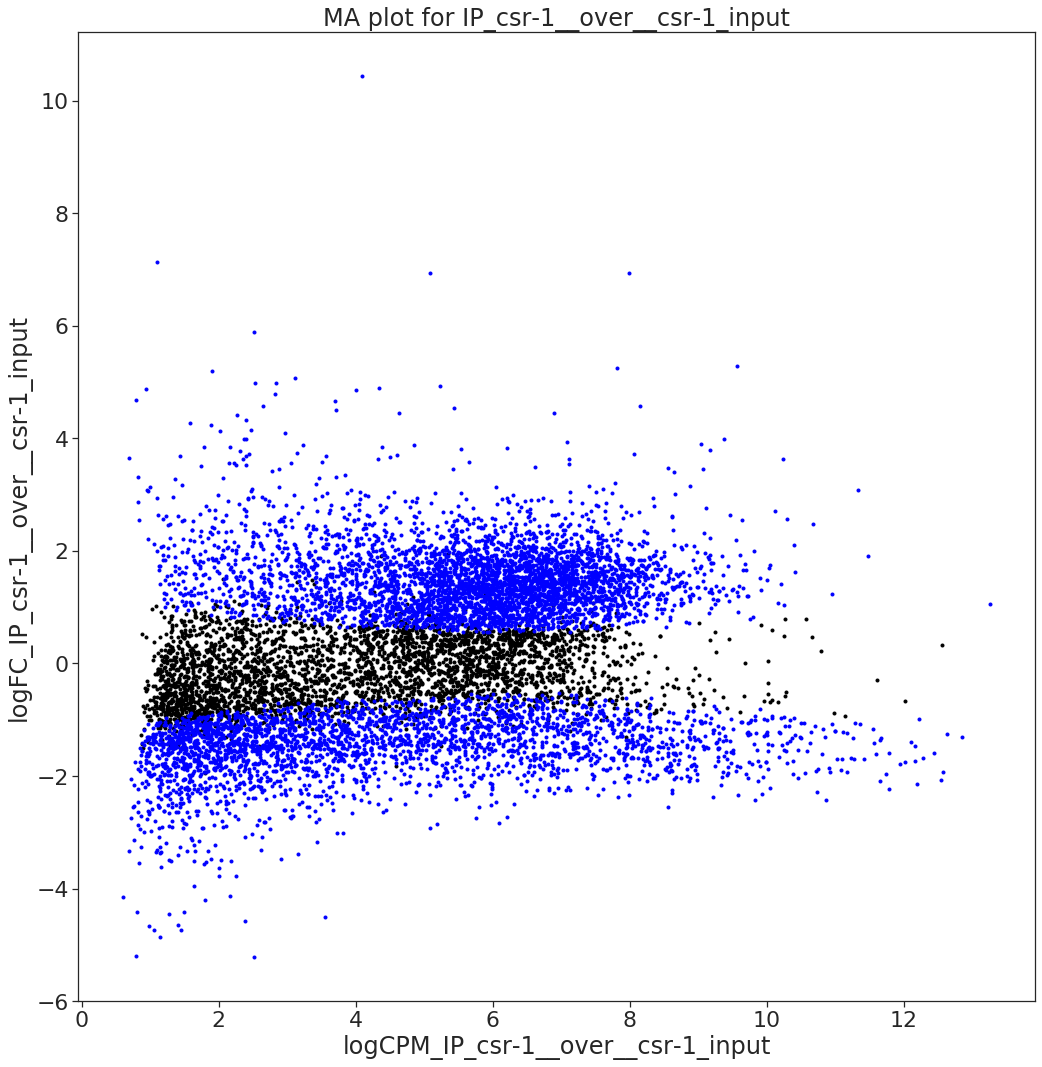

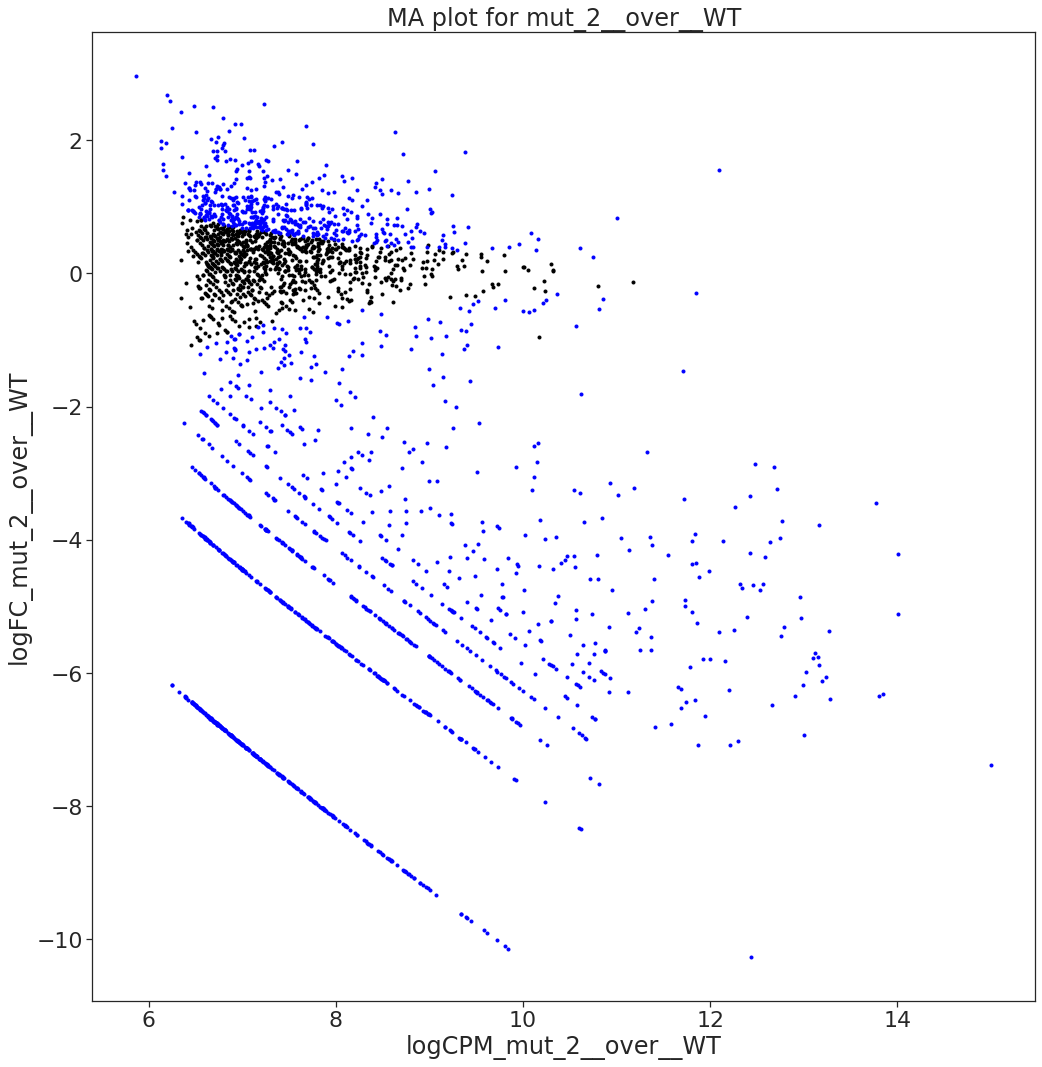

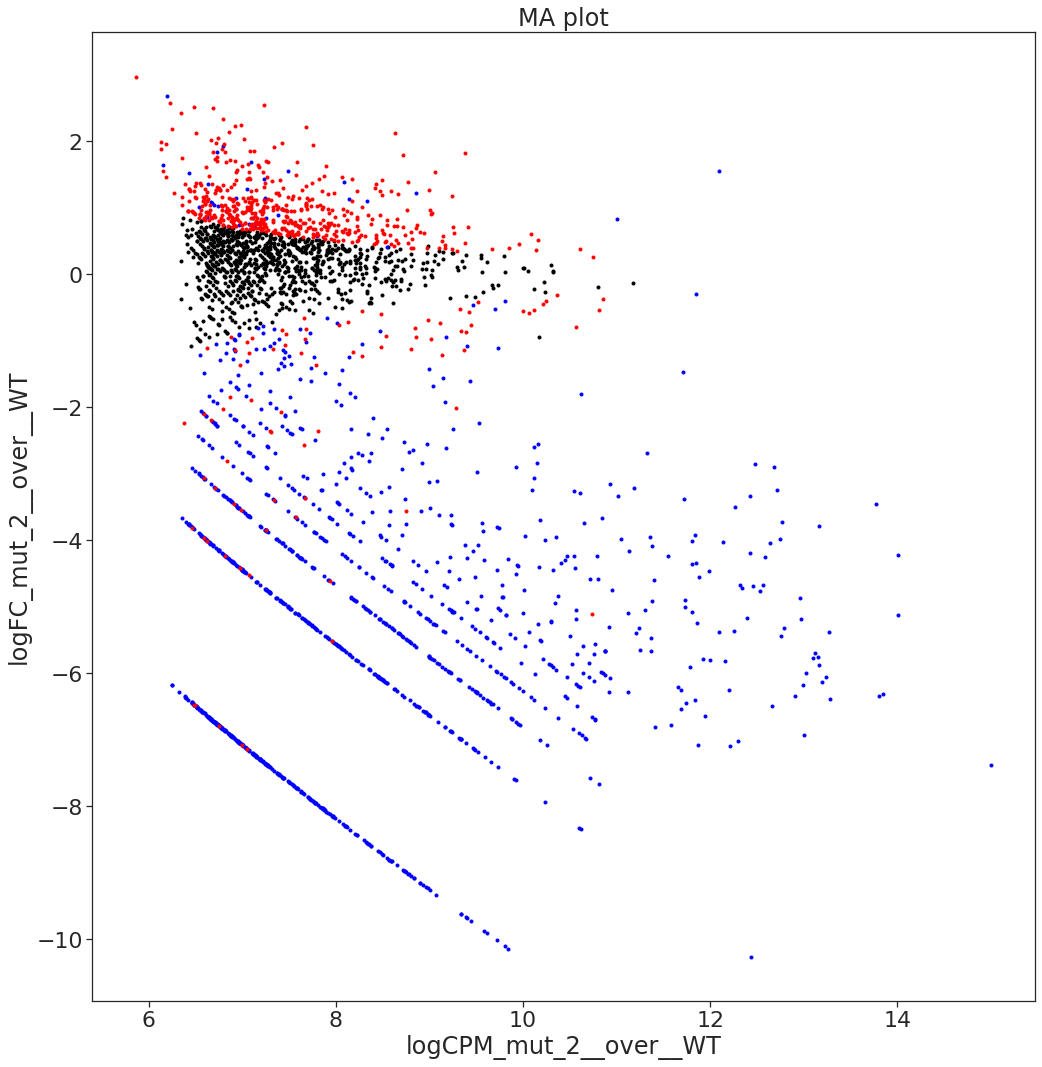

In [32]:
df_1_path = ip__csr_1_input__csr_1_IP_path
df_1_name = ip__csr_1_input__csr_1_IP_name

df_2_path = small_rna__WT__mut_2_path
df_2_name = small_rna__WT__mut_2_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)